# **1. Introduction:**

    

> The movie entertainment business is growing rapidly. Every year, we see multiple blockbusters, be it in Hollywood, Bollywood or in other respective film industries. With a plethora of movies releasing every year, consumers are faced with a critical decision: Should we invest our time and effort in order to purchase a ticket for a particular movie?

> Cinema halls also face a complicated dilemma on whether to screen a particular movie or not. This is because there are no shortages on the amount of films that are being released, and cinema halls need to make the ultimate decision on which films to screen. Which film will bring in more customers, and which films will generate a higher revenue?

Both customers and cinema halls could utilise a system, where they could see an estimated box office prediction for an upcoming release.


*   Customers may be swayed by the box office numbers, and it may factor into their decision on whether to watch a designated film on the big screen. If a box office prediction is considerably low, the customer may feel like it does not belong to the general audience, and hence, they may decide not to waste their time and money on the designated release.

*   Cinema halls may use the box office predictions to ultimately decide on whether to screen the film or not. A higher box office prediction will indicate a higher revenue generated for the cinema hall by screening the respective film. They will make higher ticket sales, more revenue on snacks, a better reputation among movie buffs for screening popular films etc.

Due to the immense potential of such a model, let us start our journey of building a movie box office predictor.

# **2. Datasets:**



> We will be working with the TMDB dataset. It consists of 7398 movies, with a variety of data.

Let us load the training data and look at the first few entries for a clearer picture.

In [1]:
'''Import all the necessary libraries and packages'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import math
import numpy as np
from scipy.stats import skew   
import pylab as p
import itertools
from collections import Counter
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
'''Loading the Datasets and visualizing them'''
#Loading the train dataset
train = pd.read_csv("train.csv")  
train2 = pd.read_csv("train.csv")
#Loading the test dataset
test = pd.read_csv("test.csv")   
#Printing the first 5 entries of the train dataset
test.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


<h4><b>There are 23 columns describing the different characteristics of each movie. Some of these characteristics seem irrelevant in predicting our box office numbers. However, we can will perform the Feature Engineering later on. At first, let us count the number of records that we have to deal with.</b></h4>

In [3]:
'''Number of Records in Train and Test Sets'''
print("Number of movies in train: "+ str(train.shape[0])) 
print("Number of movies in test: "+ str(test.shape[0]))

Number of movies in train: 3000
Number of movies in test: 4398


<h4><b>As with all datasets, there are bound to be some missing values. Let us visualize our dataset more clearly, in order to get an insight of how we can improve it.<b></h4>

In [4]:
'''Calculation of Null Values'''

#Calculate null values in train set
print("--------- TRAIN SET ---------")
print(train.info())  
#Calcualte null values in test set
print("--------- TEST SET ---------")
print(test.info())   

--------- TRAIN SET ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-nul

We can observe that <code>belongs_to_collection</code> and <code>homepage</code> contains a lot of null values. In general, we may be inclined to feel that these columns are not much useful for us in determining the revenue of our film. Hence, we can drop it from our dataset. However, let us observe the columns more closely to decide whether it is of any importance to us.

In [5]:
'''Initial Visualization of belongs_to_collection'''
train.iloc[0,1]  #belongs_to_collection is the 2nd column in the panda DataFrame, hence[0,1] extracts the belongs_to_collections entry in index 0

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

The <code>belongs_to_collection</code> consists of a unique id, the name of its collection, and an image path to its poster.

After googling <b>Hot Tub Time Machine</b> and <b>Princess Diaries</b>, it can be deduced that Collection is basically referred to as a Franchise. Franchises can indeed have a significant impact on movies and its box office revenue. Therefore, it is indeed beneficial for us to include this information into our dataset.

After examining <code>belongs_to_collection</code>, we realize that it does hold an important factor in determining the box office revenue. As a result, we should perform <b>Exploratory Data Analysis</b> in order to extract relationships with respect to revenue, and hence, perform <b>Feature Engineering</b> accordingly. This should be done for all columns since we can discover hidden relationships with the revenue.

# 3. Exploratory Data Analysis & Feature Engineering:

Let us first <b>pre-process</b> the data that we are about to perform <b>Data Exploration</b> on.

> <h3><b>belongs_to_collection:</b></h3>
            
   We visualized some entries in this column, and understood its structure. Franchises are crucial in the marketing and popularity of movies, and our data needs to account for the presence or absense of a franchise. As a result, we create a seperate column named <code>bool_franchise</code> which simply returns 0 if a film does not belong to a collection, or 1 if it is a part of a collection.

In [6]:
'''Creating new column bool_franchise which returns 1 for films belonging to a franchise, and 0 otherwise'''

train['bool_franchise'] = 1
train.loc[train.belongs_to_collection.isnull(), 'bool_franchise'] = 0

'''Repeat for test'''

test['bool_franchise'] = 1
test.loc[test.belongs_to_collection.isnull(), 'bool_franchise'] = 0

In [7]:
print(train['bool_franchise'].value_counts()) #Number of franchise films

0    2396
1     604
Name: bool_franchise, dtype: int64


There are 604 films out of the 3000 that belong to a franchise in the train set.

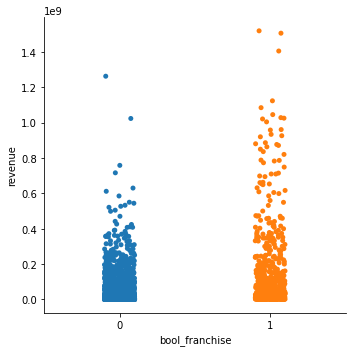

In [8]:
sns.catplot(x="bool_franchise",y="revenue",data=train)  #Visualizing impact of revenue on franchise or non-franchise films

From the plot above, we can clearly visualize a relationship between franchise films and non-franchise films. The highest grossing films are more likely to be generated from a franchise film, and we can see that most of the non-franchise films make relatively less reveue, when compared to a franchise film. As a result, whether a film is located in a franchise or not is clearly an important factor in determining the box office revenue.

<b><h3>Franchise:</h3></b>
Some franchises are more popular than others. For example, the <b>James Bond</b> franchise consists of 26 films in total. It is a franchise that is a household name, and a new upcoming film from this franchise is bound to create excitement among movie lovers.

Similarly, a collection such as <b>Hot Tub Time Machine</b> consists of only 2 films, and although it belongs to a franchise, a new upcoming release may not be as anticipated as a new release from well-known franchises such as <b>James Bond</b> and <b>Marvel Cinematic Universe</b>. Hence, it may be beneficial for us to also seperate the different franchises into a seperate column.

In [9]:
'''Create new column to store franchise names. Convert string to list of dictionaries using eval(x), and store the franchise names into a sorted list.
Create the new column franchise, which joins the sorted list of franchise names'''

train["franchise"] = train["belongs_to_collection"].fillna("").apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])) if x!="" else "") 
test["franchise"] = test["belongs_to_collection"].fillna("").apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])) if x!="" else "")  

Let us <code>LabelEncode</code> <b>franchise</b>, so that the column is ready for model training. The information is stored as strings, hence label encoding is necessary. We would also define a label encoding function in order to label encode other relevant strings.

In [10]:
'''Function to label encode an entire column'''
def encoder(train, test):
  """TRAIN"""
  
  le = LabelEncoder()
  le.fit(list(train))
  train = le.transform(train.astype('str'))
  
  """TEST"""
  
  le = LabelEncoder()
  le.fit(list(test))
  test = le.transform(test.astype('str'))

  return train, test

In [11]:
train["franchise"], test["franchise"] = encoder(train["franchise"], test["franchise"])

In [12]:
train[:10]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,bool_franchise,franchise
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,152
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,366
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,0,0
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,0,0
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0,0
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Mup

We can see that we have successfully created the corresponding collection names for films which are part of a franchise. Hence, through data exploration and pre-processing, we were able to identify the importance of a franchise film. <code>bool_franchise</code> indicates whether a film belongs to a franchise or not and <code>franchise</code> indicates which franchise the film belongs to.

Since we no longer have any useful information to extract from <code>belongs_to_collection</code>, we may discard it.

In [13]:
'''Dropping the belongs_to_collection column'''

train.drop("belongs_to_collection", axis=1, inplace=True)
test.drop("belongs_to_collection", axis=1, inplace=True)
train

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,bool_franchise,franchise
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,152
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,366
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,0
2996,2997,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,...,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,0,0
2997,2998,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,0,0
2998,2999,42000000,"[{'id': 3

> <h3><b>budget:</b></h3>
        
   The budget of a film is an important characteristic, indicating the general tone and the target audience of a film. A film with an exorbitant budget may infer the film to be an action-packed/superhero/complex animation or a grand-scale sci-fi film. It may also indicate that the film incorporates the use of extensive CGI, which contributes to its high budget. 
        
   As a result, films with a higher budget generally seems to earn more revenue. The high budget indicates the grand-scale potential of the film, which is an attractive feature for cinema halls, since it will attract more audiences. Let us examine a <b>scatterplot</b> in order to analyze the relationship.

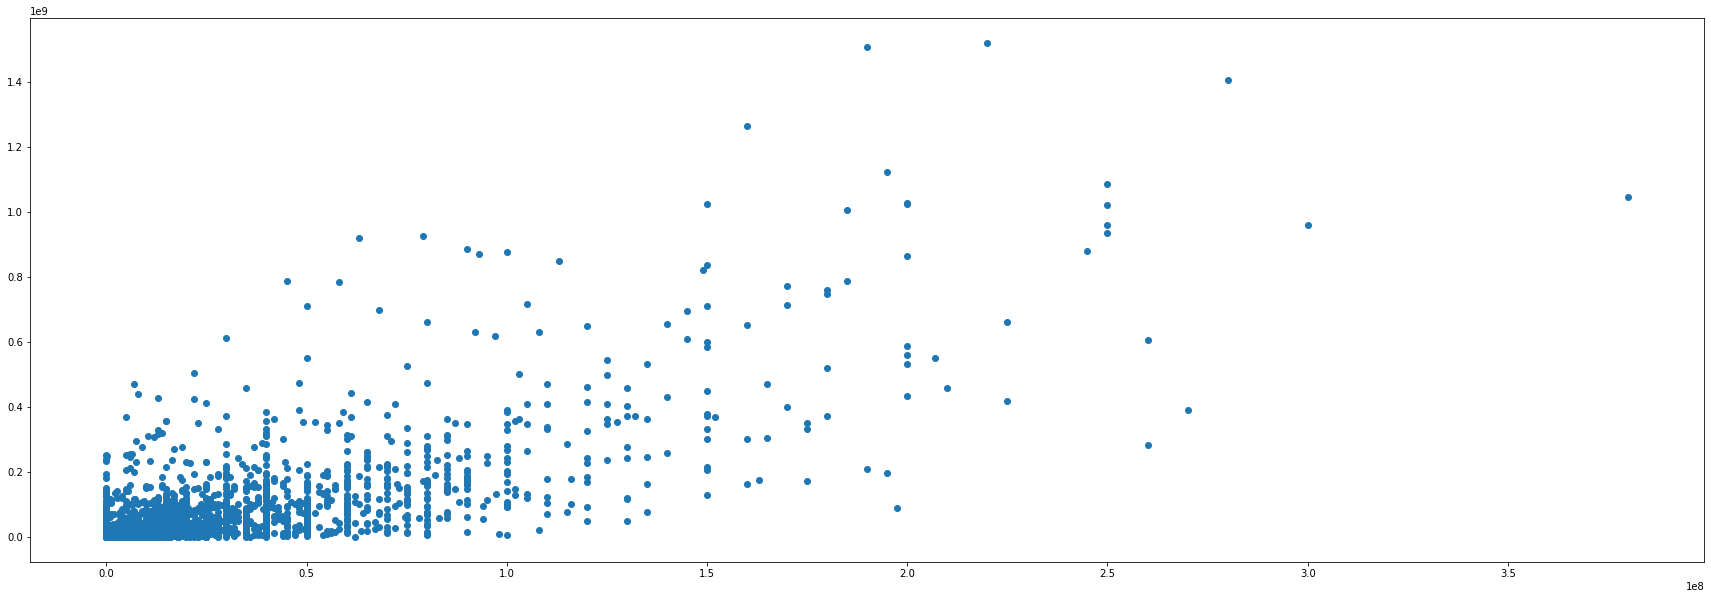

In [14]:
'''Scatterplot of budget vs revenue'''

X = train["budget"] 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

<b><h3>Correlation:</h3></b>

Let us calculate the correlation between the budget and the revenue

In [15]:
'''Compute Correlation between budget and revenue'''

print("Correlation between budget and revenue: " + str(train.budget.corr(train.revenue)))

Correlation between budget and revenue: 0.7529645103815287


Along with the scatterplot, the correlation between the two columns indicate a strong positive correlation. As movie budget is higher, revenue tends to be higher as well. However, we can see that there are a lot of movies clustered at the lower end. From the first glance at the dataset, we did observe some budget values to be set to 0. That is highly unlikely for popular movies. Let us count the number of movies that have a budget equals to 0.

In [16]:
'''Compute number of movies with 0 budget'''

print("Number of 0 budget movies in train: " + str(train.loc[train.budget==0].shape[0]))
print("Number of 0 budget movies in test: " + str(test.loc[test.budget==0].shape[0]))

Number of 0 budget movies in train: 812
Number of 0 budget movies in test: 1211


We observe there are handful of movies with missing budget. This is worrysome, as budget is an important contributor, in predicting our box office numbers.



<h2><b>Box Office Datasets:</b></h2>
        There are a lot of movie datasets scattered around the web, used by data scientists and machine learning experts on their projects. By the help of several datasets, we will try to decrease the number of unknown budget entries, since it is a crucial contributor towards our box office numbers.
        
Throughout the next few code blocks, we will be loading different datasets from various sources, and check for any matching titles. If our external dataset contains any budget value for the matching titles, we will be updating them to our current budget.

In the following section, we will create a list <code>ls</code>, where we will store all the titles which have missing budget entries.

In [17]:
'''Appends title and original titles to lists. Combines them and removes duplicate titles.
We will be using this list to compare names of movies from other datasets, and if it matches, we will update our budget accordingly'''

a=[]
ls = train.loc[train['budget']==0,'title']
a.extend(train.loc[train['budget']==0,'original_title'])
ls = list(ls)
ls.extend(a)
ls = list(dict.fromkeys(ls)) #Making sure to remove duplicates between original title and title
print("Number of unique titles with 0 budget in train: "+str(len(ls)))

b=[]
lt = test.loc[test['budget']==0,'title']
b.extend(test.loc[test['budget']==0,'original_title'])
lt = list(lt)
lt.extend(b)
lt = list(dict.fromkeys(lt)) #Making sure to remove duplicates between original title and title
print("Number of unique titles with 0 budget in test: "+str(len(lt)))

Number of unique titles with 0 budget in train: 966
Number of unique titles with 0 budget in test: 1450


The following dataset has been taken from the following <b>Github repo:</b><br>
https://github.com/divyachandramouli/Investigate_TMDb_Movie_Dataset

In [18]:
box = pd.read_csv("tmdb_movies.csv",engine='python')
boxd = pd.Series(box.budget.values,index=box.original_title).to_dict()
for i in boxd.copy():
    if(boxd[i]==0):
        del boxd[i]
num=0
for i in ls:
    if (i in boxd):
        num+=1
        train.loc[train['title']==i,'budget']=int(boxd[i])
        ls.remove(i)
print("Number of budgets fixed in train:"+str(num))

num=0
for i in lt:
    if(i in boxd):
        num+=1
        test.loc[test['title']==i,'budget']=int(boxd[i])
        lt.remove(i)
print("Number of budgets fixed in test: "+str(num))

Number of budgets fixed in train:15
Number of budgets fixed in test: 22


The following dataset has been taken from the following <b>Github repo</b>:<br>
https://github.com/yash91sharma/IMDB-Movie-Dataset-Analysis

In [19]:
box = pd.read_csv("movie_metadata.csv",engine='python')
boxls=[]
for i in box['movie_title']:
    i = i[:-2]       #End of every movie title contains a weird symbol
    boxls.append(i)
box['title'] = boxls
box.drop("movie_title", axis=1, inplace=True)
box['title']    
boxd = pd.Series(box.budget.values,index=box.title).to_dict()
for i in boxd.copy():
    if(boxd[i]<=0 or math.isnan(float(str(boxd[i])))):
        del boxd[i]
num=0
for i in ls:
    if (i in boxd):
        num+=1
        train.loc[train['title']==i,'budget']=int(boxd[i])
        ls.remove(i)
print("Number of budgets fixed in train: "+str(num))

num=0
for i in lt:
    if(i in boxd):
        num+=1
        test.loc[test['title']==i,'budget']=int(boxd[i])
        lt.remove(i)
print("Number of budgets fixed in test: "+str(num))


Number of budgets fixed in train: 32
Number of budgets fixed in test: 43


The following dataset has been taken from the following <b>Github repo</b>:<br>
https://github.com/csredino/data_science

In [20]:
box = pd.read_csv("movie_data.csv",engine='python')
boxd = pd.Series(box.budget.values,index=box.title).to_dict()
for i in boxd.copy():
    if(isinstance(boxd[i],str)==False):
        del boxd[i]
    else:
        if("million" in boxd[i]):
            boxd[i] = float(''.join(boxd[i][1:].split(" ")[0]))*1000000
        else:
            boxd[i] = float(''.join([n for n in boxd[i] if n.isdigit()]))
            
            
        
num=0
for i in ls:
    if (i in boxd):
        num+=1
        train.loc[train['title']==i,'budget']=int(boxd[i])
        ls.remove(i)
print("Number of budgets fixed in train: "+str(num))
num=0
for i in lt:
    if(i in boxd):
        num+=1
        test.loc[test['title']==i,'budget']=int(boxd[i])
        lt.remove(i)
print("Number of budgets fixed in test: "+str(num))

Number of budgets fixed in train: 5
Number of budgets fixed in test: 8


The following dataset has been taken from the following <b>Github repo</b>:<br>
https://github.com/danielgrijalva/movie-stats

In [21]:
box = pd.read_csv("movies.csv",engine='python')
boxd = pd.Series(box.budget.values,index=box.name).to_dict()
for i in boxd.copy():
    if(boxd[i]==0.0):
        del boxd[i]
num=0
for i in ls:
    if (i in boxd):
        num+=1
        train.loc[train['title']==i,'budget']=int(boxd[i])
        ls.remove(i)
print("Number of budgets fixed in train:"+str(num))

num=0
for i in lt:
    if(i in boxd):
        num+=1
        test.loc[test['title']==i,'budget']=int(boxd[i])
        lt.remove(i)
print("Number of budgets fixed in test: "+str(num))

Number of budgets fixed in train:38
Number of budgets fixed in test: 75


<h3>Data Cleaning from External Source:</h3>

Credits: https://www.kaggle.com/enric1296/complete-guide-eda-feat-model/log

In [22]:
'''CLEANING OF DATA'''

'''BUDGET'''
train.loc[train['id'] == 90, 'budget'] = 30000000                
train.loc[train['id'] == 118, 'budget'] = 60000000  
train.loc[train['id'] == 149, 'budget'] = 18000000  
train.loc[train['id'] == 464, 'budget'] = 20000000       
train.loc[train['id'] == 470, 'budget'] = 13000000      
train.loc[train['id'] == 513, 'budget'] = 930000          
train.loc[train['id'] == 797, 'budget'] = 8000000       
train.loc[train['id'] == 819, 'budget'] = 90000000       
train.loc[train['id'] == 850, 'budget'] = 90000000  
train.loc[train['id'] == 1112, 'budget'] = 7500000  
train.loc[train['id'] == 1131, 'budget'] = 4300000      
train.loc[train['id'] == 1359, 'budget'] = 10000000      
train.loc[train['id'] == 1542, 'budget'] = 1500000          
train.loc[train['id'] == 1542, 'budget'] = 15800000      
train.loc[train['id'] == 1571, 'budget'] = 4000000        
train.loc[train['id'] == 1714, 'budget'] = 46000000       
train.loc[train['id'] == 1721, 'budget'] = 17500000            
train.loc[train['id'] == 2268, 'budget'] = 17500000      
train.loc[train['id'] == 2602, 'budget'] = 31000000
train.loc[train['id'] == 2612, 'budget'] = 15000000
train.loc[train['id'] == 2696, 'budget'] = 10000000
train.loc[train['id'] == 2801, 'budget'] = 10000000
train.loc[train['id'] == 3889, 'budget'] = 15000000       
train.loc[train['id'] == 6733, 'budget'] = 5000000     
train.loc[train['id'] == 3197, 'budget'] = 8000000     
train.loc[train['id'] == 6683, 'budget'] = 50000000     
train.loc[train['id'] == 5704, 'budget'] = 4300000     
train.loc[train['id'] == 6109, 'budget'] = 281756      
train.loc[train['id'] == 7242, 'budget'] = 10000000     
train.loc[train['id'] == 7021, 'budget'] = 17540562
train.loc[train['id'] == 5591, 'budget'] = 4000000      
train.loc[train['id'] == 4282, 'budget'] = 20000000

'''REVENUE'''

train.loc[train['id'] == 16, 'revenue'] = 192864
train.loc[train['id'] == 313, 'revenue'] = 12000000       
train.loc[train['id'] == 451, 'revenue'] = 12000000
train.loc[train['id'] == 1865, 'revenue'] = 25000000 
train.loc[train['id'] == 2491, 'revenue'] = 6800000

'''RUNTIME'''

train.loc[train['id'] == 391, 'runtime'] = 86 
train.loc[train['id'] == 592, 'runtime'] = 90 
train.loc[train['id'] == 925, 'runtime'] = 95 
train.loc[train['id'] == 978, 'runtime'] = 93 
train.loc[train['id'] == 1256, 'runtime'] = 92 
train.loc[train['id'] == 1542, 'runtime'] = 93
train.loc[train['id'] == 1875, 'runtime'] = 86 
train.loc[train['id'] == 2151, 'runtime'] = 108
train.loc[train['id'] == 2499, 'runtime'] = 108 
train.loc[train['id'] == 2646, 'runtime'] = 98
train.loc[train['id'] == 2786, 'runtime'] = 111
train.loc[train['id'] == 2866, 'runtime'] = 96
train.loc[train['id'] == 4074, 'runtime'] = 103 
train.loc[train['id'] == 4222, 'runtime'] = 93
train.loc[train['id'] == 4431, 'runtime'] = 100 
train.loc[train['id'] == 5520, 'runtime'] = 86 
train.loc[train['id'] == 5845, 'runtime'] = 83 
train.loc[train['id'] == 5849, 'runtime'] = 140
train.loc[train['id'] == 6210, 'runtime'] = 104
train.loc[train['id'] == 6804, 'runtime'] = 145 
train.loc[train['id'] == 7321, 'runtime'] = 87

'''Repeat for Test'''

'''BUDGET'''

test.loc[test['id'] == 3889,'budget'] = 15000000       
test.loc[test['id'] == 6733,'budget'] = 5000000        
test.loc[test['id'] == 3197,'budget'] = 8000000       
test.loc[test['id'] == 6683,'budget'] = 50000000       
test.loc[test['id'] == 5704,'budget'] = 4300000        
test.loc[test['id'] == 6109,'budget'] = 281756        
test.loc[test['id'] == 7242,'budget'] = 10000000       
test.loc[test['id'] == 7021,'budget'] = 17540562      
test.loc[test['id'] == 5591,'budget'] = 4000000       
test.loc[test['id'] == 4282,'budget'] = 20000000  

'''RUNTIME'''

test.loc[test.id == 4074, "runtime"] = 103 
test.loc[test.id == 4222, "runtime"] = 93 
test.loc[test.id == 4431, "runtime"] = 100 
test.loc[test.id == 5520, "runtime"] = 86
test.loc[test.id == 5845, "runtime"] = 83 
test.loc[test.id == 5849, "runtime"] = 140 
test.loc[test.id == 6210, "runtime"] = 104 
test.loc[test.id == 6804, "runtime"] = 145 
test.loc[test.id == 7321, "runtime"] = 87 

In [23]:
'''NUMBER OF 0 budget movies in train and test'''

print("(Train) Total number of movies with unknown budget: " + str(train.loc[train.budget==0].shape[0]))
print("(Test) Total number of movies with unknown budget: " + str(test.loc[test.budget==0].shape[0]))

(Train) Total number of movies with unknown budget: 712
(Test) Total number of movies with unknown budget: 1055


Let us visualize the <b>scatterplot</b> between <code>budget</code> and <code>revenue</code> once again. This time, we should be a more spread out graph, since  we significantly decreased the number of 0 budget movies.

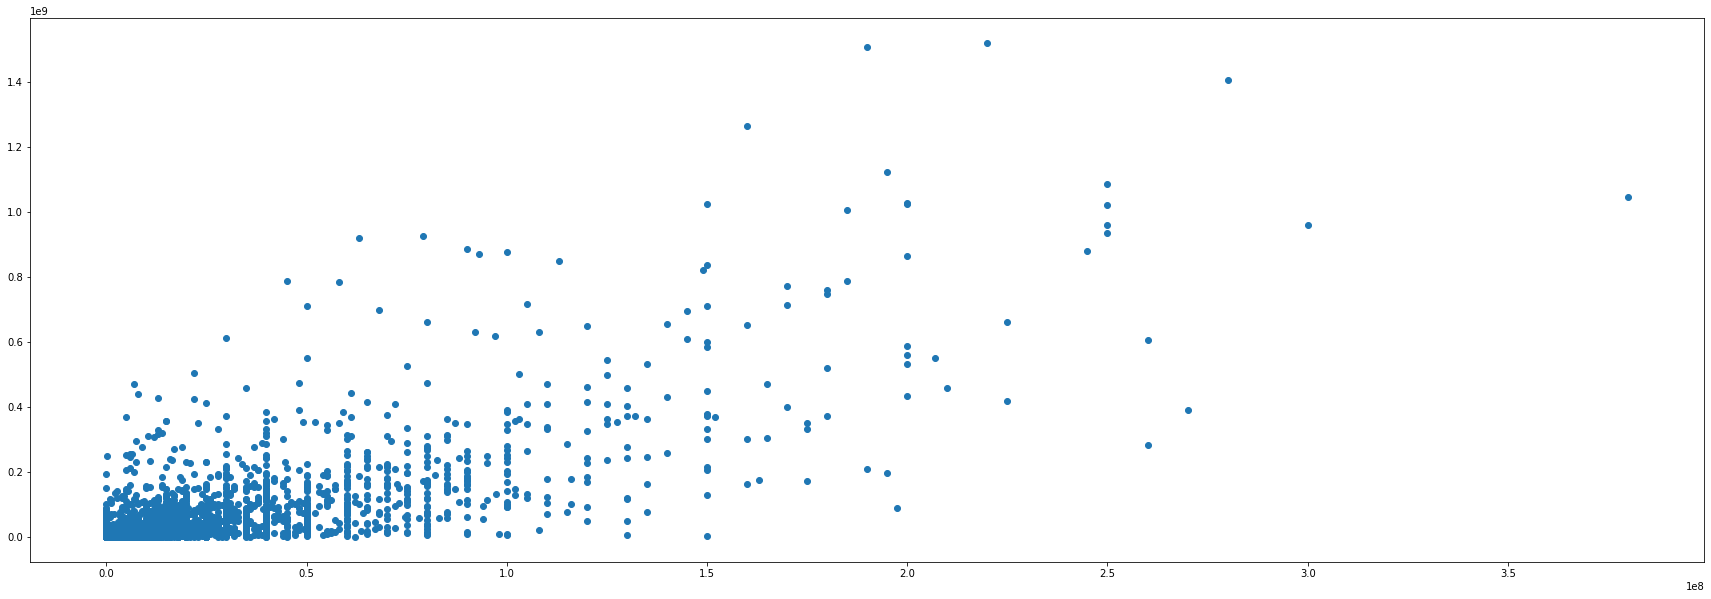

In [24]:
'''Visualizing scatterplot of revenue and budget'''

X = train["budget"] 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

It seems our data is still extremely skewed. The type of distribution that we are seeing is known as a <code>right-skewed</code> distribution. To confirm this, let us calculate the skew

In [25]:
'''Calculate skewness between budget and revenue'''
x1 = np.linspace(train.loc[train['budget'].idxmin,'budget'], train.loc[train['budget'].idxmax,'budget'], train.shape[0]) 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
  
print( '\nSkewness for data : ', skew(y1)) 


Skewness for data :  54.74486581812478


We shoud pre-process our <code>budget</code> in order to decrease its skewness. When a distribution is <code>right-skewed</code>, taking log "pulls in" more extreme values on the right (high values) relative to the median, while values at the far left (low values) tend to get stretched back, further away from the median.

<b>Explanation:</b> https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution

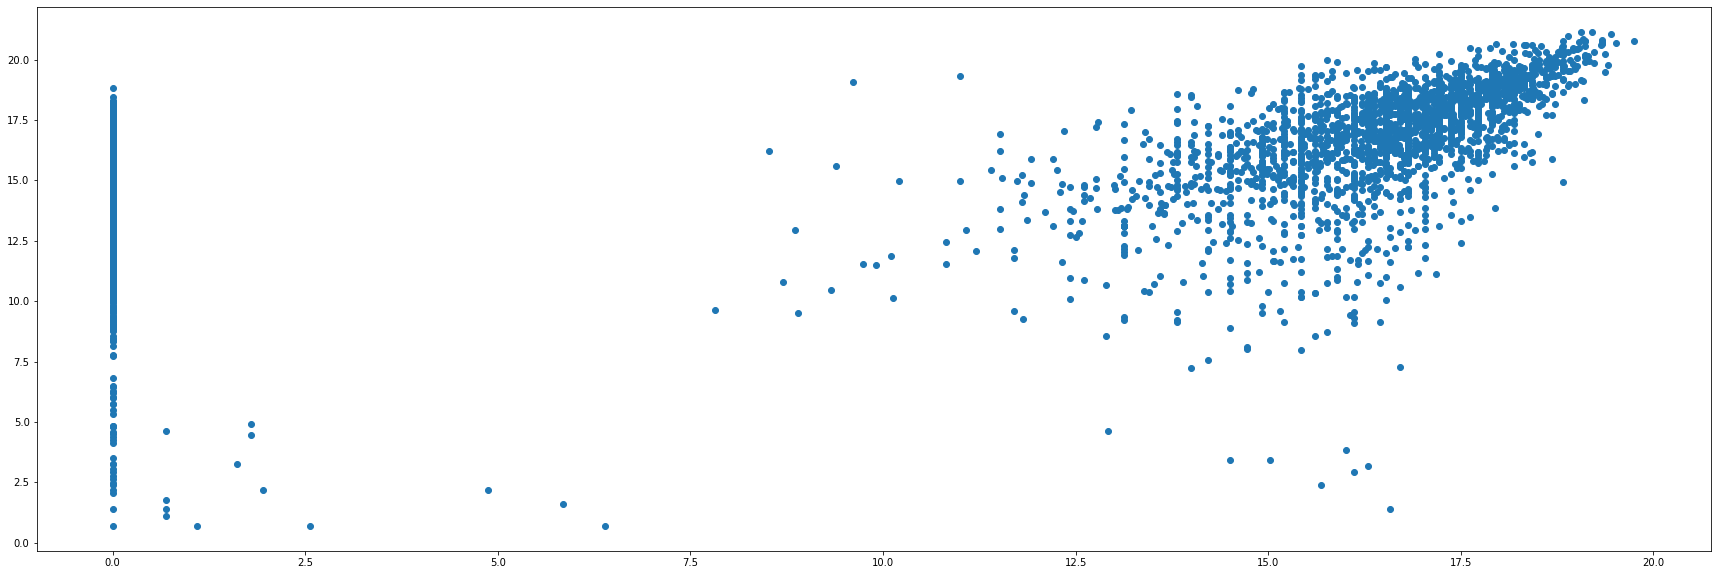

In [26]:
'''Visualizing scatterplot of log revenue and log budget'''

X = np.log1p(train["budget"]) 
Y = np.log1p(train["revenue"])
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

Our data is much more clearer,and the correlation between the two variables are much more apparent. Maybe we should consider creating a columns for logarithms of <code>revenue</code> and <code>budget</code> for model training later. This may improve our training performance in later stages.

In [27]:
'''Store log budget and revenue in our datasets'''

train['budget_log'] = X
train['revenue_log'] = Y
test["budget_log"] = np.log1p(test["budget"])

> <b><h3>Overview:</h3></b>

The overview of a film is generally a sneak peek into the movie plot. It serves as a bait for movie lovers, where a concise yet striking overview of the plot of a film may intrigue the viewers, and enhance their interest in watching the film.  However, if the overview is too long and complex, audiences may not be as invested, and may lose slight interest.
    

Let us create a subsequent column for the length of the corresponding overview. We will later create some <b>scatterplots</b> to visualize the relation between the size of the overview and the revenue generated. We will be creating two columns of <code>overview_size</code> and <code>overview_words</code>, where one records the total length of the overview string, and the other counts the number of words in overview respectively. We are selecting both parameters, in order to see which column can generate a clearer relationship.

In [28]:
'''Creating a columns to store overview length and overview words'''

train["overview_size"] = train["overview"].fillna(" ").apply(lambda x: len(x) if x!=" " else 0)
train["overview_words"] = train["overview"].fillna("").apply(lambda x: len(x.split(" ")) if x!=" " else 0)

<h3><b>Relationship between overview_size and revenue:</b></h3>

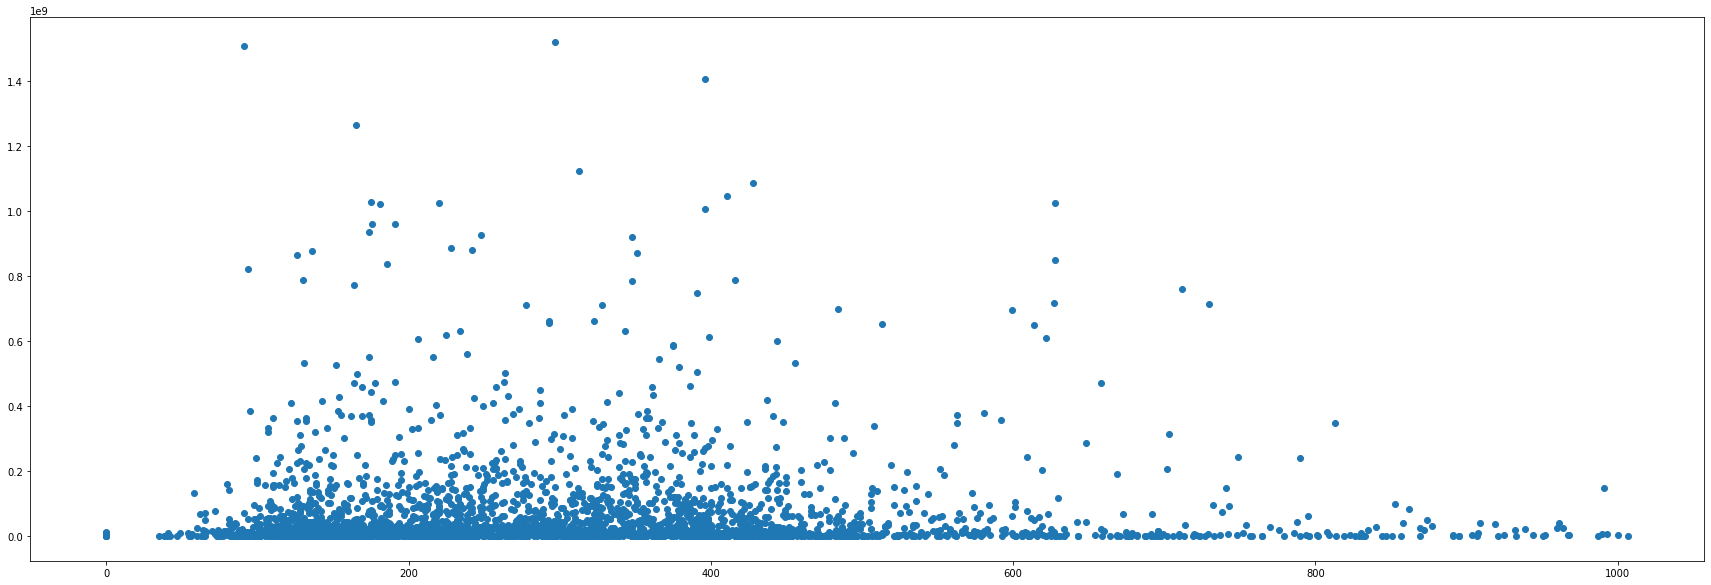

In [29]:
'''Visualizing scatterplot of overview_size and revenue'''

X = train["overview_size"] 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

<h3><b>Relationship between overview_words and revenue:</b></h3>

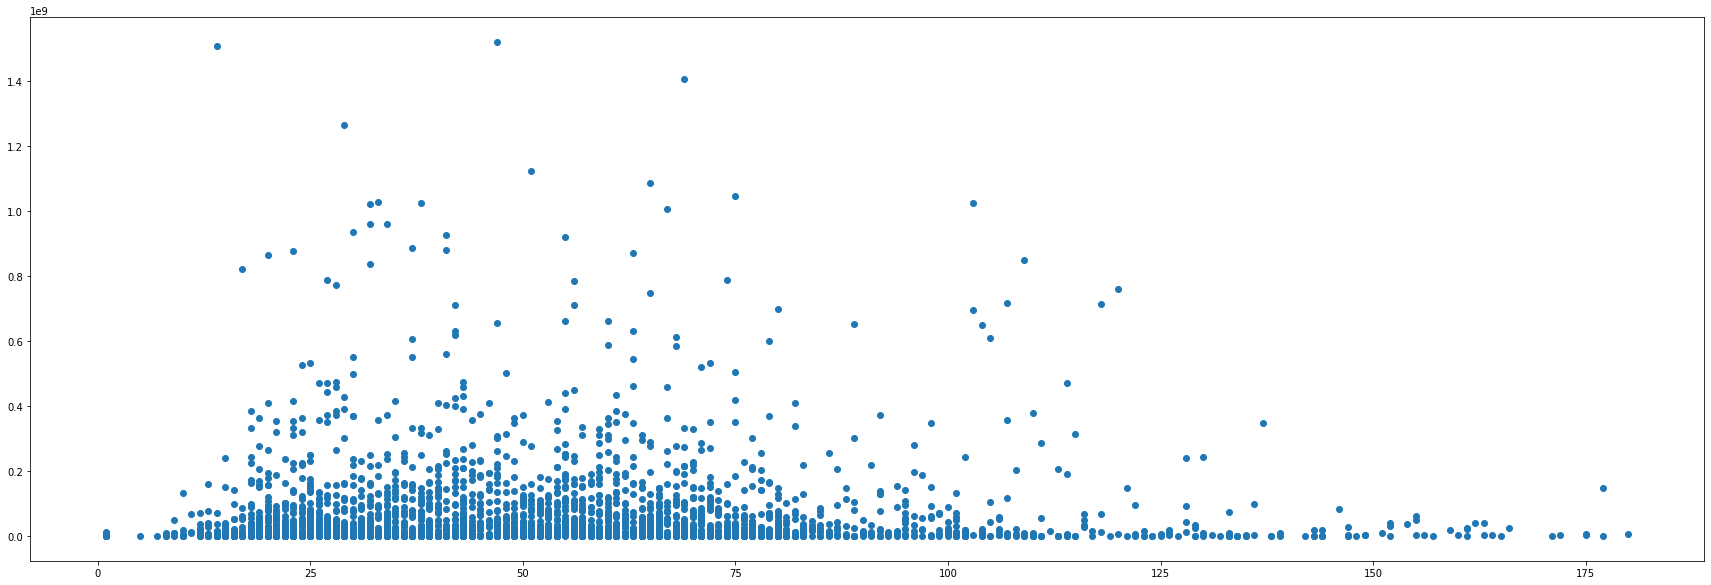

In [30]:
'''Visualizing scatterplot of overview_words and revenue'''

X = train["overview_words"] 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

This is a perfect depiction of <code>overview</code> vs <code>revenue</code>. We can clearly see that for both of the above graphs, revenues are more or less favourable for a concise overview length. Too little or too large generally sinks it. 

From the above two graphs, we can notice that both of them give us similar results, and hence, any one of them can be selected to give us an accurate depiction of the <code>overview</code> size. We decide to select <code>overview_words</code>, since it has a smaller magnitude, which may speed up the computations. Let us drop <code>overview</code> and <code>overview_size</code> from our dataset.

In [31]:
'''Dropping all the necessary columns and adding overview words column in test'''

train.drop(["overview","overview_size"], axis = 1, inplace = True)
test["overview_words"] = test["overview"].fillna(" ").apply(lambda x: len(x.split(" ")) if x!=" " else 0)
test.drop(['overview'], axis=1, inplace = True)

> <h2><b>Popularity:</b></h2>

Just by looking at this column, we can reasonably assume that the <code>popularity</code> of the movie is a key indicator to the revenue earned. This is because <code>popularity</code> determines the hype generated by a film, and hence, the greater the hype, the greater the excitement for the release of the movie, which translates to more people visiting the theatres, and contributing towards the box office. 
        
However, we can only verify this relation by doing some <b>Exploratory Data Analysis</b>.

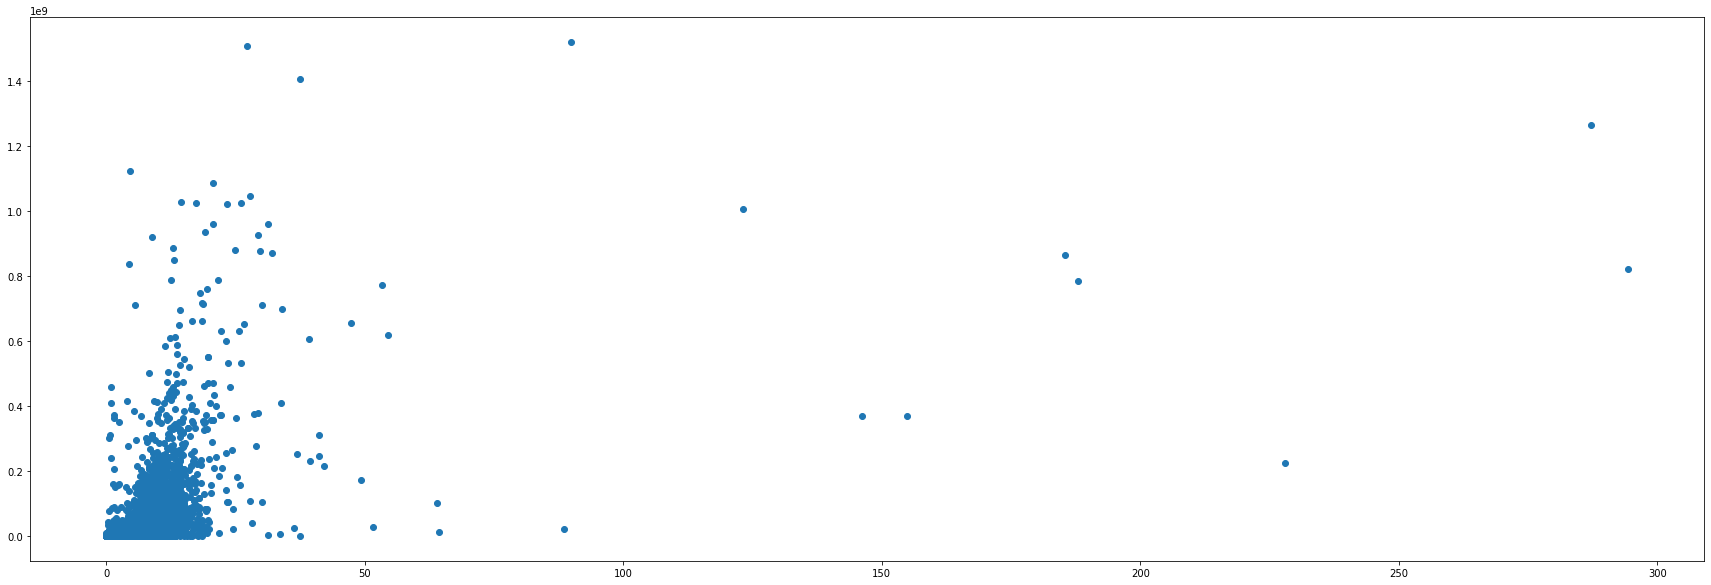

In [32]:
'''Visualizing scatterplot of popularity and revenue'''

X = train["popularity"] 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

In [33]:
print("Correlation between popularity and revenue: " + str(train.popularity.corr(train.revenue)))  #Correlation between popularity and revenue

Correlation between popularity and revenue: 0.4615238542422898


Surprisingly, it seems that there is not an actual clear relationship between revenue generated and the popularity of the movie. The correlation coefficient is also less than 0.5, which does infer a weak positive correlation. It also seems that most of the popularity values are centred around the range of 0 to 50. Let us try to shrink the range of <code>popularity</code>, and run visualize the plots once again.

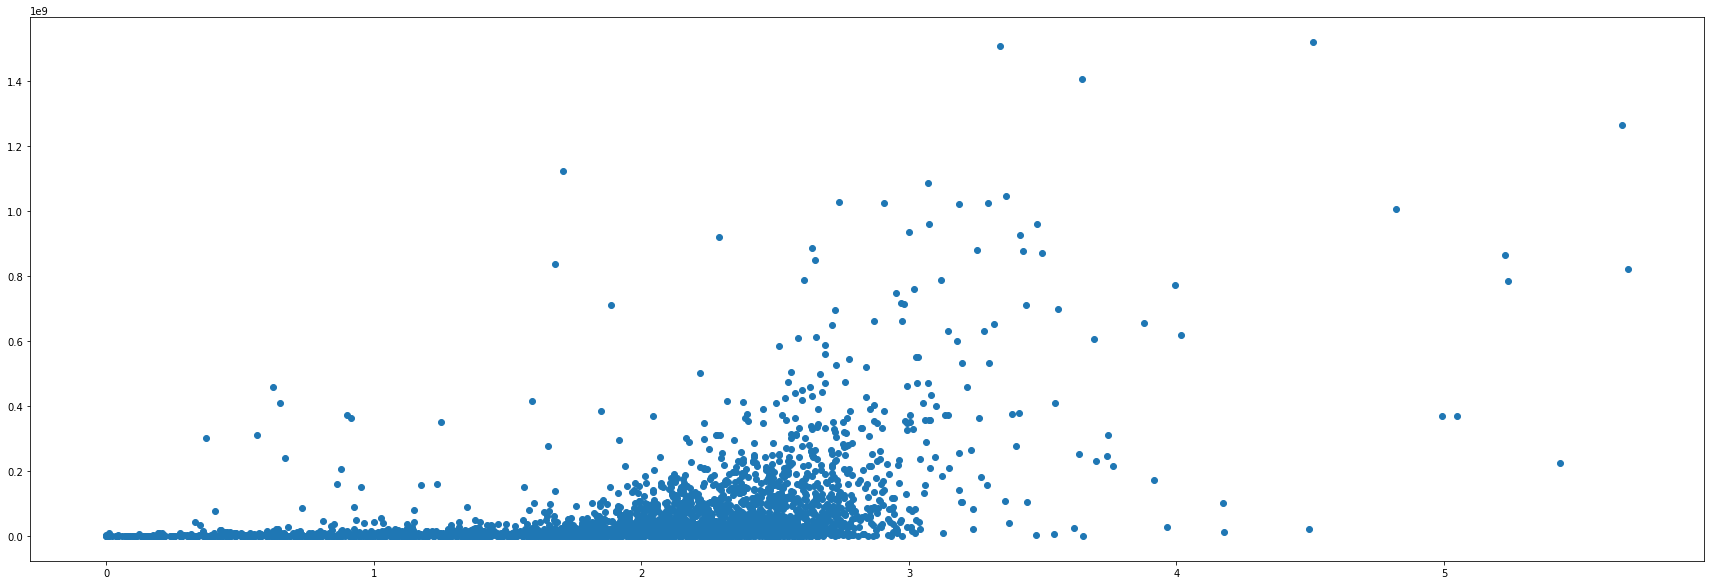

In [34]:
'''Visualizing scatterplot of popularity log and revenue'''

X = np.log1p(train["popularity"]) 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

This is a much better visualization of the relationship. This is also tells us that <code>popularity</code> does not guarantee a fixed <code>revenue</code>, since there are less popular films, which have also done fairly well at the box office. Since this plot provides us with a clearer picture, we should create a new column containing the logarithm of the popularity values.

In [35]:
train["popularity_log"] = X 

> <h2><b>Production Companies:</b></h2>
         
There are a handful of production companies, such as:
         <ul>
    <li><b>Universal Pictures</b></li>
    <li><b>20th Century Studios</b></li>
    <li><b>Paramount Pictures</b></li>
         </ul>
         These are prestigious companies, which have a lifelong reputation in the film industry, and are known to produce high revenue films. Some film production companies have such a prestigious reputation that once they announce a new film, an immense hype is generated, and hence, the hype is usually accompanied by a large chunk of revenue. Let us first visualize the data and examine the production companies and how much each one of them affect the revenue through data exploration.
         

In [36]:
train.loc[0,"production_companies"]  #Visualize an entry in production company

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

It seems that the entry is a list of dictionaries. Each dictionary contain two key-value pairs, a name and a corresponding id of the production company. 

It can be interesting to see how the number of production companies affect the revenue generated bya film. Usually, if a film has multiple production companies, it is expected to have a larger revenue due to multiple film giants being involved.

At first, we convert films with <code>null</code> productions to length 0.

In [37]:
'''Fill null entries with {}'''

train.loc[train["production_companies"].isna(),"production_companies"] = "{}"
test.loc[test["production_companies"].isna(),"production_companies"] = "{}"

In [38]:
'''Count number of production companies involved with a particular film'''

train["num_production_companies"] = train["production_companies"].apply(lambda x: x.count("name") if x!="{}" else 0)
test["num_production_companies"] = test["production_companies"].apply(lambda x: x.count("name") if x!="{}" else 0)

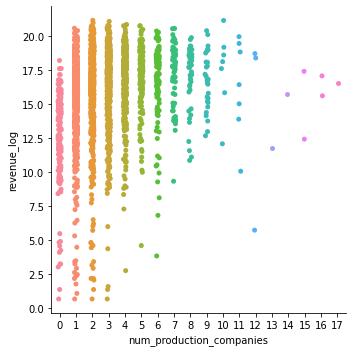

In [39]:
sns.catplot(x="num_production_companies",y="revenue_log",data=train)

The above plot demonstrates that having higher number of production companies does not really correlate into having a higher revenue for films. This is because almost all of the <code>num_production_companies</code> have high revenue films, whereas films with 12-17 productions associated has a smaller peak in terms of revenue. However, we do see a trend, where films with 0 to 6 production companies contribute the most to having low revenue films. Films with a higher number of production companies associated generally has smaller number of low revenue films. 

Let us visualize the production companies with the most number of films:

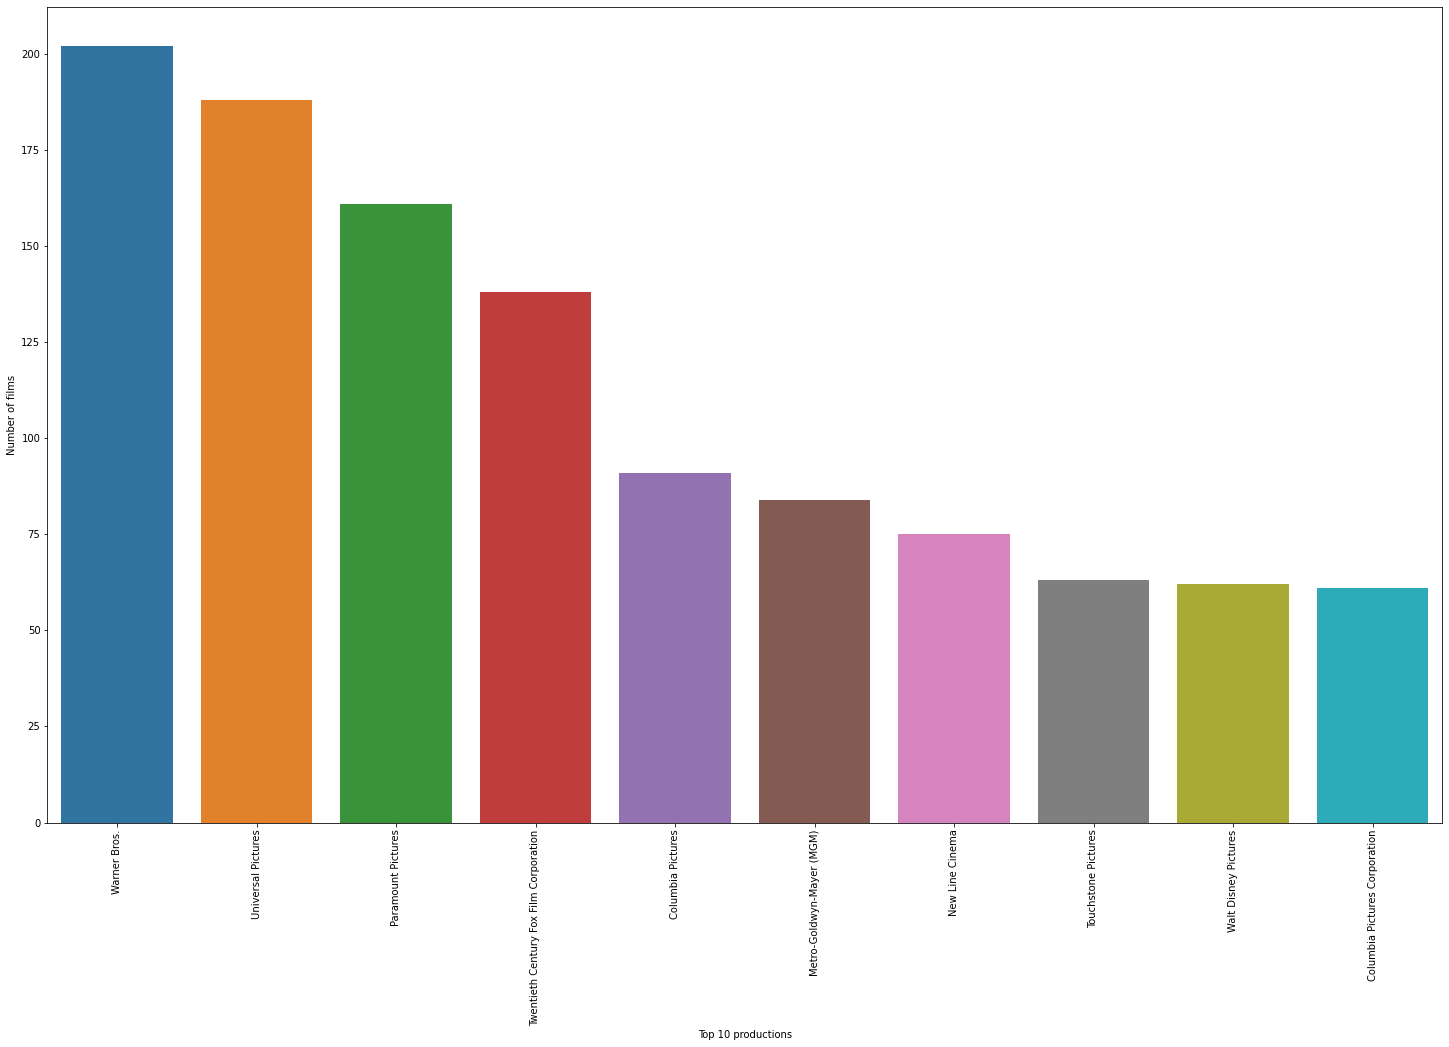

In [40]:
'''Convert entries into list of dictionaries. Store production names in a list, and visualize the top 10 production companies associated with films using a Counter'''

castls = []
castls.extend(train["production_companies"].apply(lambda x: [i["name"] for i in eval(x)]))
castls=itertools.chain.from_iterable(castls)
c = Counter(list(castls))

'''Bar plot'''
    
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(10)], y=[i[1] for i in c.most_common(10)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 10 productions')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    
'''We discover that there isn't a monopoly in terms of production companies in the film business. 
The disparity between number of films between the top 10 production companies is not overwhelmingly large.
Hence, it is not necessary to create seperate columns of each production companies, which may introduce overfitting.
Instead, we will store a sorted entry of production companies, and label encode it, since similar production companies often unite, and this may be a contributor to the film's revenue'''

train["production_companies"] = train["production_companies"].apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])))
test["production_companies"] = test["production_companies"].apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])))

'''Label Encoding'''

train["production_companies"], test["production_companies"] = encoder(train["production_companies"], test["production_companies"])

> <h2><b>Production Countries:</b></h2>
        
When we think of <b>Hollywood</b>, we think of the <b>United States of America</b>. When we think of Bollywood, we think of <b>India</b>. Hence, the production country of a movie is a significant parameter that we have to consider. The production country of a movie can often dictate the film's tone, the target audience, and the global reach of the film. A film developed by <b>USA</b> is more likely to be globally successful, as opposed to a film produced by <b>South Korea</b>. A higher global success equates to a higher revenue.

Let us look at the data more closely:

In [41]:
train.loc[0,"production_countries"]  #Visualizing an entry in production countries

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

It seems like the data is shaped similarly as <code>production_companies</code>, where the data is stored as a string. The string contains a list of dictionaries, where we are only interested in the <code>name</code> key, as it contains the relevant country. 

Let us first deal with the null values similarly to how we dealt with in <code>production_companies</code>.

In [42]:
'''Fill null entries with {}'''

train.loc[train["production_countries"].isna(),"production_countries"] = "{}"
test.loc[test["production_countries"].isna(),"production_countries"] = "{}"

Let us now create a new column, which will calculate the total number of countries involved with a respective movie.

In [43]:
'''Count number of production countries involved with a particular film'''

train["num_production_countries"] = train["production_countries"].apply(lambda x: x.count("name") if x!="{}" else 0)
test["num_production_countries"] = test["production_countries"].apply(lambda x: x.count("name") if x!="{}" else 0)

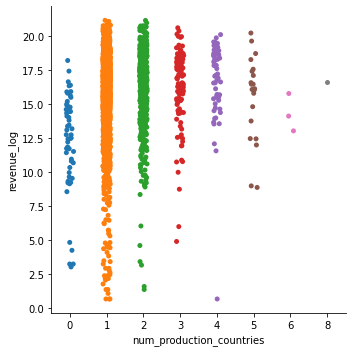

In [44]:
sns.catplot(x="num_production_countries",y="revenue_log",data=train)

It seems films with 1 production country involved has a large range of low revenue movies to high revenue movies. Films with 2-5 countries involed generally seems to gross relatively higher in the box office.

Since the structure of the data is identical to <code>production_companies</code>, we will be performing identical operations to find out the top countries with most number of films, and hence, create new columns which indicate presence or absence of these countries in producing a given film.

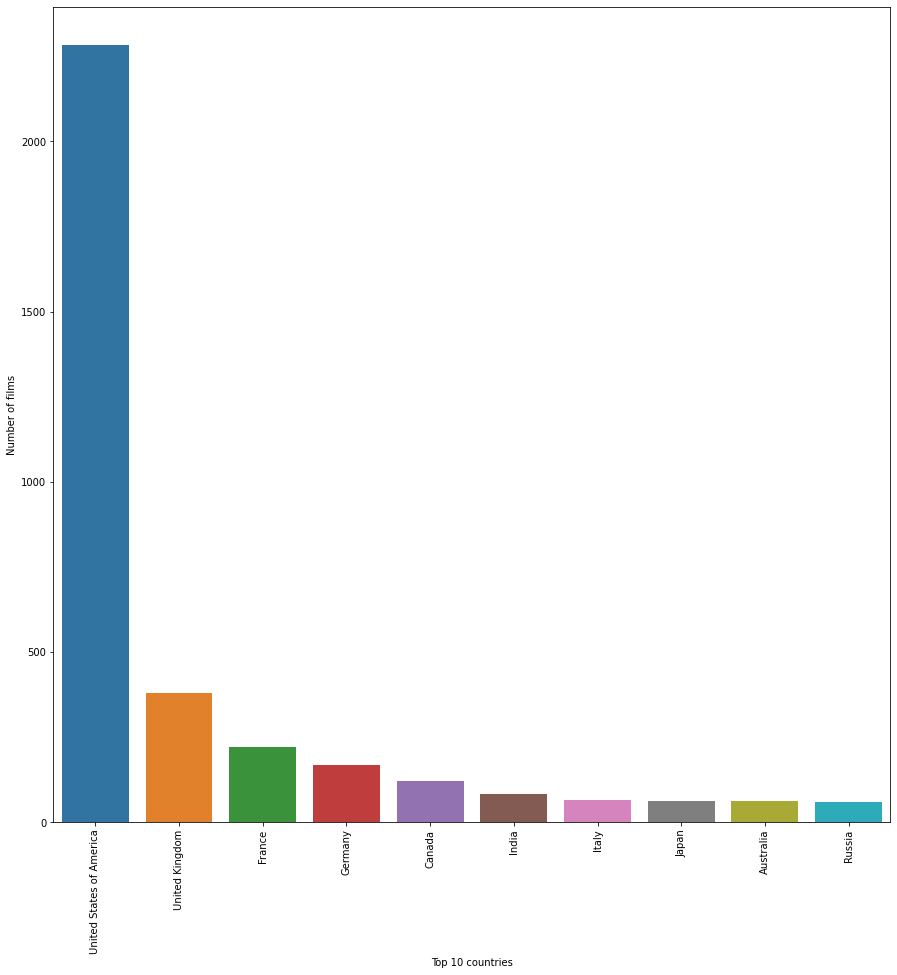

In [45]:
'''Convert entries into list of dictionaries. Store country names in a list, and visualize the top 10 countries associated with films using a Counter'''

castls = []
castls.extend(train["production_countries"].apply(lambda x: [i["name"] for i in eval(x)]))
castls=itertools.chain.from_iterable(castls)
c = Counter(list(castls))

'''Bar plot'''

fig_dims = (15, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(10)], y=[i[1] for i in c.most_common(10)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 10 countries')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

'''We discover that there is a monopoly in terms of production countries in the film business. 
The disparity between number of films between the top country is overwhelmingly large.
Hence, it is may prove beneficial to create a seperate column for United States of America.
We will also store a sorted entry of countries, and label encode it, since similar countries often unite, and this may be a contributor to the film's revenue'''

for i in c.most_common(1):  #United States of America dominates in terms of production_country, hence it may be favourable to add a seperate column indicating their presence
  train["country_"+ str(i[0])] = train["production_countries"].apply(lambda x: 1 if i[0] in eval(x) else 0 )

'''Repeat for Test'''

castls = []
castls.extend(test["production_countries"].apply(lambda x: [i["name"] for i in eval(x)]))
castls=itertools.chain.from_iterable(castls)
c = Counter(list(castls))
for i in c.most_common(1):
     test["country_"+ str(i[0])] = test["production_countries"].apply(lambda x: 1 if i[0] in eval(x) else 0 )


train["production_countries"] = train["production_countries"].apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])))
test["production_countries"] = test["production_countries"].apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])))

'''Label Encoding'''

train["production_countries"], test["production_countries"] = encoder(train["production_countries"], test["production_countries"])

> <h2><b>Status:</b></h2>
        The <code>status</code> of a film infers whether the film is upcoming, or whether it is released. However, we feel this is not a particularly useful feature in the case of our model. This is because, we intend for our model to be used by cinema theatres, and movie lovers for films that are about to be released. Even though a film is already released, if the film is tested with our model, it would output its estimation of the revenue from the moment of its release to the end of its runtime in cinemas. Hence, the fact that a cinema is released or not is irrelevant to our model prediction.

In [46]:
'''Visualization of Datasets'''

print("=====Train=====")
print(train.status.value_counts())
print("=====Test=====")
print(test.status.value_counts())
print("=====Rumoured Revenue=====")
train.loc[train.status=="Rumored",'revenue']

=====Train=====
Released    2996
Rumored        4
Name: status, dtype: int64
=====Test=====
Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64
=====Rumoured Revenue=====


609       273644
1007          60
1216    13418091
1618      229000
Name: revenue, dtype: int64

It is a bit weird how <b>Rumored</b> films in train still have a revenue. However, we can proceed to discard this column as it is not of use to us.

In [47]:
'''Dropping columns'''

train.drop("status", axis=1, inplace=True)
test.drop("status", axis=1, inplace=True)

> <h2><b>Tagline:</b></h2>
        <b>Taglines</b> (often called <b>slogans</b>) are catchy, enticing short phrases used by marketers and film studios to advertise and sell a <b>movie</b> (create <b>"buzz"</b>), and to sum up the plot, tone or themes of a <b>film</b>.
        
The tagline is exactly like an <code>overview</code> of a film, but it is shorter. Hence, it is very important for a tagline to be concise, yes straight to the point, giving the viewers a spike of excitement and anticipation to watch the film. Hence, just like <code>overview</code>, we should be counting number of words/length of <code>tagline</code>.

Let us visualize a <code>tagline</code> first:

In [48]:
train.tagline[0]    #Visualizing taglines

'The Laws of Space and Time are About to be Violated.'

Let us count the number of <b>null</b> values.

In [49]:
print("Number of null values: " + str(train.tagline.isna().sum()))    #Number of null values

Number of null values: 597



Unlike <code>overview</code>, there are a handful of <b>null</b> values in the <code>tagline</code> column. Hence, maybe it will be useful to see a relationship between the presence and absence of a <code>tagline</code> and <code>revenue</code> generated.

In [50]:
'''The above code creates a new column named bool_collection,
which returns 1 for films belonging to a tagline, and 0 otherwise'''

'''Train'''

train['bool_tagline'] = 1
train.loc[train.tagline.isnull(), 'bool_tagline'] = 0

'''Test'''

test['bool_tagline'] = 1
test.loc[test.tagline.isnull(), 'bool_tagline'] = 0

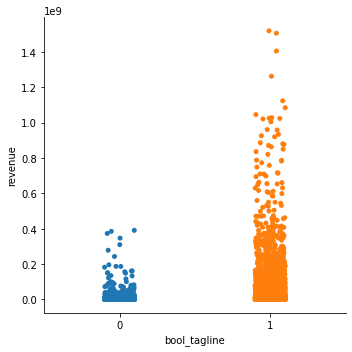

In [51]:
sns.catplot(x="bool_tagline",y="revenue",data=train)

This indeed shows that the relationship between the presence and absence of a <code>tagline</code> gives some interesting results. More films with a <code>tagline</code> earn a higher <code>revenue</code>.

In [52]:
'''Create columns for length of tagline and number of words in tagline'''

train["tagline_size"] = train["tagline"].fillna("").apply(lambda x: len(x))
test["tagline_size"] = test["tagline"].fillna("").apply(lambda x: len(x))

train["tagline_words"] = train["tagline"].fillna("").apply(lambda x: len(x.split(" ")) if x!="" else 0)
test["tagline_words"] = test["tagline"].fillna("").apply(lambda x: len(x.split(" ")) if x!="" else 0)

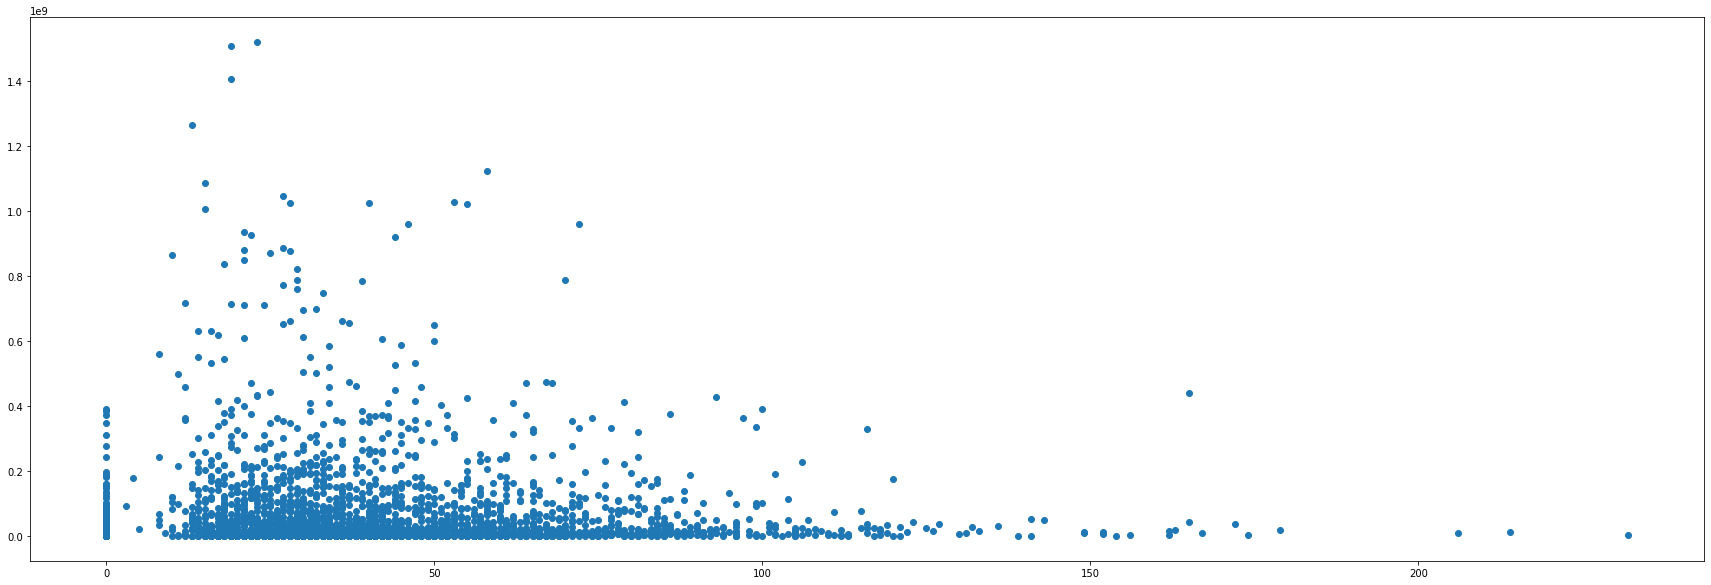

In [53]:
'''Visualizing boxplot between tagline size and revenue'''

X = train["tagline_size"] 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

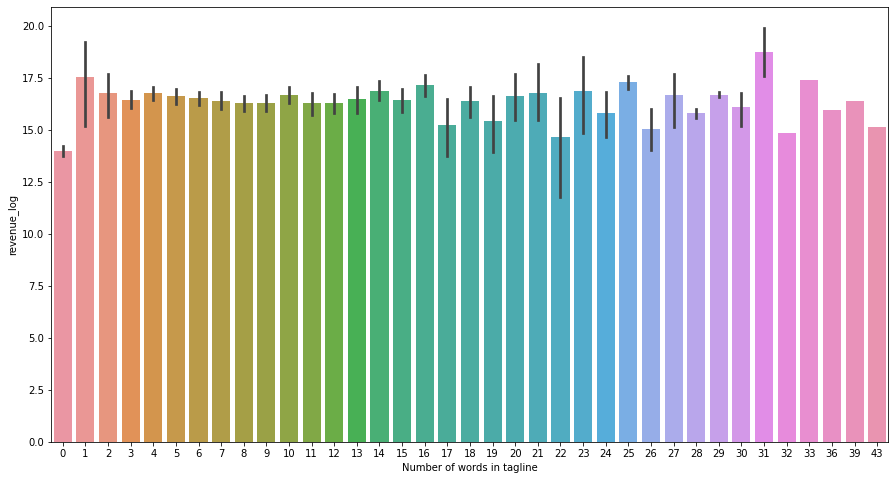

In [54]:
'''Relationship between tagline words and revenue'''

plt.figure(figsize=(15,8))
g = sns.barplot(x='tagline_words', y='revenue_log', data=train)
g.set(xlabel='Number of words in tagline')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=0)

In [55]:
'''Correlation'''

print("Correlation between tagline size and revenue: " + str(train.tagline_size.corr(train["revenue"])))
print("Correlation between tagline words and revenue: " + str(train.tagline_words.corr(train["revenue"])))

Correlation between tagline size and revenue: 0.018224071192709586
Correlation between tagline words and revenue: 0.020741338924176192


Since number of words have a higher correlation with the revenue, we discard <code>tagline</code> and <code>tagline_size</code>.

In [56]:
'''Dropping tagline and tagline length'''

train.drop(["tagline","tagline_size"], axis = 1, inplace = True)
test.drop(["tagline","tagline_size"], axis = 1, inplace = True)

> <h2><b>Keywords:</b></h2>

<code>Keywords</code> are single word, which describe the plot, theme or style of the movie. Keywords can greatly influence the type of audience that a movie is expected to receive. A <code>keyword</code>, which signifies violence or adult content, may not be appropriate for a young audience. Hence, as a result, the film will be losing a significant portion of its revenue, since it will not be viewed by a certain age group.
        
Let us visualize the structure of <code>keyword</code>.

In [57]:
train["Keywords"][0]    #Visualizing keywords structure

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

From the above structure, we can deduce that it is very similar to the structure of <code>production_name</code> and <code>production_country</code>. Hence, we will be performing similar operations.

In [58]:
'''Fill null entries with {}'''

train.loc[train["Keywords"].isna(),"Keywords"] = "{}"
test.loc[test["Keywords"].isna(),"Keywords"] = "{}"

train["num_keywords"] = train["Keywords"].apply(lambda x: x.count("name") if x!="{}" else 0)
test["num_keywords"] = test["Keywords"].apply(lambda x: x.count("name") if x!="{}" else 0)

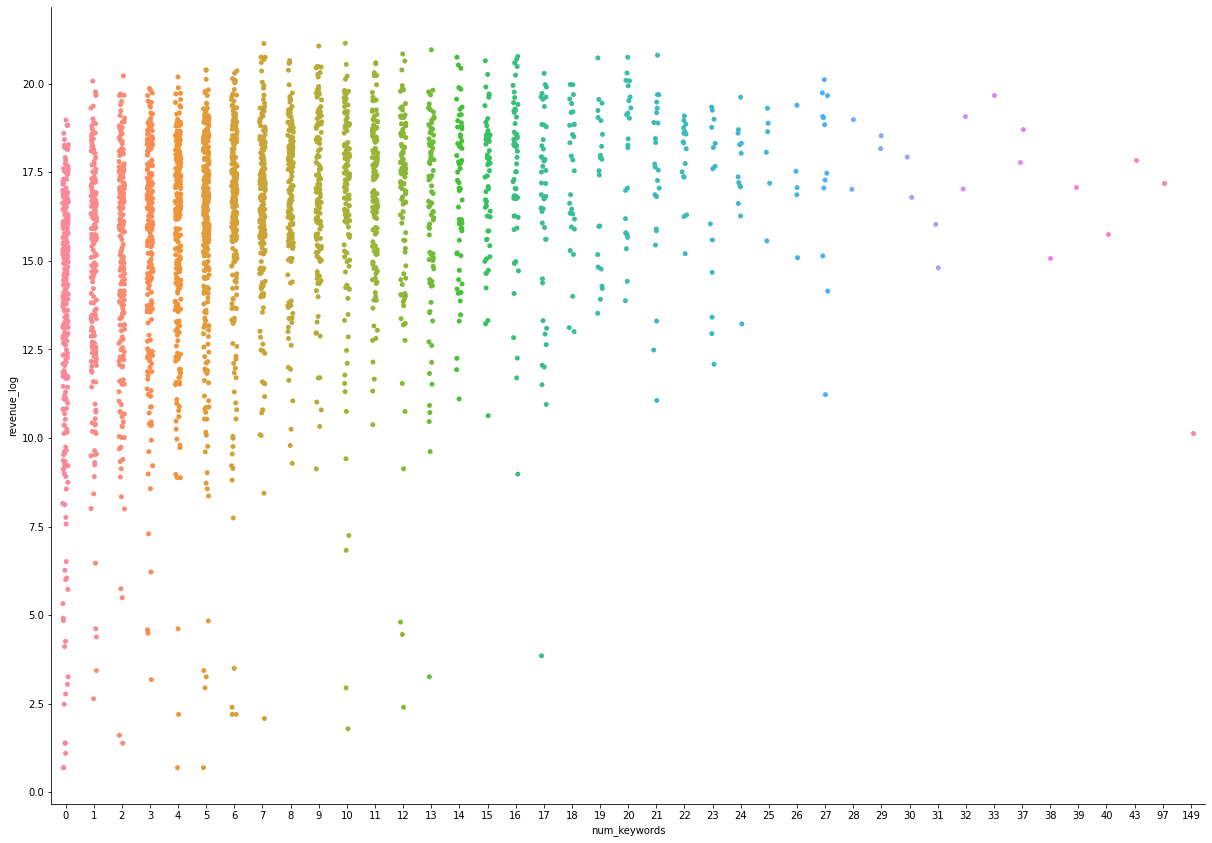

In [59]:
'''Relationship between number of keywords and revenue'''

g = sns.catplot(x="num_keywords",y="revenue_log",data=train)
g.fig.set_figwidth(20)
g.fig.set_figheight(13)

After observing the catplot, we can observe that films with lower number of <code>keywords</code> tend to have more low <code>revenue</code> films, whereas films with higher number of <code>keywords</code> tend to have a larger <code>revenue</code>.

'The disparity in number of films between the top keywords is not noticable.\nHence, it may not prove beneficial to create seperate columns for keywords.\nWe will also not store a sorted entry of keywords, and label encode it, since a film may have a large permutation of keywords and hence, it may not be beneficial to label encode every combination'

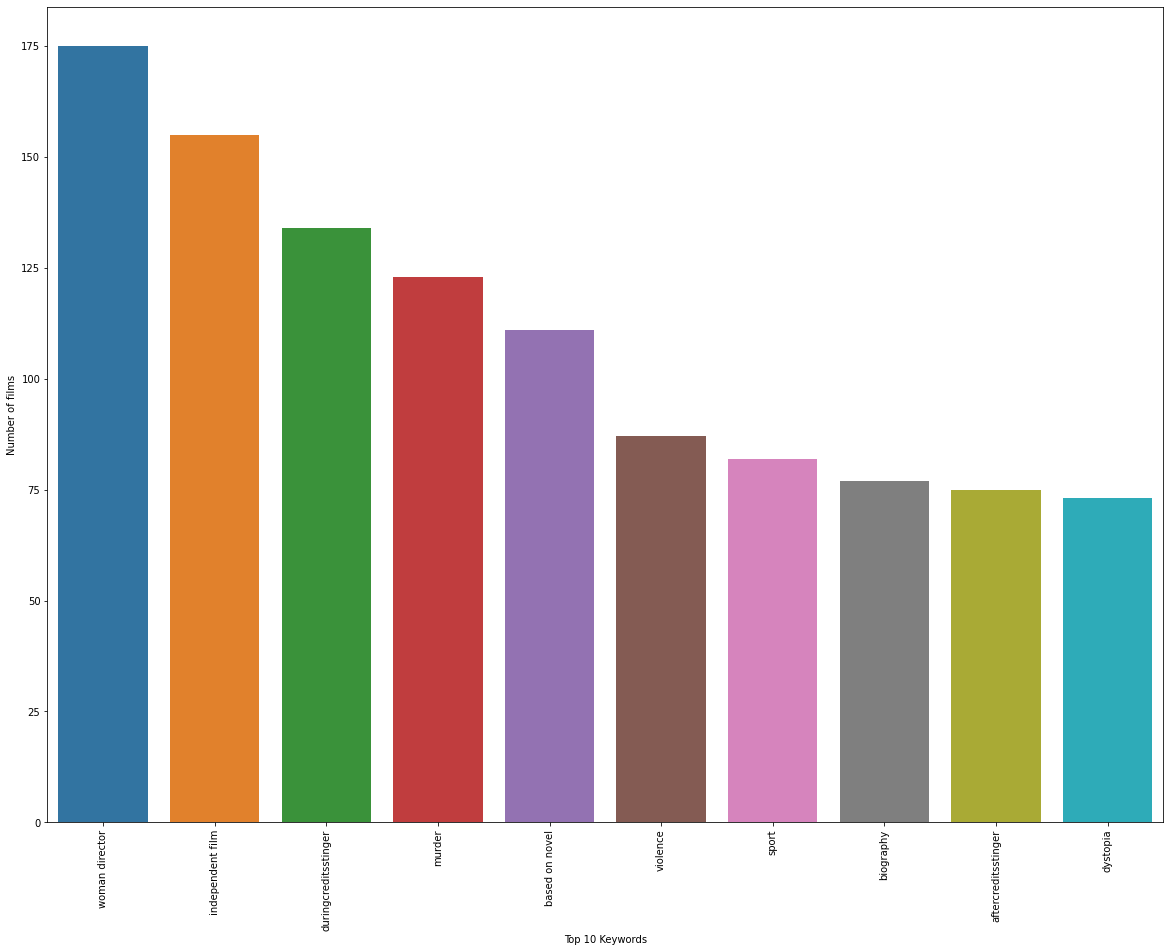

In [60]:
'''Convert entries into list of dictionaries. Store keywords in a list, and visualize the top 10 keywords associated with films using a Counter'''

castls = []
castls.extend(train["Keywords"].apply(lambda x: [i["name"] for i in eval(x)]))
castls=itertools.chain.from_iterable(castls)
c = Counter(list(castls))

'''Bar plot'''
    
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(10)], y=[i[1] for i in c.most_common(10)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 10 Keywords')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    
'''The disparity in number of films between the top keywords is not noticable.
Hence, it may not prove beneficial to create seperate columns for keywords.
We will also not store a sorted entry of keywords, and label encode it, since a film may have a large permutation of keywords and hence, it may not be beneficial to label encode every combination'''

In [61]:
#Drop the keyword column
train.drop(["Keywords"], axis=1, inplace=True)
test.drop(["Keywords"], axis=1, inplace=True)

><h2><b>Cast:</b></h2>
        The cast of a film is one of the most integral part of the entire process. A good cast is a key indicator on the quality of the film, and the budget of the film, since prestigious actors are expensive to cast. A group of prominent actors in a film can instantly raise the excitement and hype generated for the film, and this translates to a higher revenue generated.
        
Our goal in this section is to isolate the most famous actors, and mark their presence and absence in a film. Since famous actors are huge contributors to the revenue and hype of a film, marking their presence and absence may be useful. However, let us perform some data exploration first to understand our data:

In [62]:
train['cast'][0]   #Visualizing cast

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

This looks very complicated but it is essentially the same format as <code>production_companies, keyword, production_countries</code>. The entries are a string, containing a list of dictionaries. The entries are quite extensive however. We have the character names, the gender of the actor and the name of the actor. These are very interesting parameters that we can work on.

Let us perform similar opearations like we did for <code>keyword</code> and <code>production_company</code>.

Firstly, let us count the total number of cast member present in each film.

In [63]:
'''Filling null entries with {}'''

train.loc[train["cast"].isna(),"cast"] = "{}"
test.loc[test["cast"].isna(),"cast"] = "{}"

train["num_cast"] = train["cast"].apply(lambda x: x.count("name") if x!="{}" else 0)
test["num_cast"] = test["cast"].apply(lambda x: x.count("name") if x!="{}" else 0)

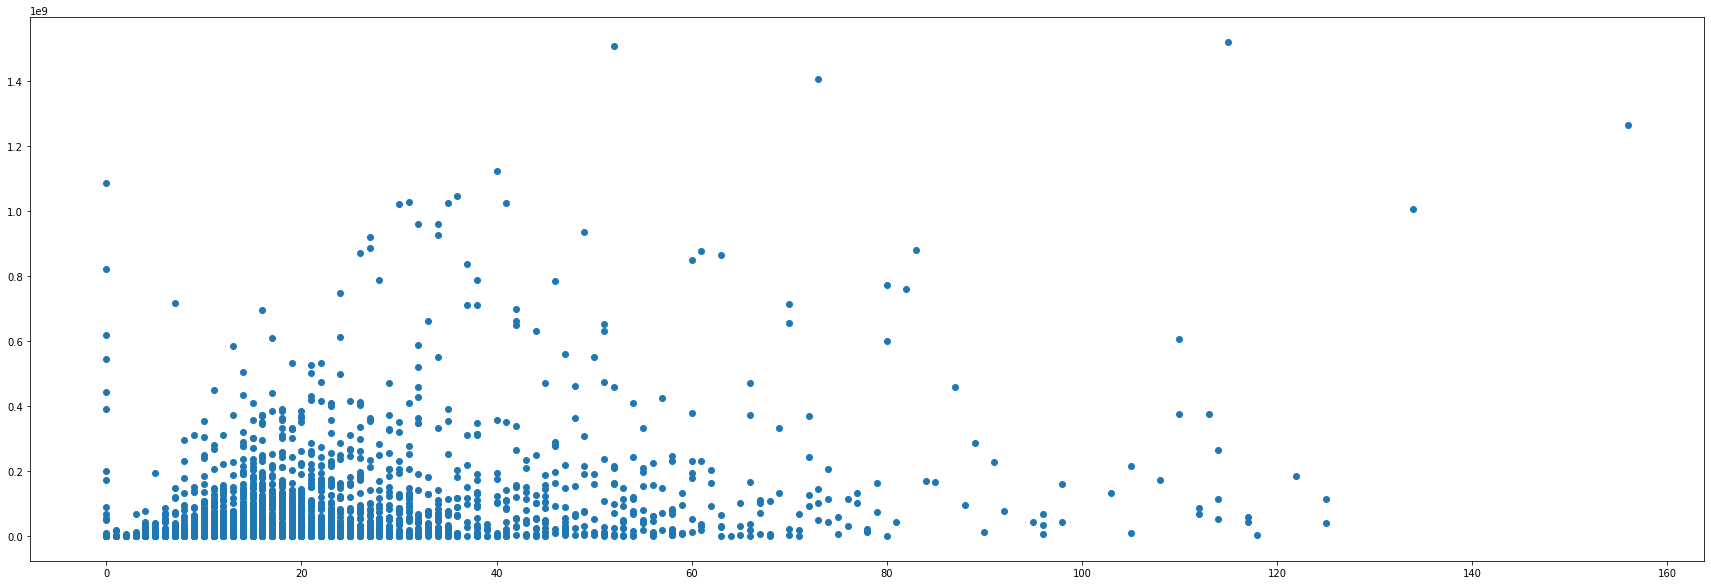

In [64]:
'''Visualizing boxplot between number of cast and revenue'''

X = train["num_cast"] 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

In [65]:
print("Correlation between number of cast and revenue: " + str(X.corr(Y)))

Correlation between number of cast and revenue: 0.33605905964564964


From the graph and correlation coefficient, it can be reasonably deduced that number of cast in a film does not necessarily have a significant impact of the revenue. It matters more on the quality of the cast, rather than the quantity.

Let us try to isolate the top actors and actresses in the film industry, and create columns to specify their presence and absence.

'The disparity in number of films between the top actors is not noticable.\nHence, it may not prove beneficial to create seperate columns for cast.\nWe will also not store a sorted entry of cast, and label encode it, since a film may have a large permutation of cast and hence, it may not be beneficial to label encode every combination'

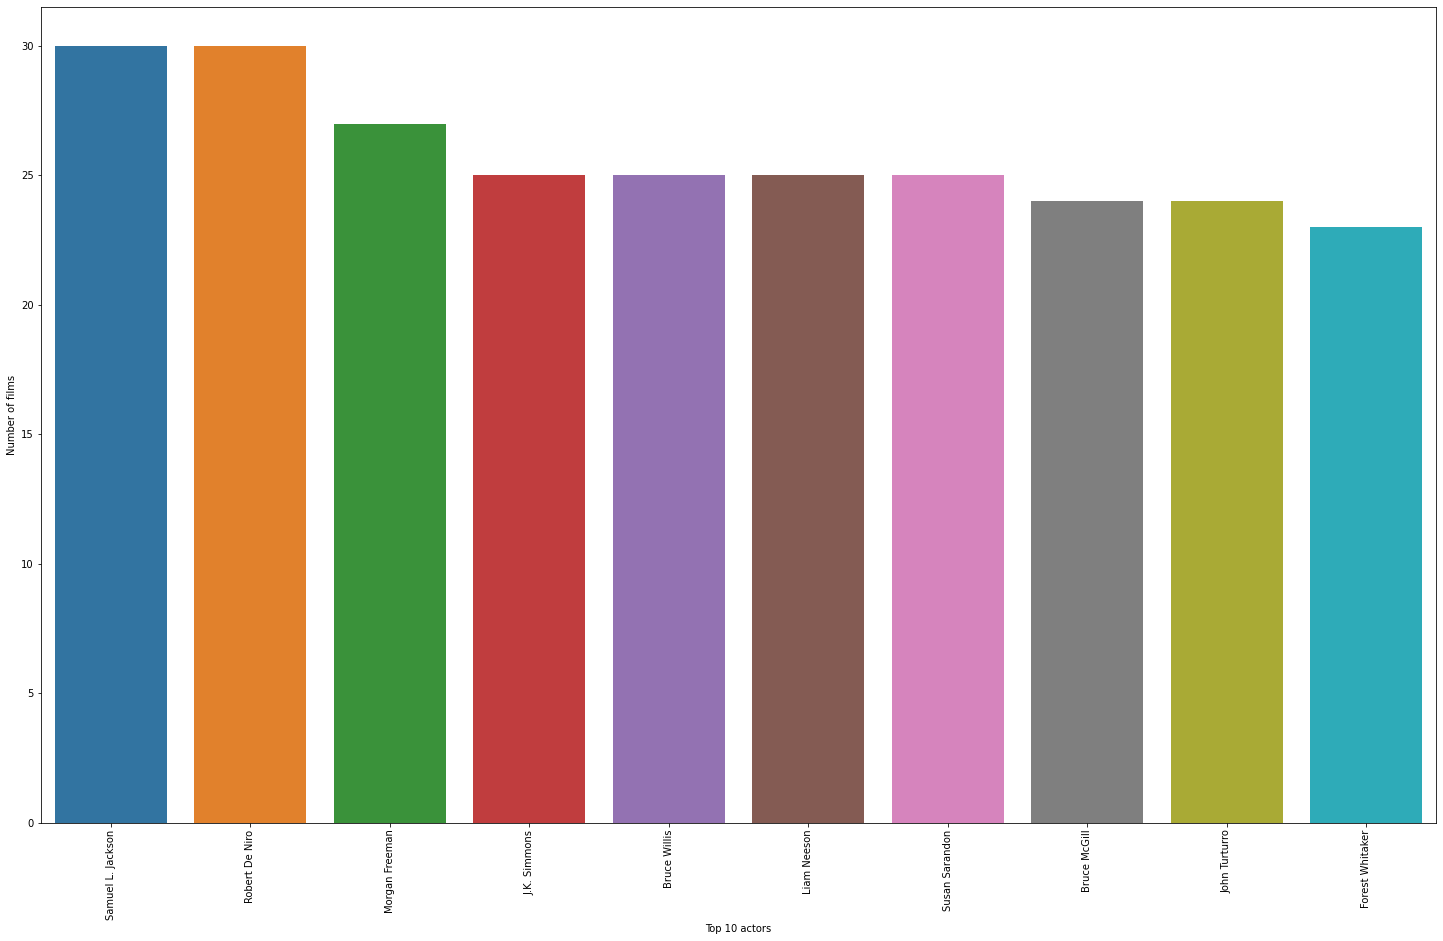

In [66]:
'''Convert entries into list of dictionaries. Store actors in a list, and visualize the top 10 actors associated with films using a Counter'''

castls = []
castls.extend(train["cast"].apply(lambda x: [i["name"] for i in eval(x)]))
castls=itertools.chain.from_iterable(castls)
c = Counter(list(castls))

'''Bar plot'''
    
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(10)], y=[i[1] for i in c.most_common(10)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 10 actors')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    

'''The disparity in number of films between the top actors is not noticable.
Hence, it may not prove beneficial to create seperate columns for cast.
We will also not store a sorted entry of cast, and label encode it, since a film may have a large permutation of cast and hence, it may not be beneficial to label encode every combination'''

Number of <b>females</b> and <b>men</b> in a movie are also crucial to the target audience. A film with a larger female characters or a large number of male characters may attract different crowds.

In [67]:
'''Visualizing number of male and female cast members'''

genderls = []
genderls.extend(train["cast"].apply(lambda x: [i["gender"] for i in eval(x)]))
genderls=itertools.chain.from_iterable(genderls)
c = Counter(list(genderls))
print(c.most_common())


[(2, 27949), (0, 20329), (1, 13533)]


By studying one of the cast examples,
<ul>
    <li>2 is male</li>
    <li>1 is female</li>
    <li>0 is unknown</li>
</ul>

In [68]:
'''Number of males, females and unspecified gender in each movies'''

train["cast_gender0"] = train["cast"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==0]))
train["cast_gender1"] = train["cast"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==1]))
train["cast_gender2"] = train["cast"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==2]))

'''Test'''

test["cast_gender0"] = test["cast"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==0]))
test["cast_gender1"] = test["cast"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==1]))
test["cast_gender2"] = test["cast"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==2]))

In [69]:
train

,id,budget,genres,homepage,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,num_production_companies,num_production_countries,country_United States of America,bool_tagline,tagline_words,num_keywords,num_cast,cast_gender0,cast_gender1,cast_gender2
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,1939,...,3,1,0,1,11,4,24,6,8,10
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2352,...,1,1,0,1,13,4,20,0,10,10
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,647,...,3,1,0,1,10,12,51,31,7,13
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,...,0,1,0,0,0,7,7,4,1,2
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,...,0,1,0,0,0,0,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,1992,...,2,1,0,1,15,19,15,1,3,11
2996,2997,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,1410,...,2,2,0,0,0,6,11,9,1,1
2997,2998,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,1459,...,3,1,0,1,6,14,15,2,4,9
2998,2999,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,15.725542,/nIY4kvJTTnxoBR0wycrXng5MOYs.jpg,1753,...,2,1,0,1,13,22,26,1,9,16


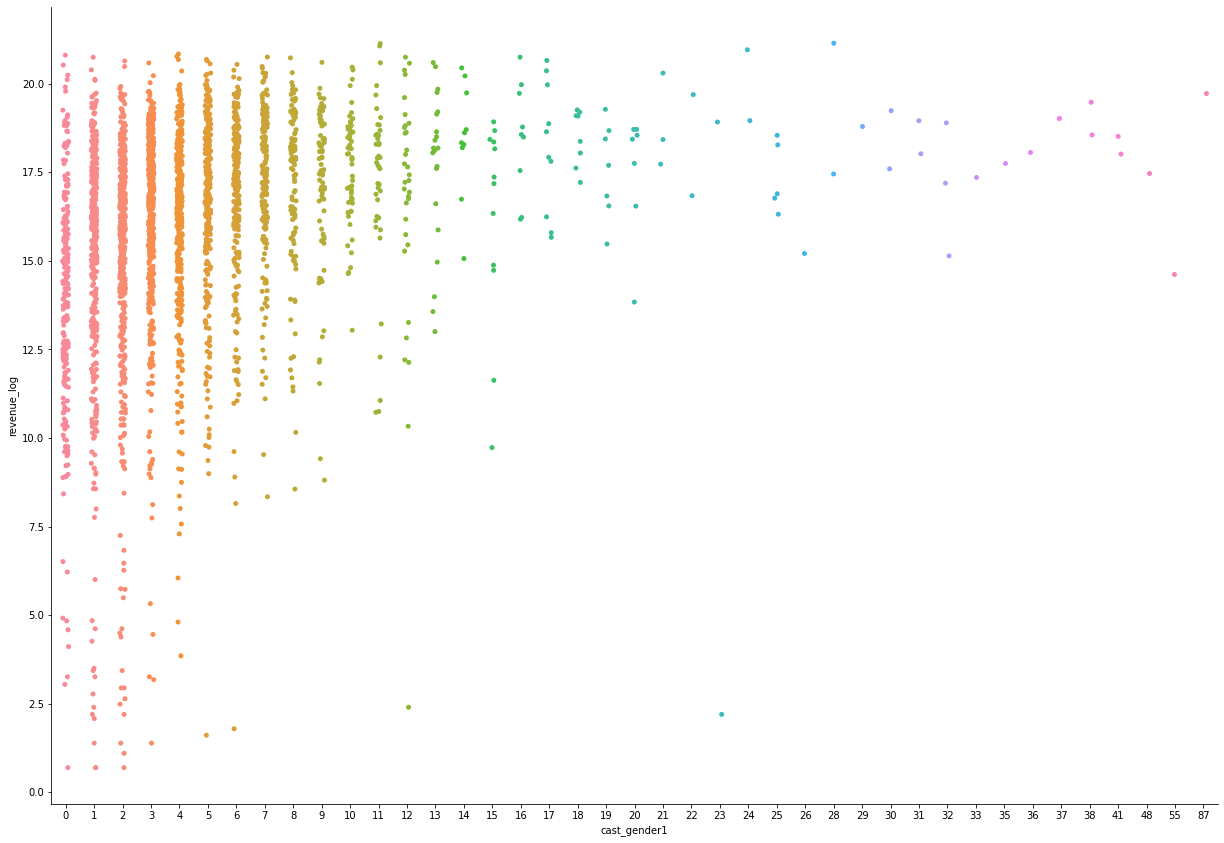

In [70]:
'''Relationship between number of females and revenue'''

g = sns.catplot(x="cast_gender1",y="revenue_log",data=train)
g.fig.set_figwidth(20)
g.fig.set_figheight(13)

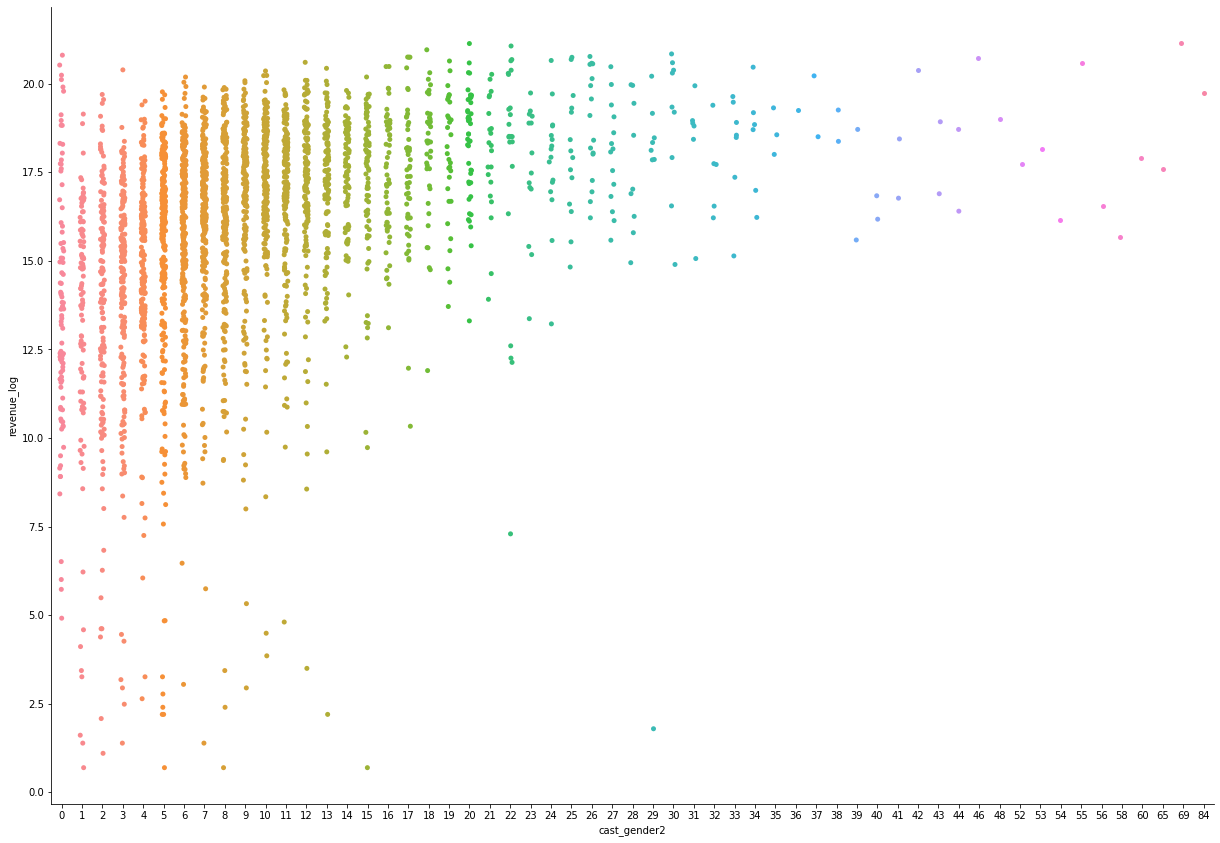

In [71]:
'''Relationship between number of males and revenue'''

g = sns.catplot(x="cast_gender2",y="revenue_log",data=train)
g.fig.set_figwidth(20)
g.fig.set_figheight(13)

Both the catplots show, that as number of females and men increases, the revenue generally tends to increase.

In [72]:
'''Dropping the cast column'''

train.drop(["cast"],axis=1,inplace=True)
test.drop(["cast"],axis=1,inplace=True)

><h2><b>Genre</b></h2>


Film genres are various forms or identifiable types, categories, classifications or groups of films that are recurring and have similar,patterns, syntax, filmic techniques, conventions – that include one or more of the following: settings (and props), content and subject matter, themes, mood, period, plot, central narrative events, motifs, styles, structures, situations, recurring icons, stock characters, and stars. The genre can have significant impact on the revenue since a more crowds eill appreceiacte genres which are/were popular to that time.
        
Let us perform data exploration on <code>genres</code>

<b>Note:</b> A given film can belong to 1 or more genres

In [73]:
print(train['genres'][0])      #Visualizing genres

[{'id': 35, 'name': 'Comedy'}]


Now let us see the number of genres in the films

In [74]:
'''Filling missing entries with {}'''

train.loc[train["genres"].isna(),"genres"] = "{}"
test.loc[test["genres"].isna(),"genres"] = "{}"

train["num_genres"] = train["genres"].apply(lambda x: x.count("name") if x!="{}" else 0)
test["num_genres"] = test["genres"].apply(lambda x: x.count("name") if x!="{}" else 0)

In [75]:
train.head()      #Visualizing the train dataset

,id,budget,genres,homepage,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,num_production_countries,country_United States of America,bool_tagline,tagline_words,num_keywords,num_cast,cast_gender0,cast_gender1,cast_gender2,num_genres
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,1939,...,1,0,1,11,4,24,6,8,10,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2352,...,1,0,1,13,4,20,0,10,10,4
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,647,...,1,0,1,10,12,51,31,7,13,1
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,...,1,0,0,0,7,7,4,1,2,2
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,...,1,0,0,0,0,4,0,0,4,2


lets perform some visualisation to gain better insights

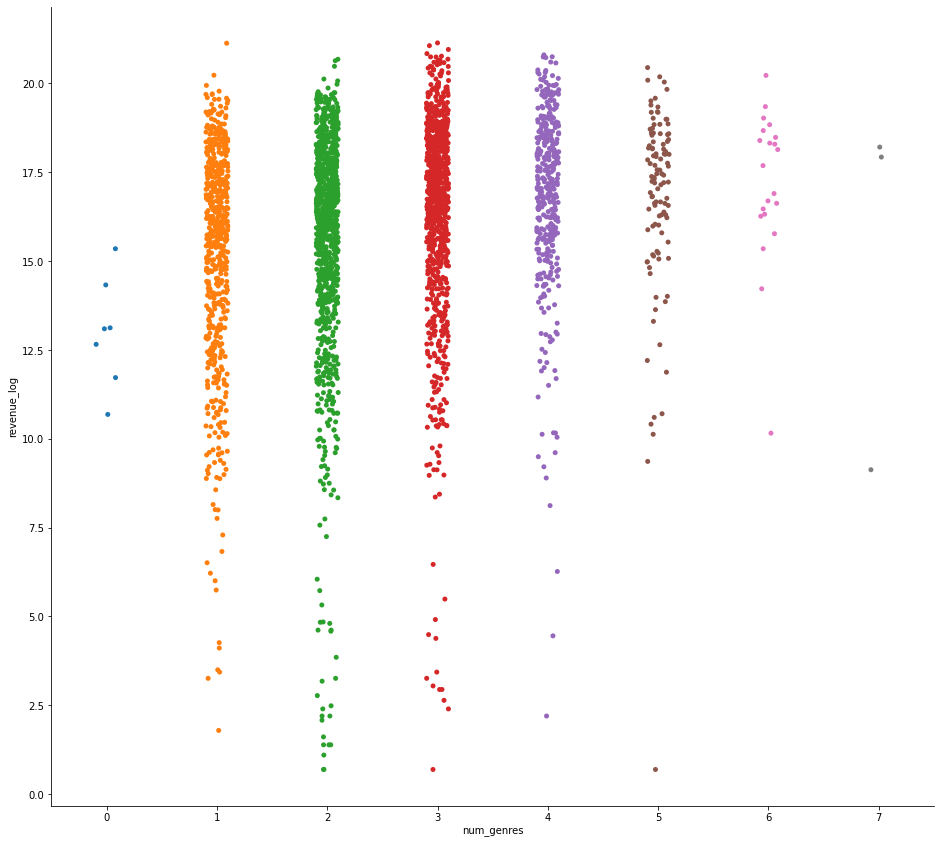

In [76]:
'''Relationship between number of genres and revenue'''

g = sns.catplot(x="num_genres",y="revenue_log",data=train)
g.fig.set_figwidth(15)
g.fig.set_figheight(13)

This shows us that having a high number of genres does not necessarily mean more revenue, since it can be seen that the distribution of high revenure films across different number of genres is fairly equal. 

Now let us try to isolate the most popular genres

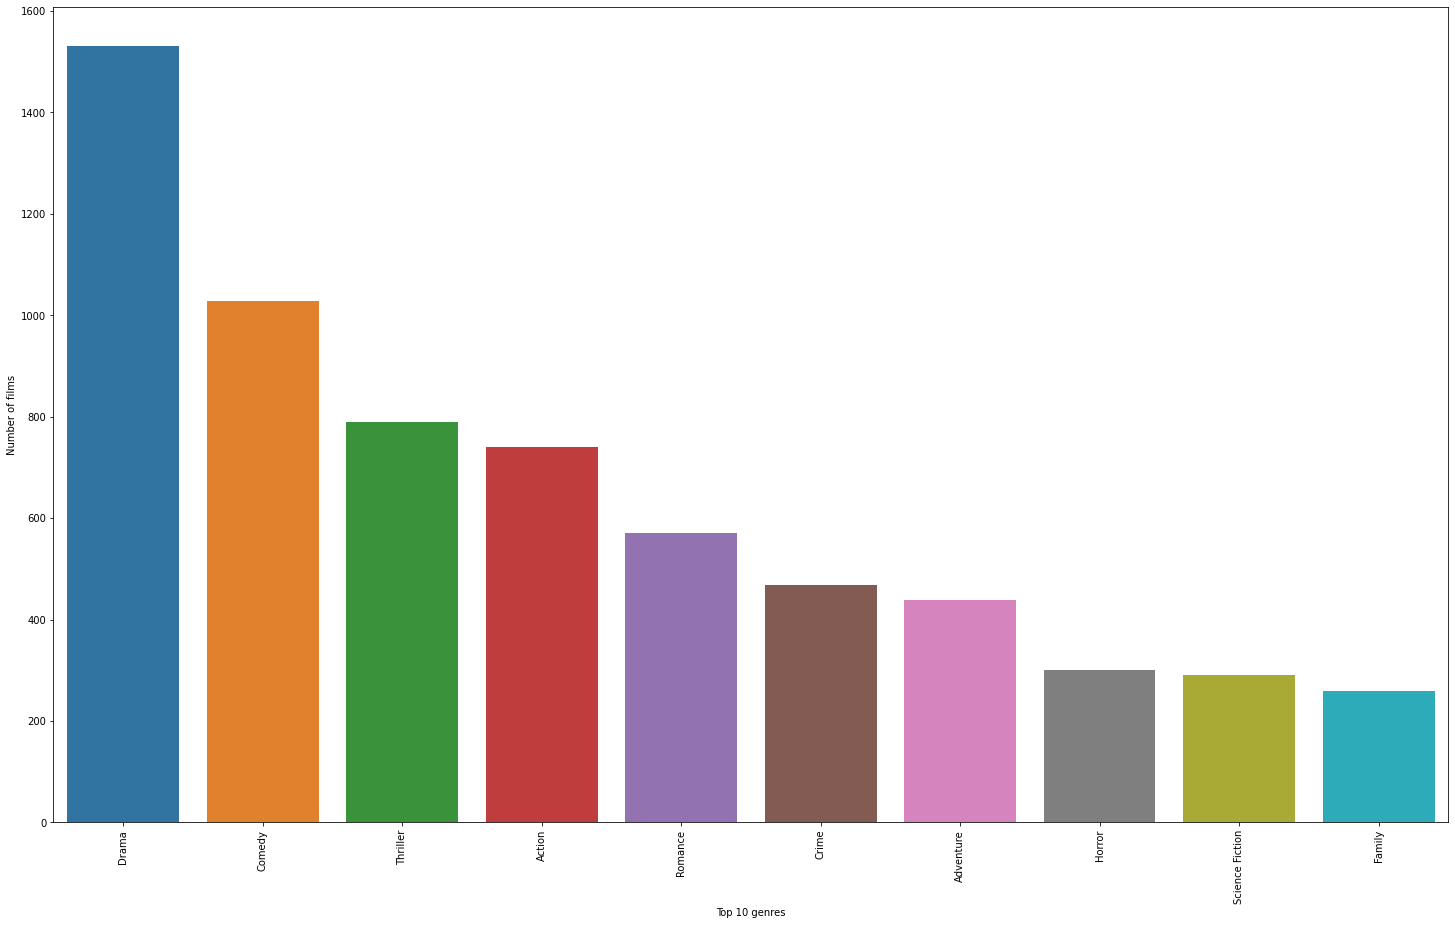

In [77]:
'''Convert entries into list of dictionaries. Store genre names in a list, and visualize the top 10 genres associated with films using a Counter'''

genresls = []
genresls.extend(train["genres"].apply(lambda x: [i["name"] for i in eval(x)]))
genresls=itertools.chain.from_iterable(genresls)
c = Counter(list(genresls))

'''Bar plot'''
    
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(10)], y=[i[1] for i in c.most_common(10)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 10 genres')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

'''We discover that there is no monopoly in terms of genres in the film business. 
The disparity between number of films between the top genres is not overwhelmingly large.
We will store a sorted entry of genres, and label encode it, since similar genres often unite, and this may be a contributor to the film's revenue'''
    
train["genres"] = train["genres"].apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])))
test["genres"] = test["genres"].apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])))

train["genres"], test["genres"] = encoder(train["genres"], test["genres"])

><h2><b>Homepage</b></h2>
        Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/ , this is the homepage of Whiplash movie. It may be of interest as, presence of a homepage can increase the adveritsements etc relating to the movie, as well as create a fanbase for the film 
        
Let us perform data exploration on <code>homepage</code>

In [78]:
'''Visualization of homepage'''

print("----- HOMEPAGE OF FIRST 10 RECORDS -----")
print(train['homepage'][:10])

----- HOMEPAGE OF FIRST 10 RECORDS -----
0                                   NaN
1                                   NaN
2     http://sonyclassics.com/whiplash/
3            http://kahaanithefilm.com/
4                                   NaN
5                                   NaN
6    http://www.thepossessionmovie.com/
7                                   NaN
8                                   NaN
9                                   NaN
Name: homepage, dtype: object


As we can see, if the movie has a homepage, it's link is provided, otherwise it is assigned NaN.

Now lets see how many movies have a homepage, we will create a new column in the dataset called as bool_homepage which stores whether the film has a homepage or not. 

In [79]:
'''Creating a new column bool_homepage which returns 1 if films have a homepage and 0 if it does not'''

train['bool_homepage'] = 1
train.loc[train.homepage.isnull(), 'bool_homepage'] = 0

'''Test'''

test['bool_homepage'] = 1
test.loc[test.homepage.isnull(), 'bool_homepage'] = 0

In [80]:
'''Counting the number of films with a homepage'''
print(train['bool_homepage'].value_counts())

0    2054
1     946
Name: bool_homepage, dtype: int64


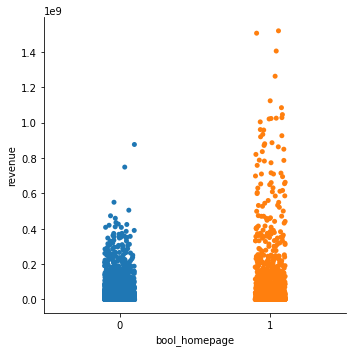

In [81]:
'''Making a catplot to visualize the impact of bool_homepage'''
sns.catplot(x="bool_homepage",y="revenue",data=train)

It can be clearly infered from the graph that, a high grossing film is more likely to have a homepage. Since we have already created a column to indicate presence/absence of homepage, the link to the homepage itself is irrelevant. Since we have no more useful information to extract from the homepage column, we drop <code>homepage</code> from the test and train dataset.

In [82]:
'''Dropping homepage from test and train datasets'''
train.drop("homepage", axis=1, inplace=True)
test.drop("homepage", axis=1, inplace=True)

In [83]:
train.head()

,id,budget,genres,imdb_id,original_language,original_title,popularity,poster_path,production_companies,production_countries,...,country_United States of America,bool_tagline,tagline_words,num_keywords,num_cast,cast_gender0,cast_gender1,cast_gender2,num_genres,bool_homepage
0,1,14000000,305,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,1939,277,...,0,1,11,4,24,6,8,10,1,0
1,2,40000000,330,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2352,277,...,0,1,13,4,20,0,10,10,4,0
2,3,3300000,435,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,647,277,...,0,1,10,12,51,31,7,13,1,1
3,4,1200000,486,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,201,...,0,0,0,7,7,4,1,2,2,1
4,5,0,194,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,263,...,0,0,0,0,4,0,0,4,2,0


><h2><b>Original Language</b></h2>
        It is the two digit code of the original language, in which the movie was made. Like: en = English, fr = french. This is of significance since a film in given language, will have speakers of that particular language as their primary audience and hence their primary source of revenue. 
        
Let us perform data exploration on <code>original language</code>

In [84]:
'''Data Exploration : original language'''
print("----- ORIGINAL LANGUAGE OF FIRST 10 RECORDS -----")
print(train['original_language'][:10])

----- ORIGINAL LANGUAGE OF FIRST 10 RECORDS -----
0    en
1    en
2    en
3    hi
4    ko
5    en
6    en
7    en
8    en
9    en
Name: original_language, dtype: object


In [85]:
train['original_language'].value_counts()      #Counting the Number of films from each language

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
da       5
fa       5
ro       4
hu       3
tr       3
fi       2
no       2
ml       2
pl       2
te       2
nb       1
vi       1
mr       1
el       1
id       1
ur       1
ar       1
sr       1
bn       1
he       1
cs       1
Name: original_language, dtype: int64

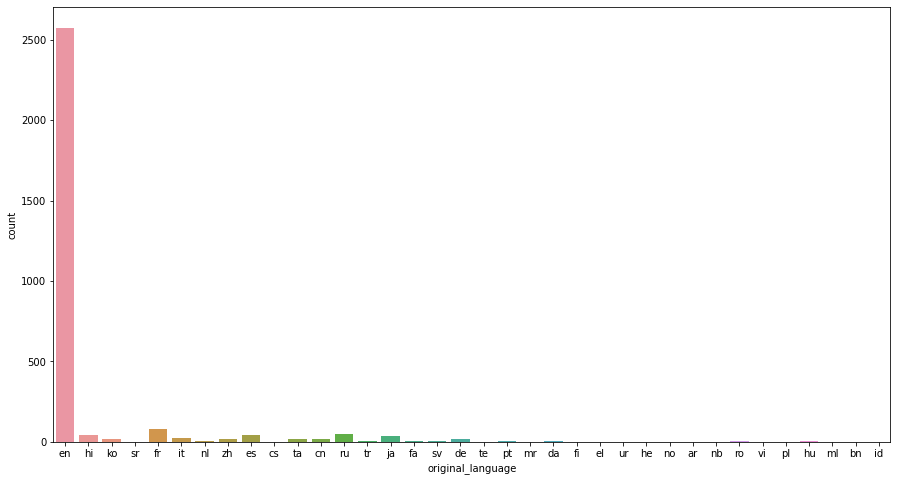

In [86]:
'''Plotting the original_language vs count'''
plt.figure(figsize=(15,8))
g = sns.countplot(x='original_language', data=train)

This shows us that a vast majority of our films is english. Now we need to find some correlations between language and revenue. 

In [87]:
'''Creating seperate columns to indicate whether a film's original language is english or not'''

train["bool_original_language_en"] = train["original_language"].apply(lambda x: 1 if x=="en" else 0)
test["bool_original_language_en"] = test["original_language"].apply(lambda x: 1 if x=="en" else 0)

In [88]:
train["original_language"], test["original_language"] = encoder(train["original_language"], test["original_language"])   #Label encoding the original language column

In [89]:
train.head()    #Checking if the new column is created

,id,budget,genres,imdb_id,original_language,original_title,popularity,poster_path,production_companies,production_countries,...,bool_tagline,tagline_words,num_keywords,num_cast,cast_gender0,cast_gender1,cast_gender2,num_genres,bool_homepage,bool_original_language_en
0,1,14000000,305,tt2637294,7,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,1939,277,...,1,11,4,24,6,8,10,1,0,1
1,2,40000000,330,tt0368933,7,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2352,277,...,1,13,4,20,0,10,10,4,0,1
2,3,3300000,435,tt2582802,7,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,647,277,...,1,10,12,51,31,7,13,1,1,1
3,4,1200000,486,tt1821480,13,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,201,...,0,0,7,7,4,1,2,2,1,0
4,5,0,194,tt1380152,18,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,263,...,0,0,0,4,0,0,4,2,0,0


Now let us find the corellation between <code>bool_ol_en</code> and <code>revenue</code>

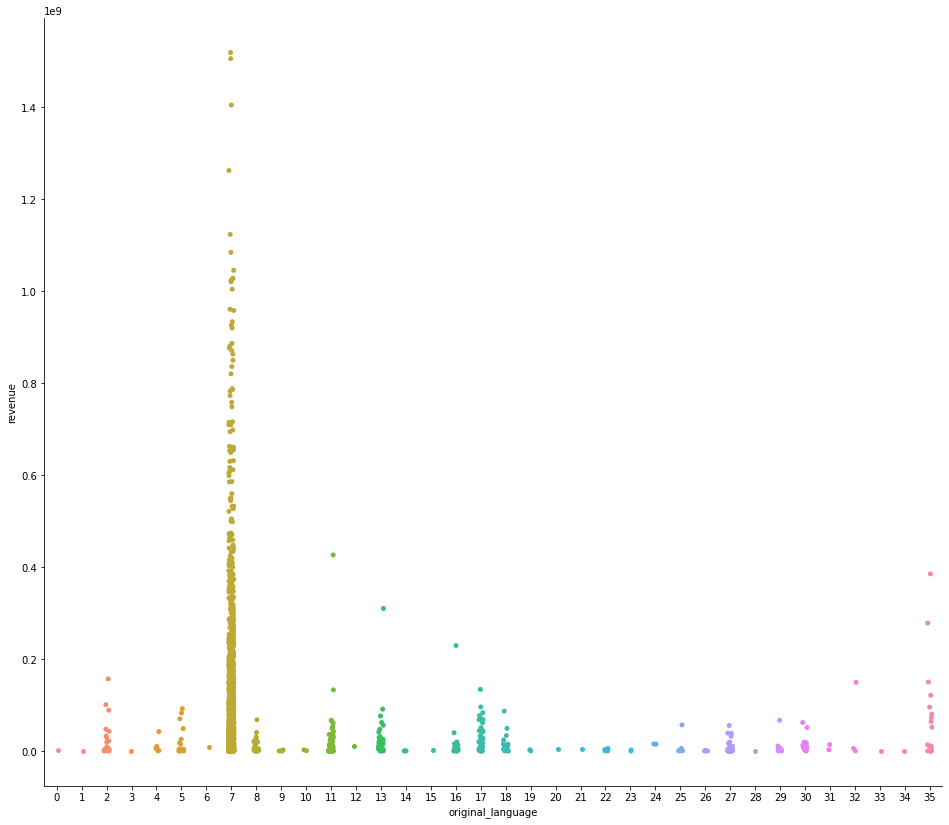

In [90]:
'''Making a catplot to visualize the relation between original language and revenue'''
g = sns.catplot(x="original_language",y="revenue",data=train)
g.fig.set_figwidth(15)
g.fig.set_figheight(13)

><h2><b>Original Title</b></h2>
    
The original title of a movie. Title & Original title may differ, if the original title is not in English. It is of great imoprtance since it is pracitcally the first glimpse into the plot/storyline of the movie. It may have significant impact on the revenue since it is what actually leads the viewer to engage in buying tickets etc.
        
Let us perform data exploration on <code>original title</code>

In [91]:
'''Data Exploration: original_title'''
print("----- ORIGINAL TITLE OF FIRST 10 RECORDS -----")
print(train['original_title'][:10])

----- ORIGINAL TITLE OF FIRST 10 RECORDS -----
0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                        마린보이
5      Pinocchio and the Emperor of the Night
6                              The Possession
7                                Control Room
8                      Muppet Treasure Island
9                               A Mighty Wind
Name: original_title, dtype: object


Let us perform visualisation to see which are some of the most popular words which occur in titles

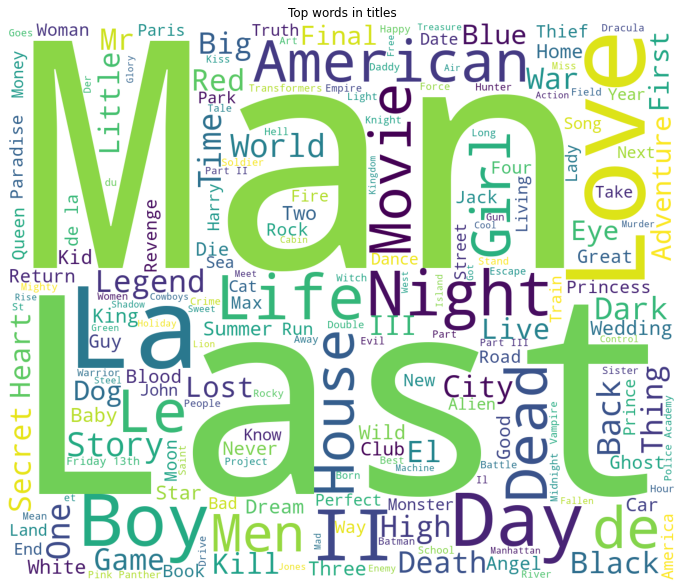

In [92]:
'''Generating a word cloud to check the most commonly occuring words in the original title'''
plt.figure(figsize = (12, 12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

It may also be noteworthy to store whether the <code>title</code> is the same as the <code>original_title</code> of the film.

In [93]:
'''Creaating a colum bool_original_equals_title which stores whether the original title equals the title'''

train['bool_original_equals_title'] = 0
train.loc[train.original_title==train.title, 'bool_original_equals_title'] = 1

'''For Test'''

test['bool_original_equals_title'] = 0
test.loc[test.original_title==test.title, 'bool_original_equals_title'] = 1

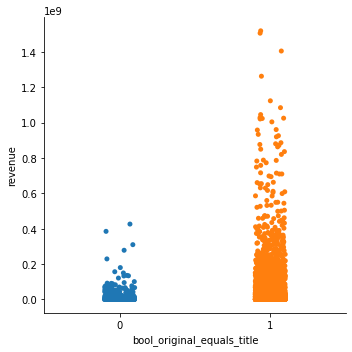

In [94]:
'''Making a catplot to visualize the corelation between bool_original_equals_title and revenue'''
sns.catplot(x="bool_original_equals_title",y="revenue",data=train)

It can be infered that in the cases where the <code>original_title</code> is not equal to the <code>title</code> i.e. the title not being in english, the reveneues generated are considerably less thsn it's counterpart. This may be because the original title being in scripts other than english may create accesibilty issues and lead to lesses viewe engagement on a global scale.

In [95]:
'''Dropping the columns'''

train.drop(["original_title"],axis=1,inplace=True)
test.drop(["original_title"],axis=1,inplace=True)

><h2><b>Release Date</b></h2>

Release date of a movie in mm/dd/yy format. It can be particularly useful in driving the revenues of the film, since trends based on the general public's work routine etc, can be used to determine the best day of the week, month, etc to be chosen to maximize revenue
        
Let us perform data exploration on <code>release date</code>

In [96]:
'''Data Exploration: release_date'''
print("----- RELEASE DATE OF FIRST 10 RECORDS -----")
print(train['release_date'][:10])

----- RELEASE DATE OF FIRST 10 RECORDS -----
0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
5      8/6/87
6     8/30/12
7     1/15/04
8     2/16/96
9     4/16/03
Name: release_date, dtype: object


As can be seen, the release date is in <code>DD/MM/YY</code> format, which needs to be changed in order to extract the Month, Day, and Year individually in order to perform analyses. 
We will create 3 new columns, <code>release_year</code>, <code>release_month</code>, <code>release_date</code>

For the purpose of the <b>Interim Prototype only</b>, we will fill in the <code>null values</code> in the set as <code>05/01/2000</code>. Later on, this will be corrected using the IMDpy API, and other external datasets

In [97]:
'''Converting to accesbile format, Generating the new columns'''
#TRAIN SET
train.loc[train.release_date.isnull(), 'release_date'] = '05/01/2000'

train['release_year'] = train.release_date.str.extract('\S+/\S+/(\S+)', expand=False).astype(np.int16)
train['release_month'] = train.release_date.str.extract('(\S+)/\S+/\S+', expand=False).astype(np.int16)
train['release_day'] = train.release_date.str.extract('\S+/(\S+)/\S+', expand=False).astype(np.int16)

#calculating whethter the year is 1900's or 2000's
train.loc[(21 <= train.release_year) & (train.release_year <= 99), 'release_year'] += 1900
train.loc[train.release_year < 21, 'release_year'] += 2000

#TEST SET
test.loc[test.release_date.isnull(), 'release_date'] = '05/01/2000'

test['release_year'] = test.release_date.str.extract('\S+/\S+/(\S+)', expand=False).astype(np.int16)
test['release_month'] = test.release_date.str.extract('(\S+)/\S+/\S+', expand=False).astype(np.int16)
test['release_day'] = test.release_date.str.extract('\S+/(\S+)/\S+', expand=False).astype(np.int16)

#calculating whethter the year is 1900's or 2000's
test.loc[(21 <= test.release_year) & (test.release_year <= 99), 'release_year'] += 1900
test.loc[test.release_year < 21, 'release_year'] += 2000

We can also create columns to check if the release was on a weekend, i.e. <code>bool_release_weekend</code>
and the quarter of the year, in which the release was made, i.e. <code>release_quarter</code>

In [98]:
'''Creating the columns for weekday release, and the release quarter'''
#Train Set
#First we convert the release date to the format 'DD-MM-YYYY'
train['release_date'] = pd.to_datetime(train.release_day.astype(str) + '-' + 
                                         train.release_month.astype(str) + '-' + 
                                         train.release_year.astype(str))
#Then, the quarter and the weekday property can be easily extracted. 
train['bool_release_weekend'] = 0
train.loc[train.release_date.dt.weekday > 4, 'bool_release_weekend'] = 1
train['release_quarter'] = train.release_date.dt.quarter

#Test Set
#First we convert the release date to the format 'DD-MM-YYYY'
test['release_date'] = pd.to_datetime(test.release_day.astype(str) + '-' + 
                                         test.release_month.astype(str) + '-' + 
                                         test.release_year.astype(str))
#Then, the quarter and the weekday property can be easily extracted. 
test['bool_release_weekend'] = 0 
test.loc[test.release_date.dt.weekday > 4, 'bool_release_weekend'] = 1
test['release_quarter'] = test.release_date.dt.quarter

In [99]:
'''Checking if the given changes have been implemented'''
train.head()

,id,budget,genres,imdb_id,original_language,popularity,poster_path,production_companies,production_countries,release_date,...,cast_gender2,num_genres,bool_homepage,bool_original_language_en,bool_original_equals_title,release_year,release_month,release_day,bool_release_weekend,release_quarter
0,1,14000000,305,tt2637294,7,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,1939,277,2015-02-20,...,10,1,0,1,1,2015,2,20,0,1
1,2,40000000,330,tt0368933,7,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2352,277,2004-06-08,...,10,4,0,1,1,2004,8,6,0,2
2,3,3300000,435,tt2582802,7,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,647,277,2014-10-10,...,13,1,1,1,1,2014,10,10,0,4
3,4,1200000,486,tt1821480,13,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,201,2012-09-03,...,2,2,1,0,1,2012,3,9,0,3
4,5,0,194,tt1380152,18,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,263,2009-05-02,...,4,2,0,0,0,2009,2,5,1,2


Lets firstly plot the <code>Mean Revenue vs Year</code>

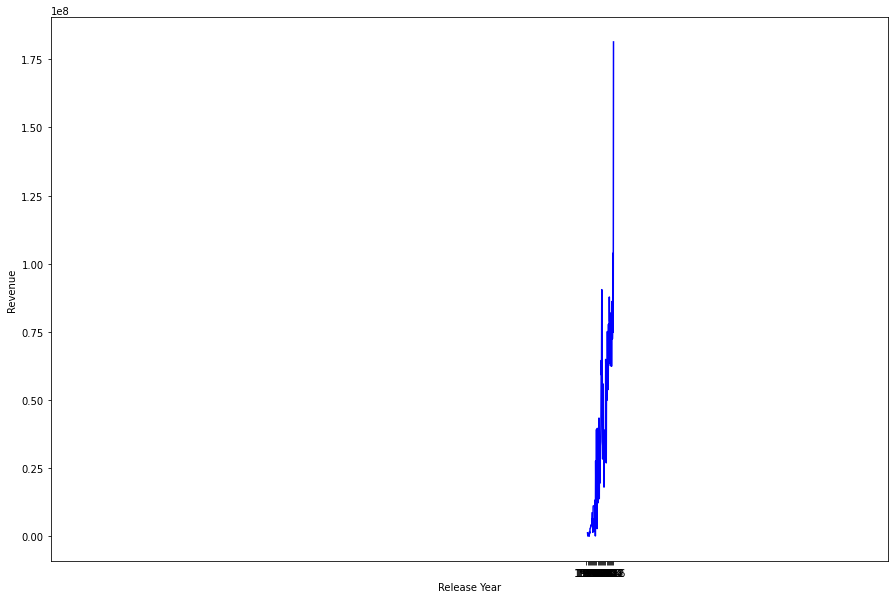

In [100]:
'''Mean Revenue vs Year Plot'''
#trainset
#This step is only implemented on the train set and not the test set because, the test set as such does not
#contain any 'revenue' feature, 
#This will be duly dealt with ahead, and is just done for the data visualisation purpose
train['mean_revenue_yearly'] = train.groupby("release_year")["revenue"].aggregate('mean')

#plot
train['mean_revenue_yearly'].plot(figsize=(15,10),color="b")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.show()

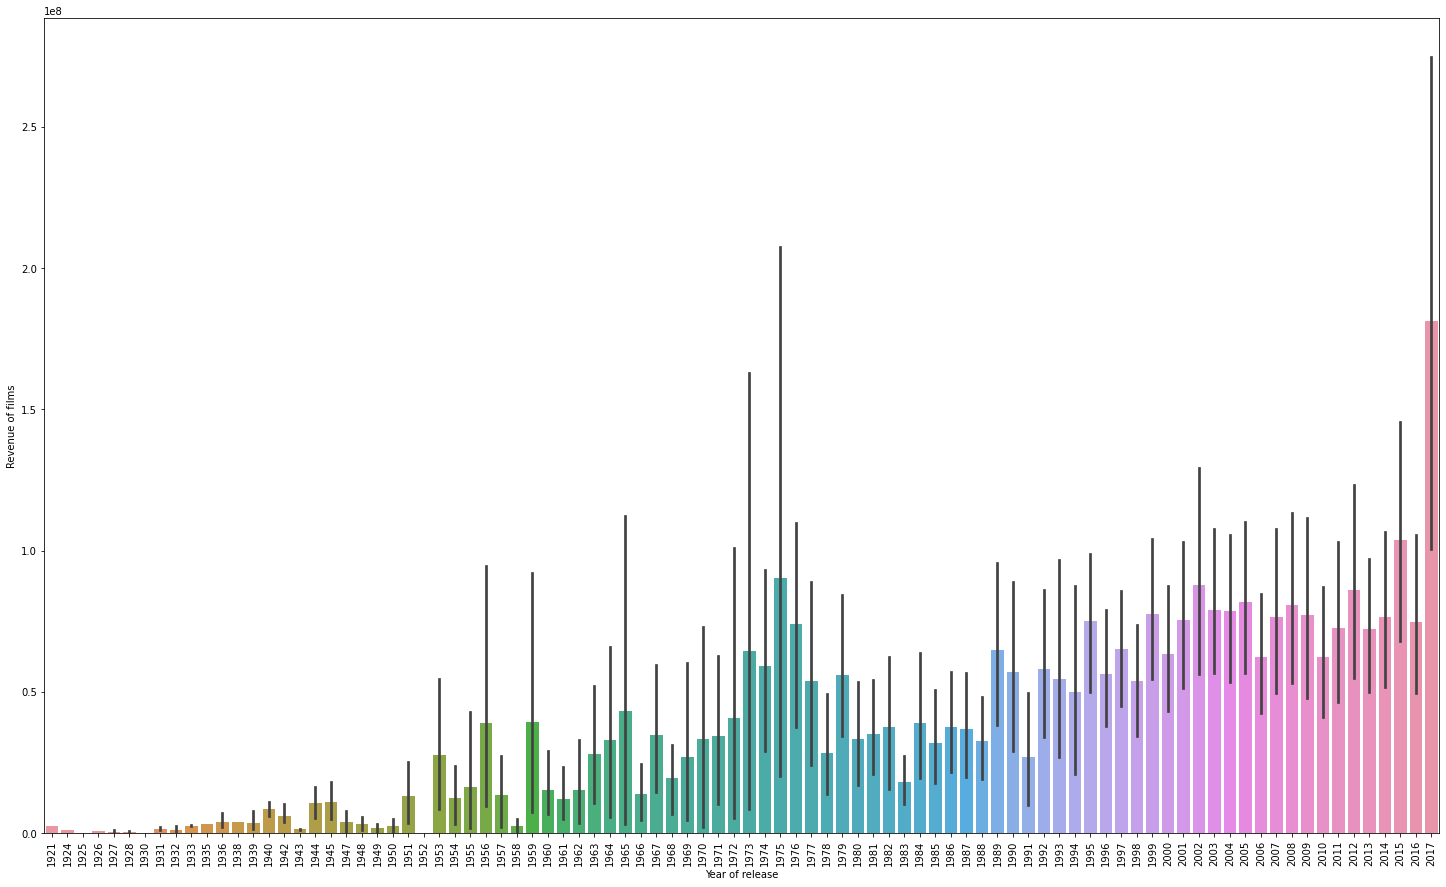

In [101]:
'''Making a barplot to visualize the correlation between release year and revenue'''
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=train["release_year"], y=train["revenue"], ax=ax)
fig.set(ylabel='Revenue of films', xlabel='Year of release')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

The shows an overall increasing trend in the revenue for each year following 1920

Next, lets plot the <code>Mean Revenue vs Month</code>

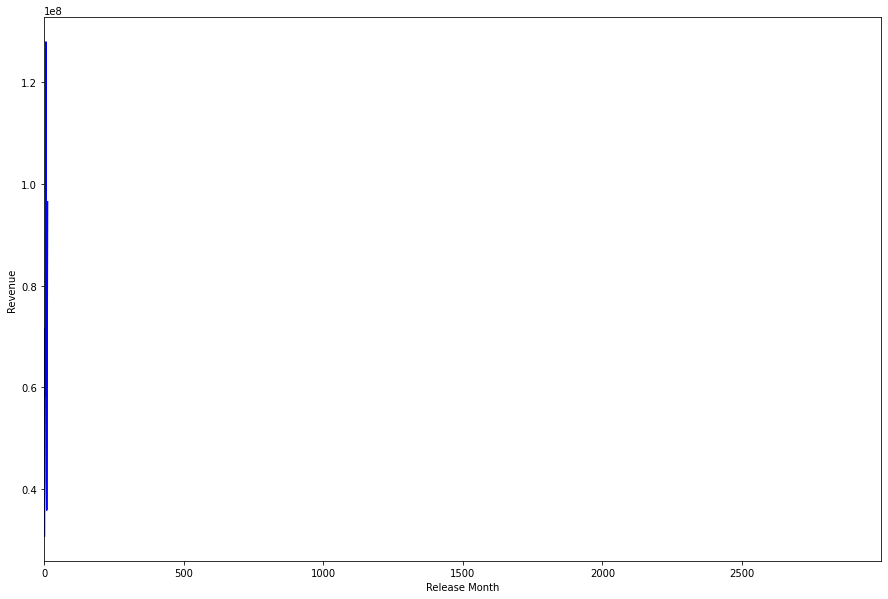

In [102]:
'''Mean Revenue vs Month Plot'''
#trainset
#This step is only implemented on the train set and not the test set because, the test set as such does not
#contain any 'revenue' feature, 
#This will be duly dealt with ahead, and is just done for the data visualisation purpose
train['mean_revenue_monthly'] = train.groupby("release_month")["revenue"].aggregate('mean')


#plot
train['mean_revenue_monthly'].plot(figsize=(15,10),color="b")
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.show()

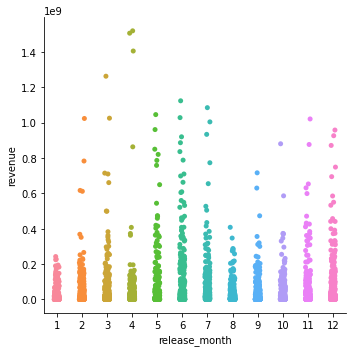

In [103]:
'''Making a catplot to visualize the relation between month and revenue'''
sns.catplot(x="release_month",y="revenue",data=train)

The general trend is that the average revenue is highest in <code>June</code>, and is generally decreasing on both sides after. 


Next, lets plot the <code>Mean Revenue vs Quarter</code>


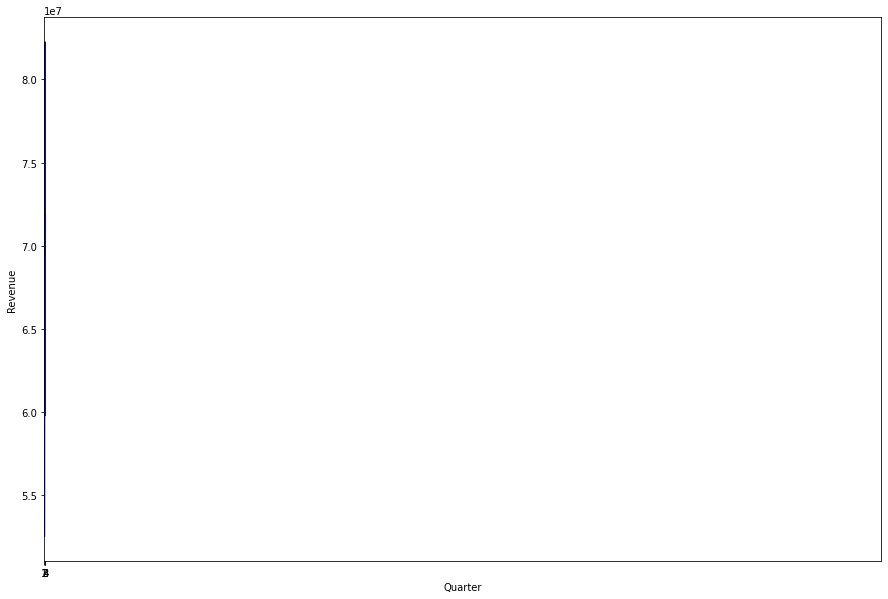

In [104]:
'''Mean Revenue vs Quarter Plot'''
#trainset
#This step is only implemented on the train set and not the test set because, the test set as such does not
#contain any 'revenue' feature, 
#This will be duly dealt with ahead, and is just done for the data visualisation purpose
train['mean_revenue_quarter'] = train.groupby("release_quarter")["revenue"].aggregate('mean')

#plot
train['mean_revenue_quarter'].plot(figsize=(15,10),color="b")
plt.xticks(np.arange(1,5,1))
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.show()

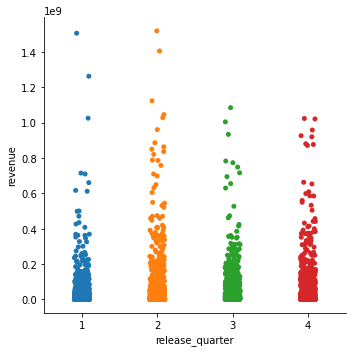

In [105]:
'''Making a catplot to visulaise the corellation'''
sns.catplot(x="release_quarter",y="revenue",data=train)

The general trend is that the revenue is highest in the <code>Second Quarter</code>.

Next, lets analyse the correlation between <code>Mean Revenue</code> and <code>Weekday/Weekend</code>

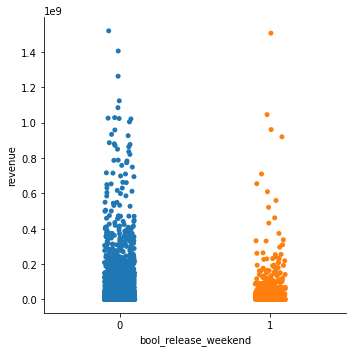

In [106]:
'''Making a catplot to visulaise the corellation'''
sns.catplot(x="bool_release_weekend",y="revenue",data=train)

Now, lets drop all the unnecessary revenue features.

In [108]:
'''Dropping the columns'''

train.drop(['release_date','mean_revenue_yearly', 'mean_revenue_monthly', 'mean_revenue_quarter'], axis=1, inplace=True)
test.drop(['release_date'],axis=1,inplace=True)

><h2><b>Runtime</b></h2>

The duration of the film, in minutes. It can be particularly useful in sustaining revenues, since films with moderate runtimes, tend to be more engaging, than films which are either too short in durtion, thus not giving value for money to th eview, or too long, thus leading to boredom and dissatisfaction. This factor is mainly reflected in filmreviws, word-of-mouth publicity etc.
        
Let us perform data exploration on <code>runtime</code>

In [109]:
'''Data Exploration: runtime'''
print("----- RUNTIME OF FIRST 10 RECORDS -----")
print(train['runtime'][:10])

----- RUNTIME OF FIRST 10 RECORDS -----
0     93.0
1    113.0
2    105.0
3    122.0
4    118.0
5     83.0
6     92.0
7     84.0
8    100.0
9     91.0
Name: runtime, dtype: float64


Let us check for any <b>null</b> values in the runtime.

In [110]:
train.loc[train.runtime.isnull(),"title"]  #Visualizing the title of the 2 null values in runtime

1335          Королёв
2302    Happy Weekend
Name: title, dtype: object

In [111]:
"""Cleaning the null values by finding the ground truth"""
"""Source: wikipedia.org"""

train.loc[train.title == "Королёв","runtime"] = 120.0
train.loc[train.title == "Happy Weekend","runtime"] = 90.0

In [112]:
test.loc[test.runtime.isnull(),'title']

243        La caliente niña Julietta
1489     Pancho, el perro millonario
1632         Nunca en horas de clase
3817    Miesten välisiä keskusteluja
Name: title, dtype: object

In [113]:
"""Cleaning the null values by finding the ground truth"""
"""Source: wikipedia.org"""

test.loc[243,'runtime'] = 93.0
test.loc[1489,'runtime'] = 94.0
test.loc[1632,'runtime'] = 100.0
test.loc[3817,'runtime'] = 116.0

In [114]:
"""Fixing runtime values of 0.0 with ground truth values in train"""

train.loc[train.id==391,'runtime'] = 86.0
train.loc[train.id==592,'runtime'] = 90.0
train.loc[train.id==925, 'runtime'] = 86.0
train.loc[train.id==978, 'runtime'] = 93.0
train.loc[train.id==1256, 'runtime'] = 91.0
train.loc[train.id==1542, 'runtime'] = 93.0
train.loc[train.id==1875, 'runtime'] = 122.0
train.loc[train.id==2151, 'runtime'] = 108.0
train.loc[train.id==2499, 'runtime'] = 86.0
train.loc[train.id==2646, 'runtime'] = 90.0
train.loc[train.id==2786, 'runtime'] = 111.0
train.loc[train.id==2866, 'runtime'] = 90.0

"""Fixing runtime values of 0.0 with ground truth values in test"""

test.loc[1073,'runtime'] = 103.0
test.loc[1221,'runtime'] = 93.0
test.loc[1430,'runtime'] = 96.0
test.loc[2519,'runtime'] = 86.0
test.loc[2844,'runtime'] = 83.0
test.loc[2848,'runtime'] = 140.0
test.loc[3209,'runtime'] = 104.0
test.loc[3803,'runtime'] = 145.0
test.loc[4320,'runtime'] = 87.0

While runtime is an important feature in determinig the box office performance of a movie, it's analysis remains fairly straightforward. 

Lets consider the graph of <code>runtime distribution</code> with respect to <code>count, revenue, and popularity</code> 

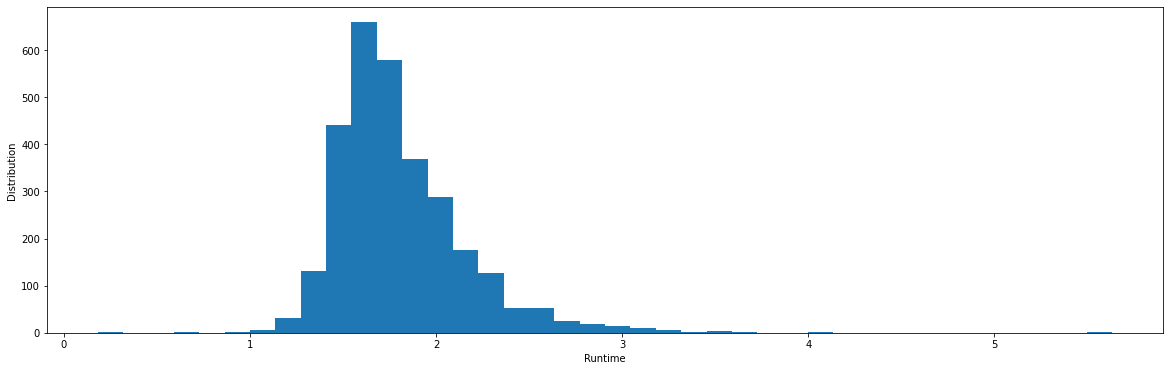

In [115]:
'''Graphing the runtime distribution'''

plt.figure(figsize=(20, 6))
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.xlabel('Runtime')
plt.ylabel('Distribution')
plt.show()

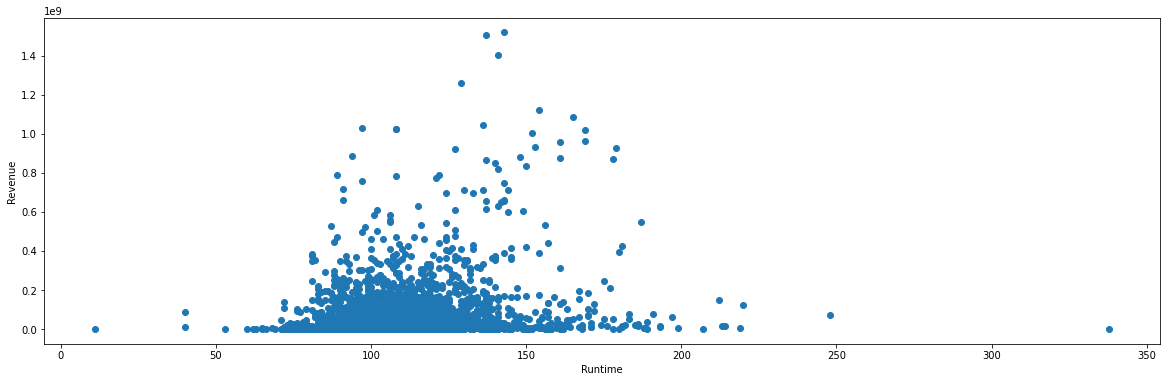

In [116]:
'''Graphing the runtime distribution wrt revenue'''

plt.figure(figsize=(20, 6))
plt.scatter(train['runtime'], train['revenue'])
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

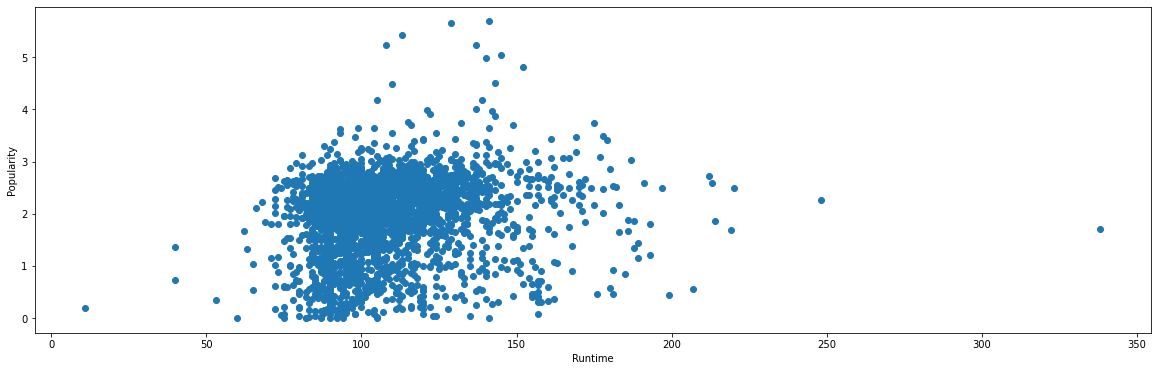

In [117]:
'''Graphing the runtime distribution wrt popularity'''

plt.figure(figsize=(20, 6))
plt.scatter(train['runtime'].fillna(0), train['popularity_log'])
plt.xlabel('Runtime')
plt.ylabel('Popularity')
plt.show()

We can easily infer that the films with runtimes between 90 and 120 are the most popular, and generate the msot revenue as well. 
Let us create a column <code>favorable_runtime</code> to indicate the presence/absence of the above given favorable runtime.

In [118]:
'''Creating a new column bool_favorable_runtime'''

train['bool_favorable_runtime'] = 0
train.loc[np.logical_and(train['runtime']<=140,train['runtime']>=70), 'bool_favorable_runtime'] = 1

'''Test'''

test['bool_favorable_runtime'] = 0
test.loc[np.logical_and(test['runtime']<=140,test['runtime']>= 70), 'bool_favorable_runtime'] = 1

In [119]:
'''Checking if the new column is implemented'''
train.head()

,id,budget,genres,imdb_id,original_language,popularity,poster_path,production_companies,production_countries,runtime,...,num_genres,bool_homepage,bool_original_language_en,bool_original_equals_title,release_year,release_month,release_day,bool_release_weekend,release_quarter,bool_favorable_runtime
0,1,14000000,305,tt2637294,7,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,1939,277,93.0,...,1,0,1,1,2015,2,20,0,1,1
1,2,40000000,330,tt0368933,7,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2352,277,113.0,...,4,0,1,1,2004,8,6,0,2,1
2,3,3300000,435,tt2582802,7,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,647,277,105.0,...,1,1,1,1,2014,10,10,0,4,1
3,4,1200000,486,tt1821480,13,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,201,122.0,...,2,1,0,1,2012,3,9,0,3,1
4,5,0,194,tt1380152,18,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,263,118.0,...,2,0,0,0,2009,2,5,1,2,1


Now we can see the corelation between <code>bool_favorable_runtime and revenue</code>

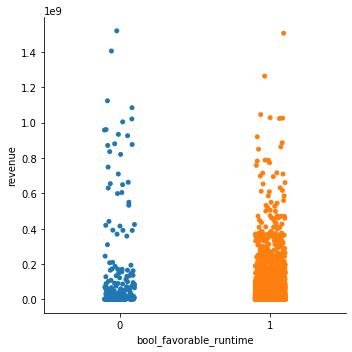

In [120]:
'''Making a catplot to visualize the corelation between favourable runtime and revenue'''
sns.catplot(x="bool_favorable_runtime",y="revenue",data=train)

This graph clearly indicates that a good corelation between revenue and favorable time. 
But, since this binning technique is primitive, more advances binning techniques will be employed in the later stages of this project.

><h2><b>Spoken Languages</b></h2>

Two digit code and full name of the spoken language. Different from the original language, since this constitutes all the languages spoken in the film. 
        
Let us perform data exploration on <code>spoken_languages</code>

In [121]:
'''Data Exploration: spoken_languages'''
train['spoken_languages'][0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

First, let us count the number of spoken languages in each film

In [122]:
'''Filling missing entries with {}'''

train.loc[train["spoken_languages"].isna(),"spoken_languages"] = "{}"
test.loc[test["spoken_languages"].isna(),"spoken_languages"] = "{}"

train["num_spoken_languages"] = train["spoken_languages"].apply(lambda x: x.count("name") if x!="{}" else 0)
test["num_spoken_languages"] = test["spoken_languages"].apply(lambda x: x.count("name") if x!="{}" else 0)

Let us perform some visualisations to better analyse the data

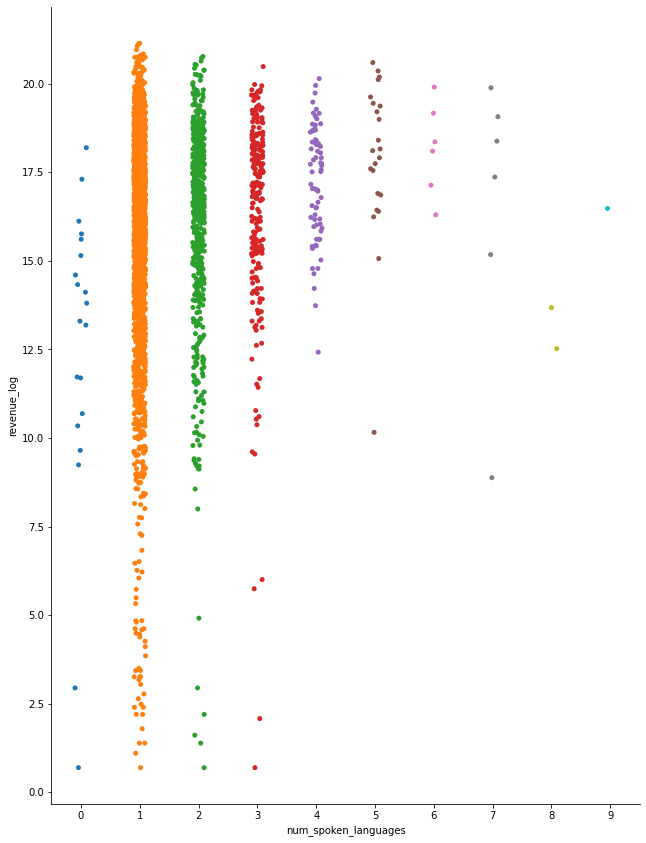

In [123]:
'''Visualizing the corelation between number of spoken languages and revenue'''

g = sns.catplot(x="num_spoken_languages",y="revenue_log",data=train)
g.fig.set_figwidth(10)
g.fig.set_figheight(13)

This graph indicates that films with lower number of spoken languages have higher revenue and vice versa.

Now let us try to isolate the most frequently occuring spoken languages

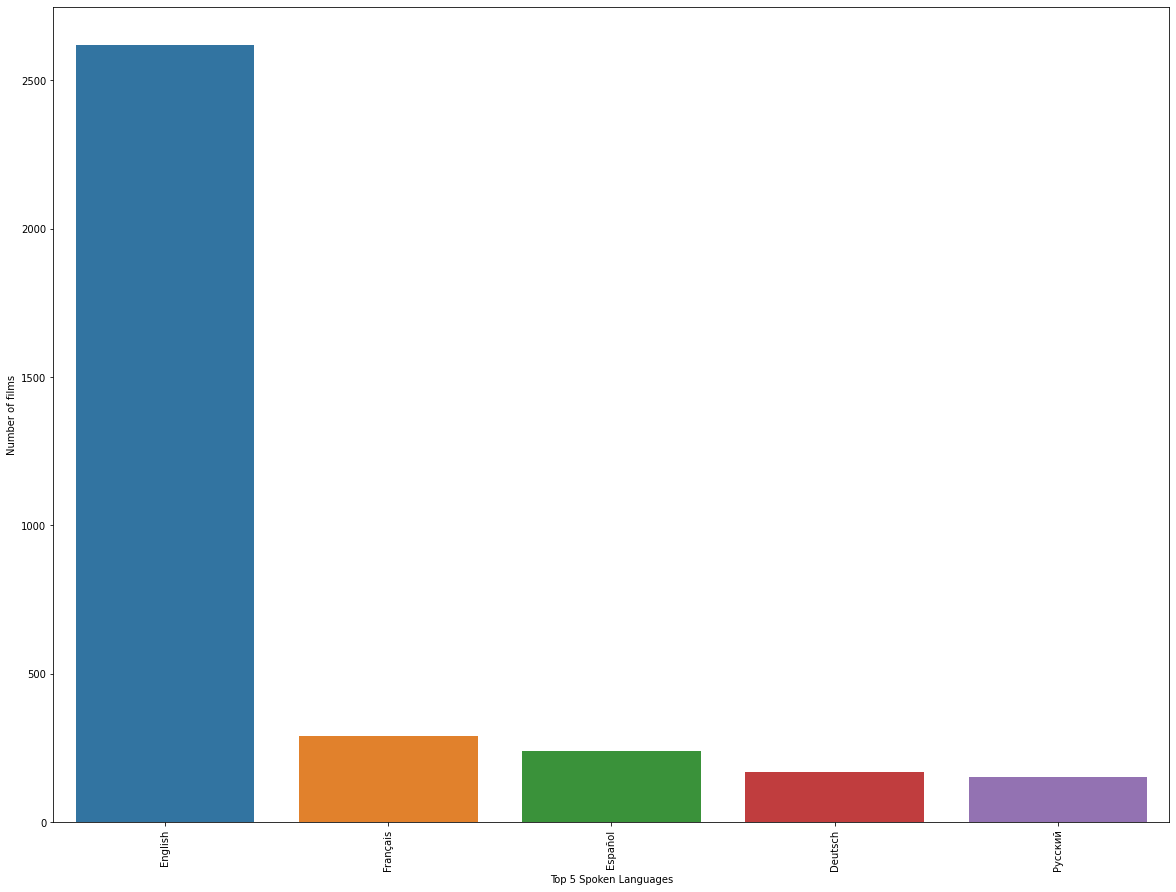

In [124]:
'''Convert entries into list of dictionaries. Store spoken languages in a list, and visualize the top 5 spoken languages associated with films using a Counter'''

castls = []
castls.extend(train["spoken_languages"].apply(lambda x: [i["name"] for i in eval(x)]))
castls=itertools.chain.from_iterable(castls)
c = Counter(list(castls))

'''Bar plot'''
    
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(5)], y=[i[1] for i in c.most_common(5)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 5 Spoken Languages')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

'''We discover that there is a monopoly in terms of spoken languages in the film business. 
The disparity between number of films between the top spoken language is overwhelmingly large.
Hence, it is may prove beneficial to create a seperate column for spoken language english.
We will also store a sorted entry of countries, and label encode it, since similar languages often unite, and this may be a contributor to the film's revenue'''

for i in c.most_common(1):
    train["spoken_languages_"+ str(i[0])] = train["spoken_languages"].apply(lambda x: 1 if i[0] in eval(x) else 0 )

'''For Test'''

castls = []
castls.extend(test["spoken_languages"].apply(lambda x: [i["name"] for i in eval(x)]))
castls=itertools.chain.from_iterable(castls)
c = Counter(list(castls))
for i in c.most_common(1):
    test["spoken_languages_"+ str(i[0])] = test["spoken_languages"].apply(lambda x: 1 if i[0] in eval(x) else 0 )

train["spoken_languages"] = train["spoken_languages"].apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])))
test["spoken_languages"] = test["spoken_languages"].apply(lambda x: "".join(sorted([i["name"] for i in eval(x)])))

'''Label Encoding'''

train["spoken_languages"], test["spoken_languages"] = encoder(train["spoken_languages"], test["spoken_languages"])

><h2><b>Crew</b></h2>

Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.
The crew of a film is one of the most integral part of the entire process. A good crew is a key indicator on the quality of the film, since prestigious directors etc are preceeded by their reputations. Well known producers etc will definitely invest more in the film, thus increasing the chances of higher revenue earned.
    
        
Let us perform data exploration on <code>crew</code>

In [125]:
print(train['crew'][0])  #Visualizing an entry of crew

[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 1451

Now we can see, we have a <code>string which contains list of dictionaries</code> to work with, which will make data extraction, and further exploration & analyses much easier.

First of all, we will count the total number of crew members present in each film, by creating a <code>num_crew</code> column in the Train and Test sets. 

In [126]:
'''Filling missing entries with {}'''

train.loc[train["crew"].isna(),"crew"] = "{}"
test.loc[test["crew"].isna(),"crew"] = "{}"

train["num_crew"] = train["crew"].apply(lambda x: x.count("name") if x!='{}' else 0)
test["num_crew"] = test["crew"].apply(lambda x: x.count("name") if x!='{}' else 0)

In [127]:
'''Checking the created column'''
train.head()

,id,budget,genres,imdb_id,original_language,popularity,poster_path,production_companies,production_countries,runtime,...,bool_original_equals_title,release_year,release_month,release_day,bool_release_weekend,release_quarter,bool_favorable_runtime,num_spoken_languages,spoken_languages_English,num_crew
0,1,14000000,305,tt2637294,7,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,1939,277,93.0,...,1,2015,2,20,0,1,1,1,0,72
1,2,40000000,330,tt0368933,7,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2352,277,113.0,...,1,2004,8,6,0,2,1,1,0,9
2,3,3300000,435,tt2582802,7,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,647,277,105.0,...,1,2014,10,10,0,4,1,1,0,64
3,4,1200000,486,tt1821480,13,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,201,122.0,...,1,2012,3,9,0,3,1,2,0,3
4,5,0,194,tt1380152,18,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,263,118.0,...,0,2009,2,5,1,2,1,1,0,2


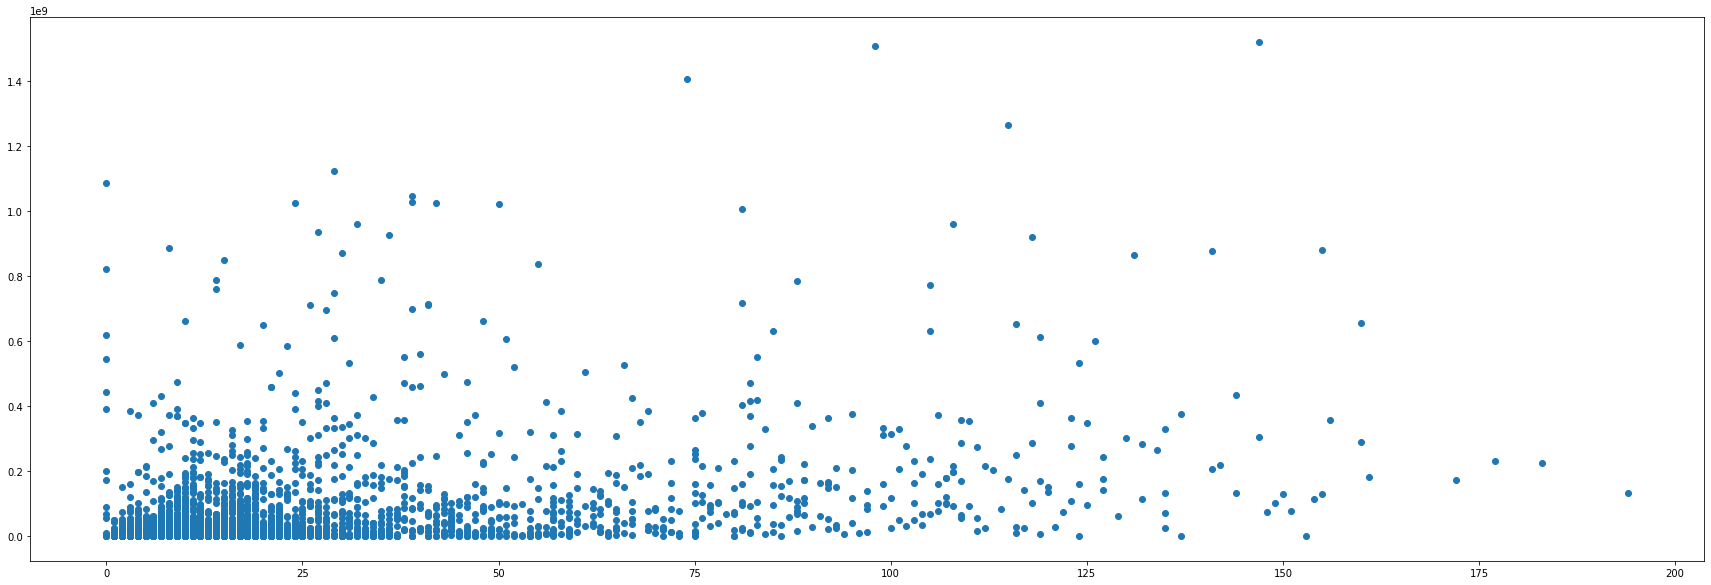

In [128]:
'''Visualize a scatterplot between number of crew and revenue'''

X = train["num_crew"] 
Y = train["revenue"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

In [129]:
X.corr(Y)

0.3706324873661634

From the graph and correlation coefficient, it can be reasonably deduced that number of crew in a film does not necessarily have a significant impact of the revenue. It matters more on the quality of the crew, rather than the quantity.

Let us try to isolate the top crew in the film industry, and create columns to specify their presence and absence.

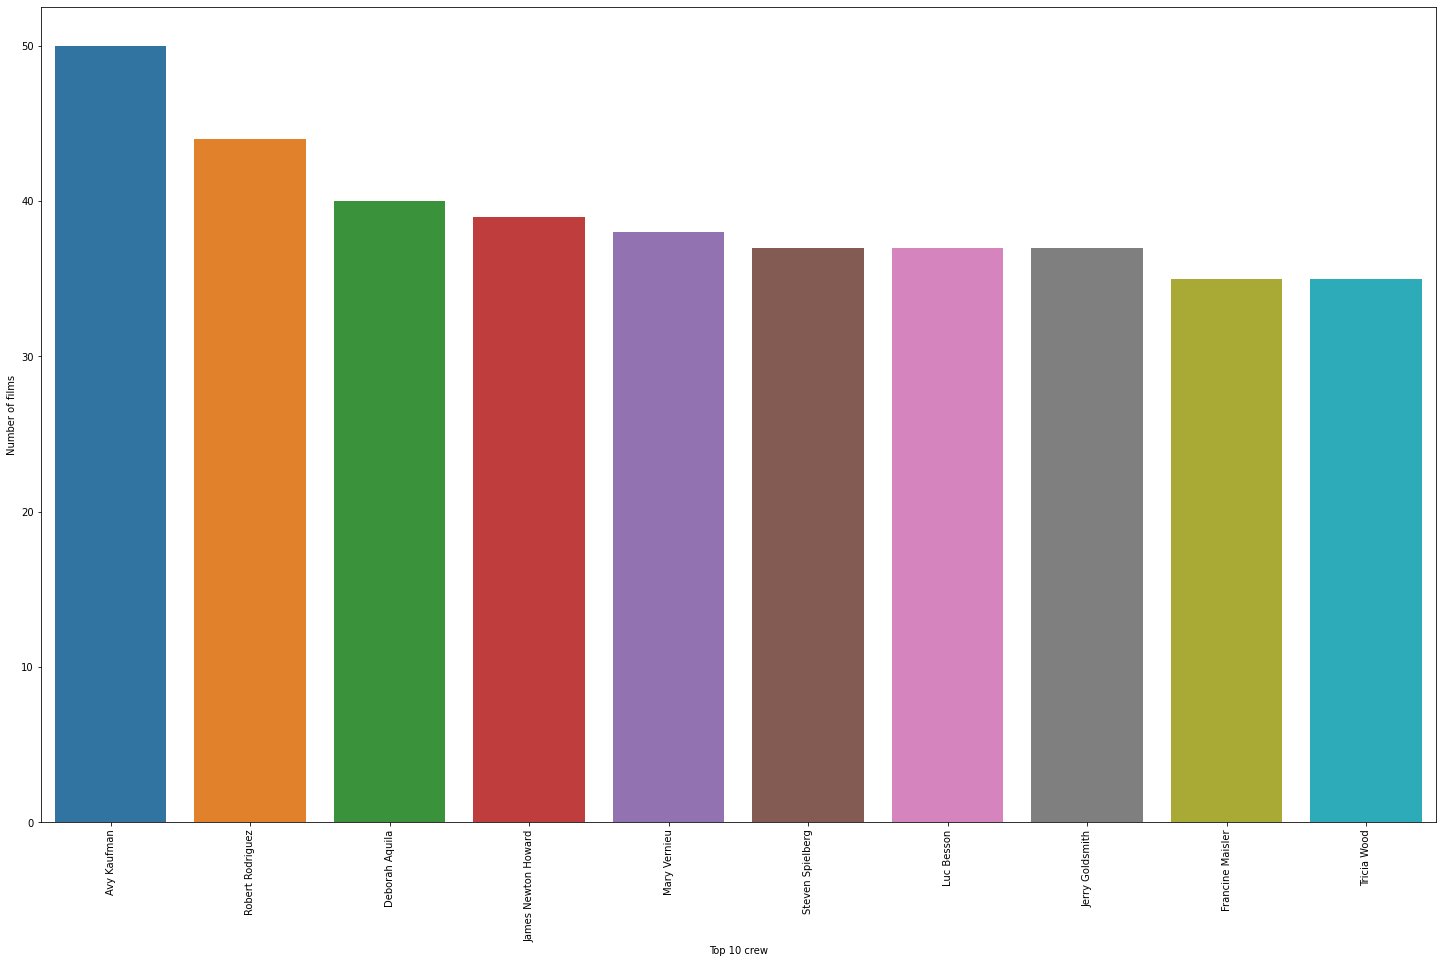

In [130]:
'''Convert entries into list of dictionaries. Store crew members in a list, and visualize the top 10 crew members associated with films using a Counter'''

crewls = []
crewls.extend(train["crew"].apply(lambda x: [i["name"] for i in eval(x)]))
crewls=itertools.chain.from_iterable(crewls)
c = Counter(list(crewls))

'''Bar plot'''
    
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(10)], y=[i[1] for i in c.most_common(10)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 10 crew')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Let us also evaluate the <code>gender</code> for the entire crew and analyse the results

In [131]:
'''Converting string into list of dictionaries, storing genders of crew members in a list, and visualize the top genders'''

genderls = []
genderls.extend(train["crew"].apply(lambda x: [i["gender"] for i in eval(x)]))
genderls=itertools.chain.from_iterable(genderls)
c = Counter(list(genderls))
print(c.most_common())

[(0, 41787), (2, 24898), (1, 6412)]


By studying one of the crew examples,
<ul>
    <li>2 is male</li>
    <li>1 is female</li>
    <li>0 is unknown</li>
</ul>

In [132]:
'''Storing number of crew members associated with each film'''

train["crew_gender0"] = train["crew"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==0]))
train["crew_gender1"] = train["crew"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==1]))
train["crew_gender2"] = train["crew"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==2]))

'''Test data'''

test["crew_gender0"] = test["crew"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==0]))
test["crew_gender1"] = test["crew"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==1]))
test["crew_gender2"] = test["crew"].apply(lambda x: len([0 for i in eval(x) if i["gender"]==2]))

In [133]:
'''Checking the changes implemented'''
train.head()

,id,budget,genres,imdb_id,original_language,popularity,poster_path,production_companies,production_countries,runtime,...,release_day,bool_release_weekend,release_quarter,bool_favorable_runtime,num_spoken_languages,spoken_languages_English,num_crew,crew_gender0,crew_gender1,crew_gender2
0,1,14000000,305,tt2637294,7,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,1939,277,93.0,...,20,0,1,1,1,0,72,59,0,13
1,2,40000000,330,tt0368933,7,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2352,277,113.0,...,6,0,2,1,1,0,9,1,4,4
2,3,3300000,435,tt2582802,7,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,647,277,105.0,...,10,0,4,1,1,0,64,49,4,11
3,4,1200000,486,tt1821480,13,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,201,122.0,...,9,0,3,1,2,0,3,3,0,0
4,5,0,194,tt1380152,18,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,0,263,118.0,...,5,1,2,1,1,0,2,2,0,0


Now lets visualise the correlation between the <code>revenue</code> & <code>gender1 i.e. Male</code>

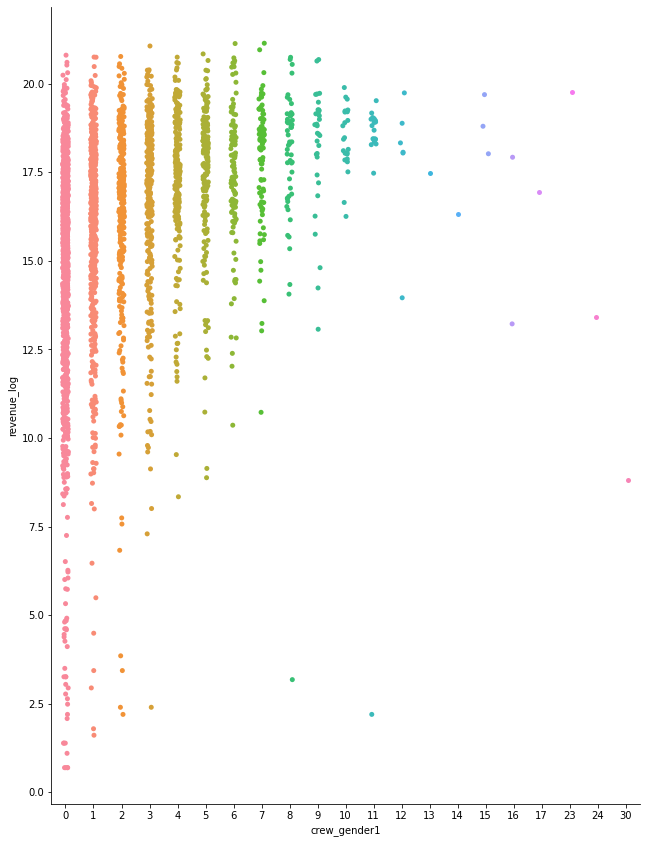

In [134]:
'''Visualization to note the correlation between male crew and gender'''
g = sns.catplot(x="crew_gender1",y="revenue_log",data=train)
g.fig.set_figwidth(10)
g.fig.set_figheight(13)

Now lets visualise the correlation between the <code>revenue</code> & <code>gender2 i.e. Female</code>

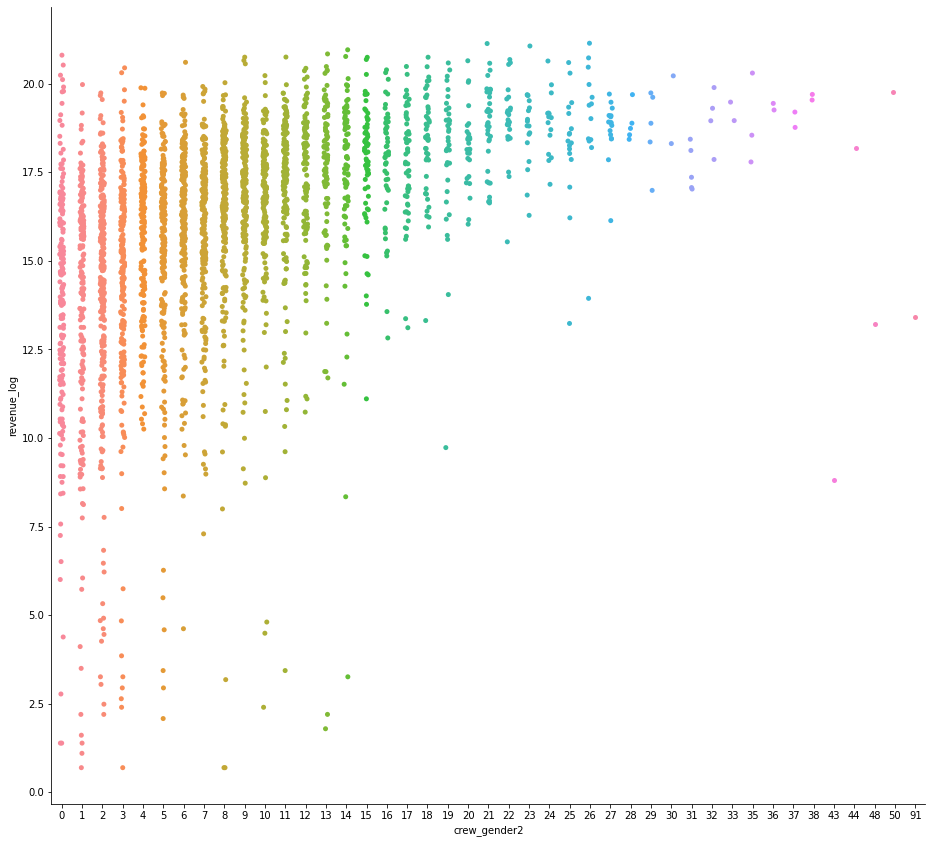

In [135]:
'''Visualization to note the correlation between female crew and revenue'''
g = sns.catplot(x="crew_gender2",y="revenue_log",data=train)
g.fig.set_figwidth(15)
g.fig.set_figheight(13)

Both the catplots show, that as number of females and men increases, the revenue generally tends to increase.

Now let us isloate the <code>top jobs</code> among the crew and perform visualisation to understand their relevance. 

'Although number of producers is overwhelmingly large, producers/directors are required in pretty much every films. Hence, we do not feel it is\nnecessary to create sperate columns for producers and directors'

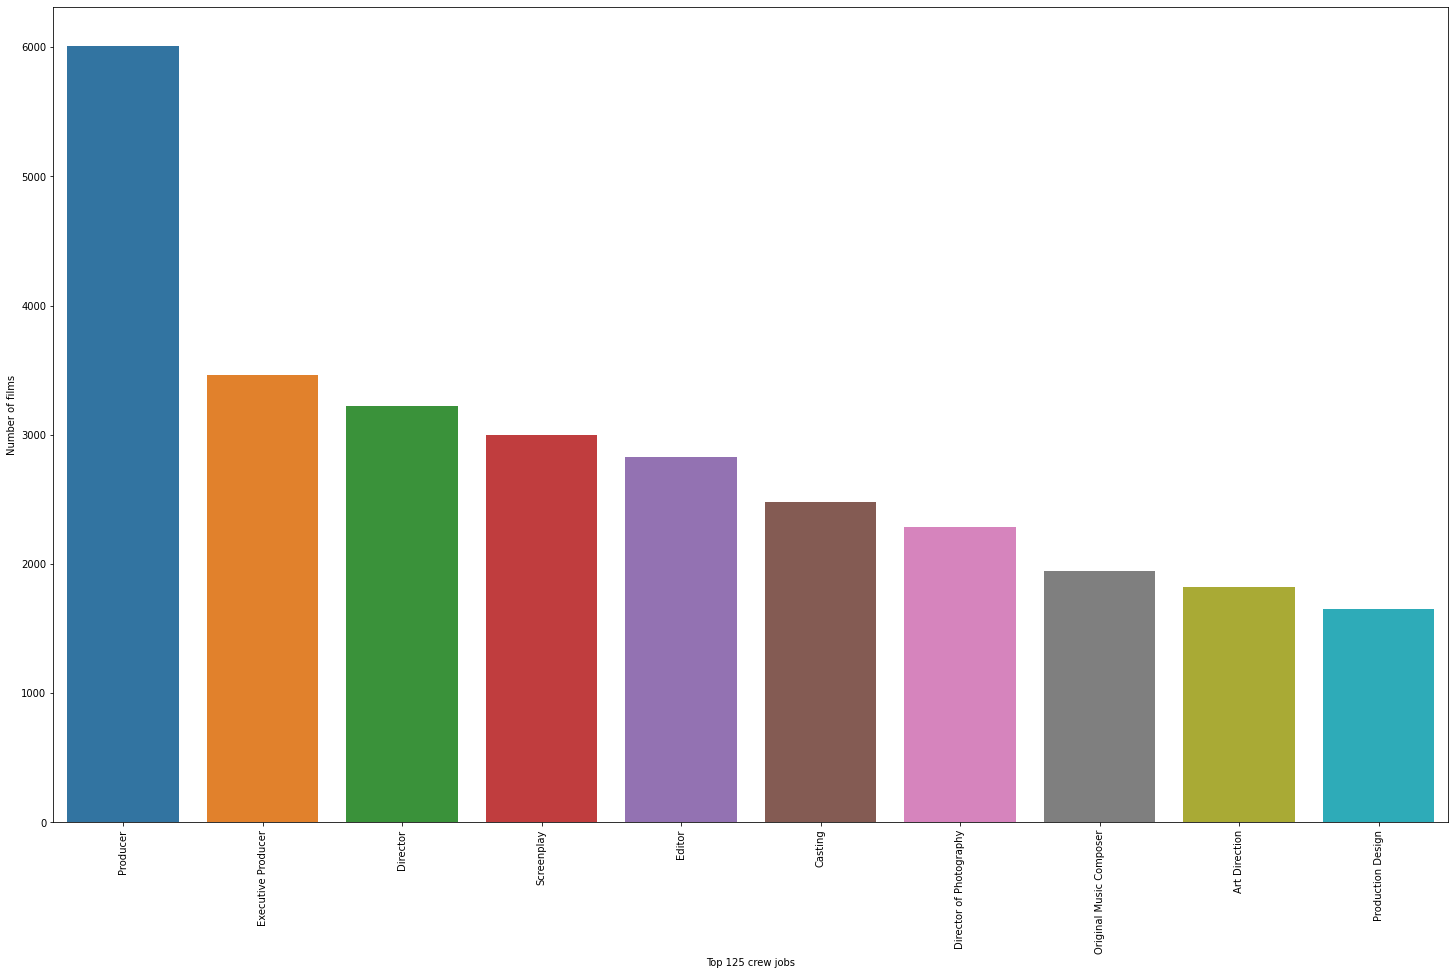

In [136]:
'''Convert entries into list of dictionaries. Store crew jobs in a list, and visualize the top 10 crew jobs associated with films using a Counter'''
crewls = []
crewls.extend(train["crew"].apply(lambda x: [i["job"] for i in eval(x)]))
crewls=itertools.chain.from_iterable(crewls)
c = Counter(list(crewls))

    
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(10)], y=[i[1] for i in c.most_common(10)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 125 crew jobs')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

'''Although number of producers is overwhelmingly large, producers/directors are required in pretty much every films. Hence, we do not feel it is
necessary to create sperate columns for producers and directors'''

Now let us isloate the <code>top jobs</code> among the crew and perform visualisation to understand their relevance.

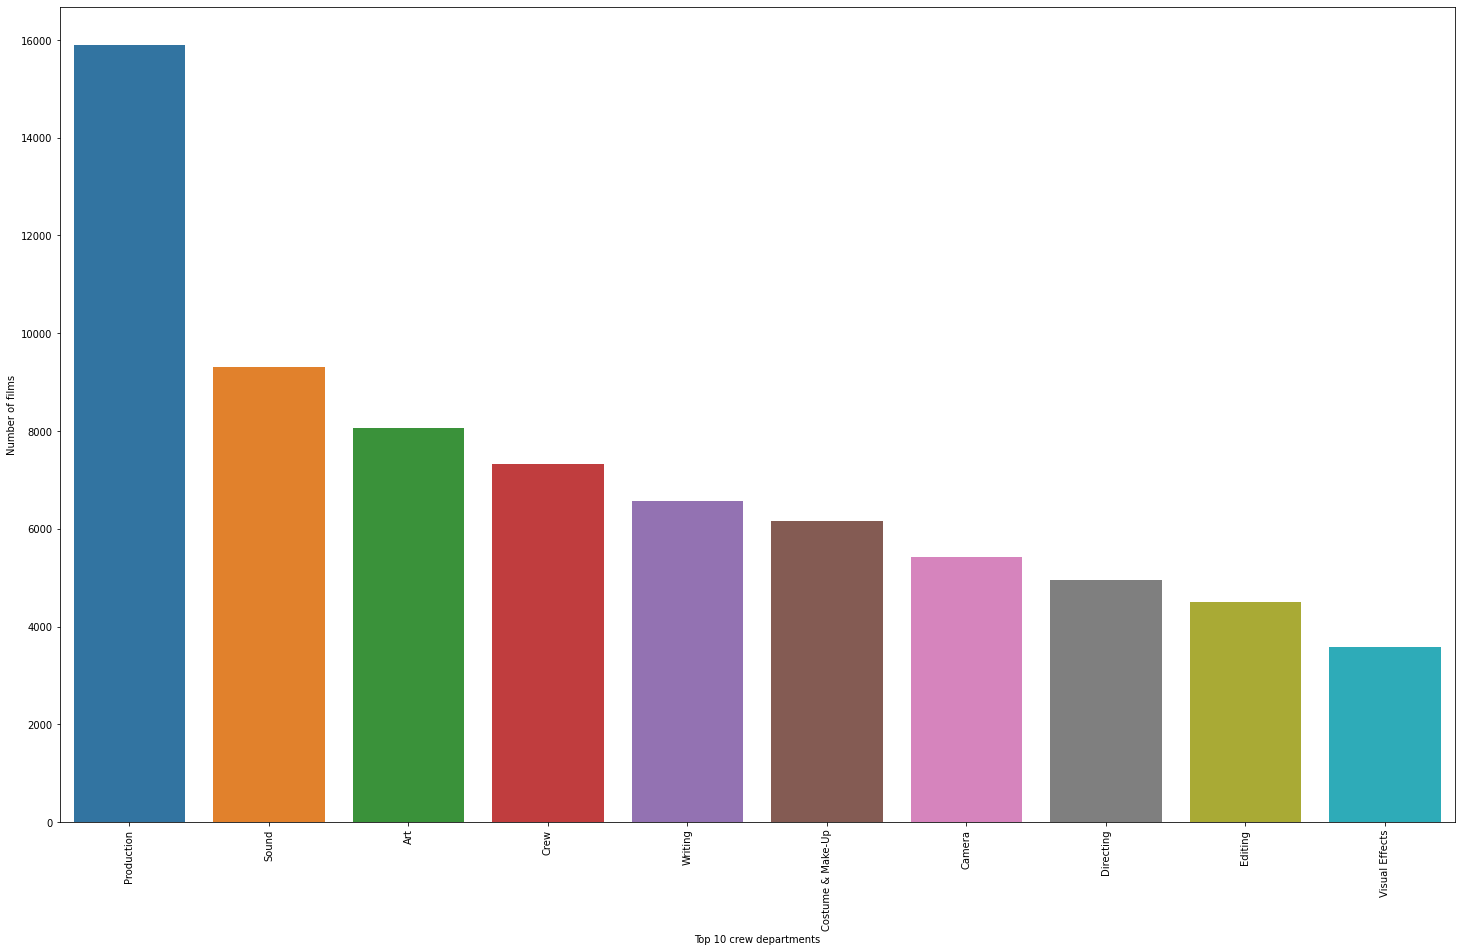

In [137]:
'''Convert entries into list of dictionaries. Store crew departments in a list, and visualize the top 10 crew departments associated with films using a Counter'''

crewls = []
crewls.extend(train["crew"].apply(lambda x: [i["department"] for i in eval(x)]))
crewls=itertools.chain.from_iterable(crewls)
c = Counter(list(crewls))

'''Bar plot'''
    
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=[i[0] for i in c.most_common(10)], y=[i[1] for i in c.most_common(10)], ax=ax)
fig.set(ylabel='Number of films', xlabel='Top 10 crew departments')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

In [138]:
'''Dropping crew'''

train.drop(['crew'], axis=1, inplace=True)
test.drop(['crew'], axis=1, inplace=True)

><h2><b>Title</b></h2>
    Refers to the English title of a movie. Has same relevance as that of original title. In addition to that, it primarily contributes to global engagement of viewers, since most global relaeases of films happen in English, thereby indirectly contributing to the global revenue.
        
Let us perform data exploration on <code>title</code>

In [139]:
train['title'][0]  #Visualizing title

'Hot Tub Time Machine 2'

As we can see, the title is nothing but a string containing the Name of the movie.

Let us count the number of words in the title

In [140]:
'''Calculating number of words in title and length of title'''

train["title_size"] = train["title"].fillna("").apply(lambda x: len(x) if x!="" else 0)
train["title_words"] = train["title"].fillna("").apply(lambda x: len(x.split(" ")) if x!="" else 0)

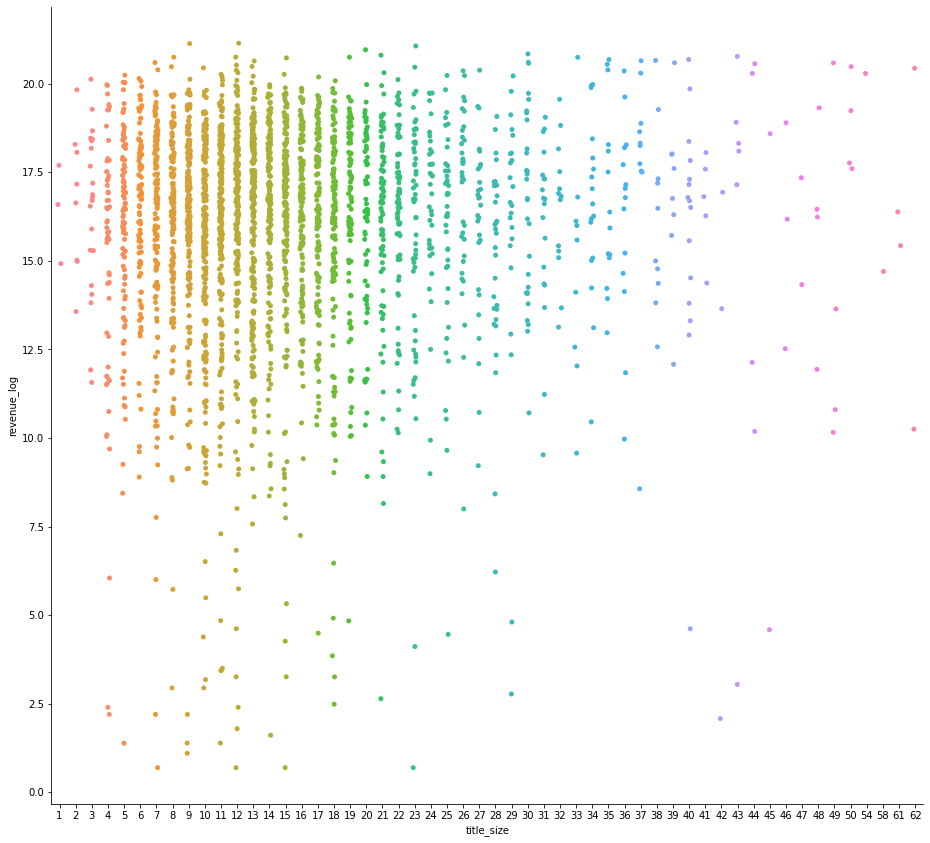

In [141]:
'''Visualization of the correlation between length of title and revenue'''

g = sns.catplot(x="title_size",y="revenue_log",data=train)
g.fig.set_figwidth(15)
g.fig.set_figheight(13)

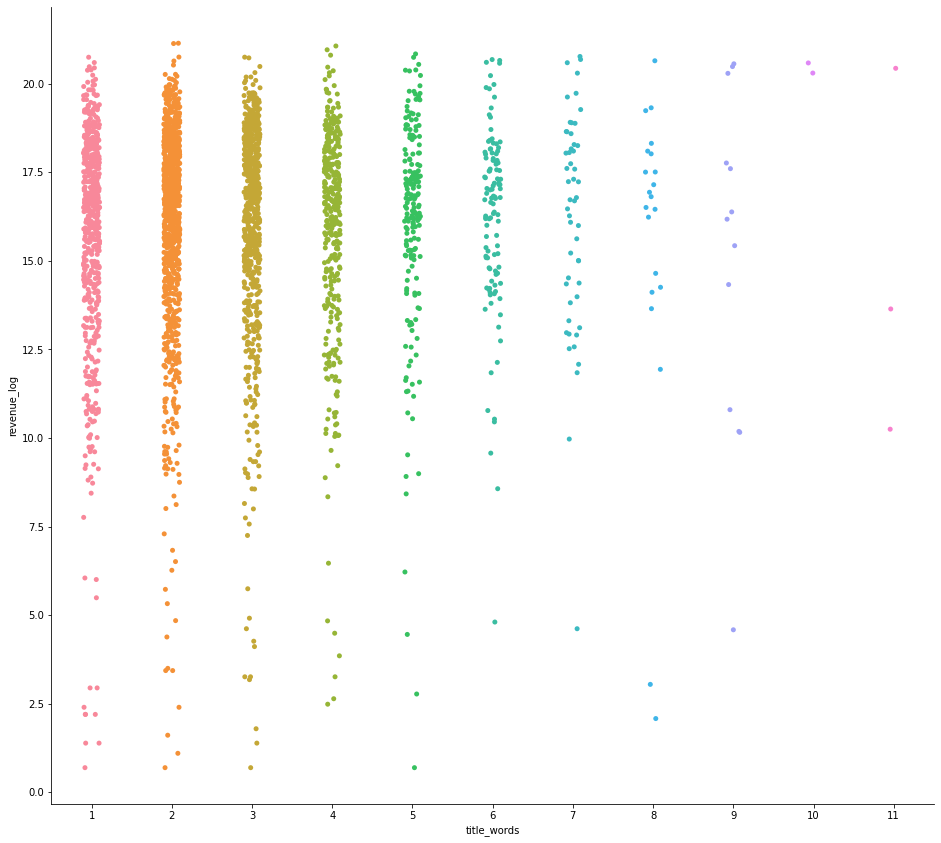

In [142]:
'''Visualization of the correlation between number of words of title and revenue'''

g = sns.catplot(x="title_words",y="revenue_log",data=train)
g.fig.set_figwidth(15)
g.fig.set_figheight(13)

In [143]:
train.drop(["title","title_size"], axis = 1, inplace = True)
test["title_words"] = test["title"].fillna("").apply(lambda x: len(x.split(" ")) if x!="" else 0)
test.drop(['title'], axis=1, inplace = True)

<h2>Revenue:</h2>

In [144]:
train["revenue"]  #Visualizing the revenue of films

0        12314651
1        95149435
2        13092000
3        16000000
4         3923970
          ...    
2995      1596687
2996       180590
2997     89456761
2998    171963386
2999     82087155
Name: revenue, Length: 3000, dtype: int64

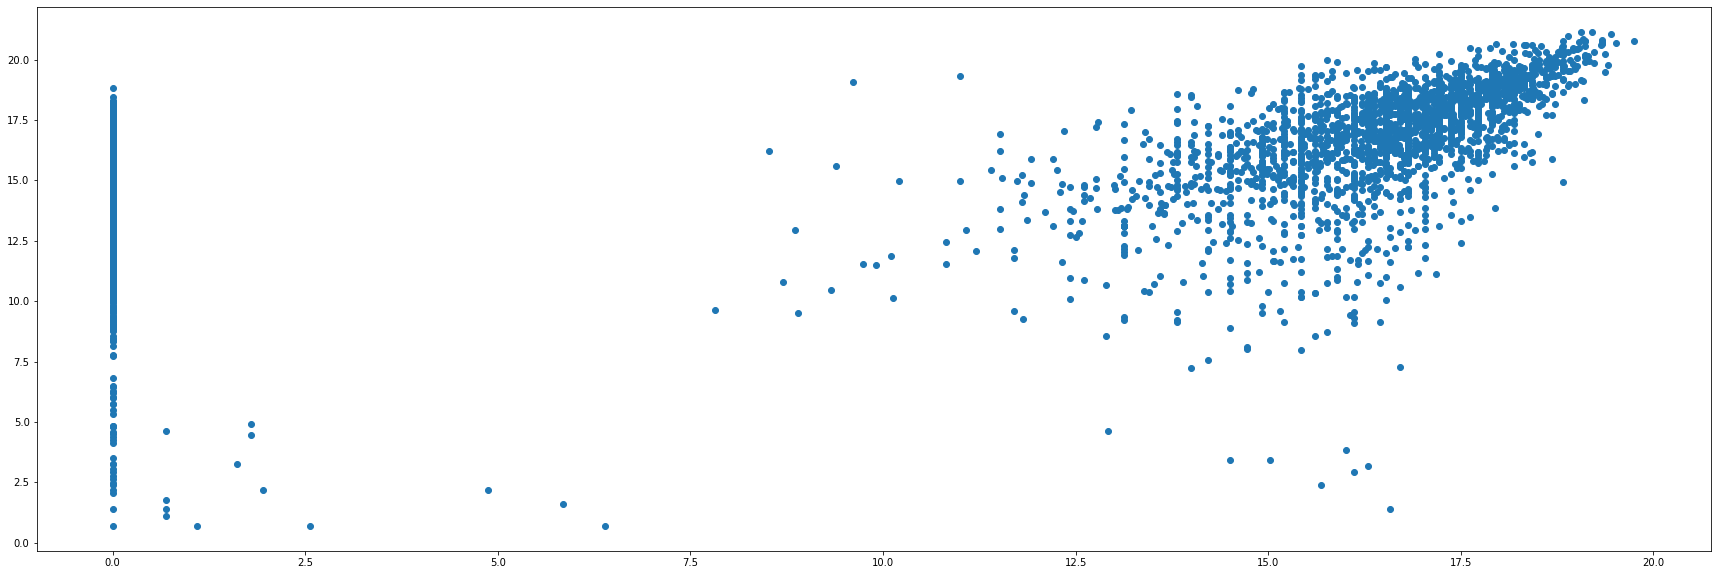

In [145]:
'''Visualization between the budget and the revenue'''

X = train["budget_log"] 
Y = train["revenue_log"]
plt.figure(figsize=(30, 10))
plt.scatter(X,Y)
plt.show()

In the previous section, we encountered that <code>budget</code> contained a lot of 0 values. However, there are a significant number of high budget films, which contain a very small value of revenue. These are potentially mislabelled entries in our dataset, and we should try fixing them in hopes of obtaining a better accuracy.

In [146]:
'''Fixing mislabelled revenue values'''

mislabel = train.id[train.budget > 1000][train.revenue < 100]
for i in mislabel :
    train.loc[train['id'] == i,'revenue'] =  train.loc[train['id'] == i,'revenue'] * 1000000

# 4. Baseline Model and Prediction
The model which we have chosen as our primary model is the <code>RandomForrestRegressor.</code>

><h2><b>RandomForrestRegressor</b></h2>

In Random Forest Regressor, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.
    
    
The purpose of this source of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

Let us drop all the unnecessary columns with respect to model training.

In [147]:
'''Dropping the unnecessary columns and setting our X and Y variables'''

X = train.drop(['id','imdb_id','poster_path','revenue','revenue_log',"budget_log","popularity_log"], axis=1).copy()
Y = train["revenue_log"]

In [148]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)  #Splitting our model into train and validation sets

Let us run a base model to get an idea of how our model is performing

In [149]:
'''Running base model'''

forestmodel = RandomForestRegressor(n_estimators = 10, random_state=42, n_jobs=-1)
forestmodel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

For our box office predictor, we would be measuring our accuracy using <code>Root Mean Squared Error</code>. Root mean squared error (RMSE) is the square root of the mean of the square of all of the error. The use of RMSE is very common, and it is considered an excellent general-purpose error metric for numerical predictions. We are specifically using this method as opposed to other accuracy measures, since it is the same mode of accuracy adopted by <code>Kaggle</code>, and we would like to submit our final test set to Kaggle, in order to get it evaluated.

Since a lower root mean squared error signifies a lower error or lower deviation in our predictions, we would be looking to make our <code>RMSE</code> as low as possible.

In [326]:
'''Visualizing train accuracy and validation accuracy'''

print("Train Accuracy (RMSE): " + str(np.sqrt(mean_squared_error(y_train, forestmodel.predict(x_train)))))
print("Validation Accuracy (RMSE): " + str(np.sqrt(mean_squared_error(y_val, forestmodel.predict(x_val)))))

Train Accuracy (RMSE): 0.9332841723577255
Validation Accuracy (RMSE): 2.1435095150780055


This shows that the root mean square error for the baseline model is around <code>2.14</code>, which shows room for improvement, as many models in Kaggle has a score below <code>2.00</code>

Let us create a graph to visualize the change in the <code>RMSE scores</code> once we add more number of trees:

In [0]:
'''Running models with increasing number of trees'''

train_RMSE=[]
valid_RMSE=[]
num_estimators=[]
for estimators in range(100,1001,100):
    forestmodel = RandomForestRegressor(n_estimators=estimators, random_state=42, n_jobs=-1)
    forestmodel.fit(x_train, y_train)
    train_RMSE.append(np.sqrt(mean_squared_error(y_train, forestmodel.predict(x_train))))
    valid_RMSE.append(np.sqrt(mean_squared_error(y_val, forestmodel.predict(x_val))))
    num_estimators.append(estimators)

Text(0.5, 0, 'No. of Estimators')

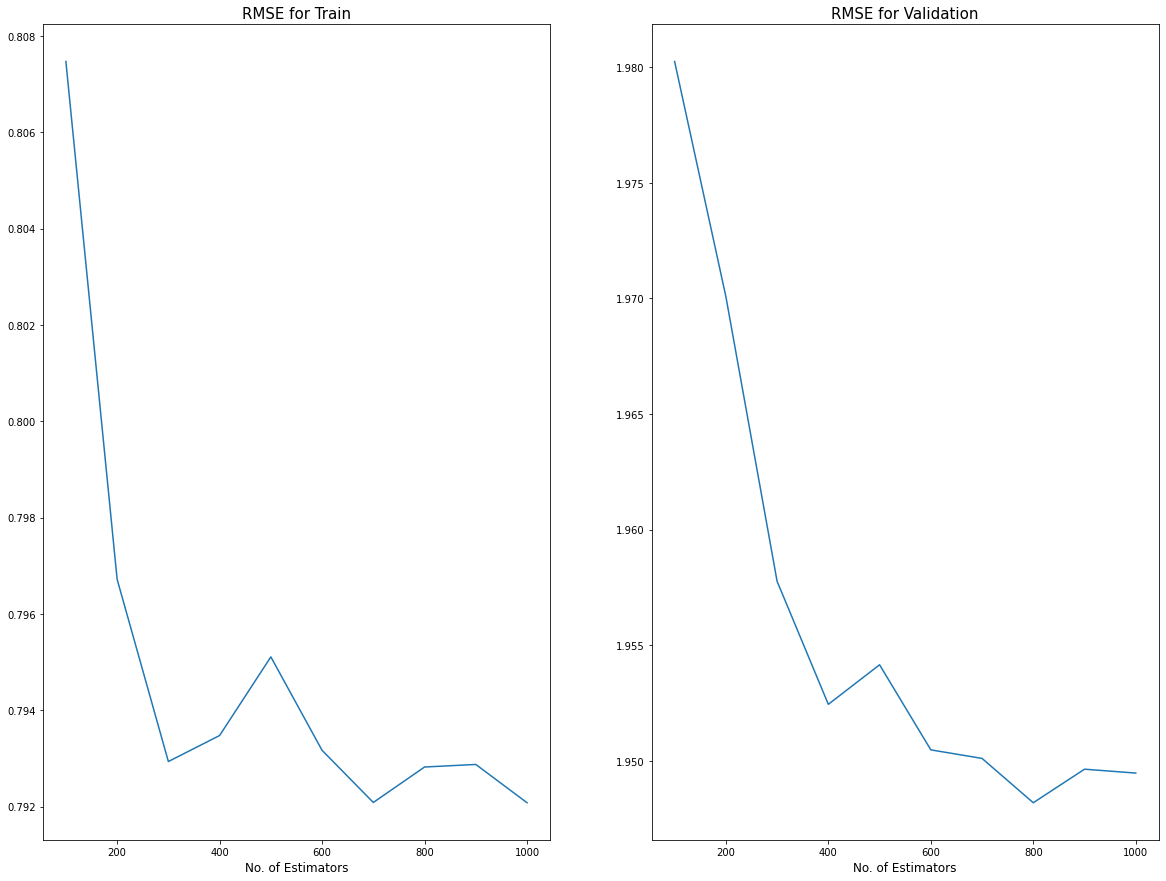

In [328]:
"""Visualizing the results"""

fig = plt.figure(figsize=(20,15))

"""Train RMSE"""

plt.subplot2grid((1,2), (0,0))
plt.plot(num_estimators,train_RMSE)
plt.title('RMSE for Train', fontsize = 15)
plt.xlabel('No. of Estimators', fontsize=12)


"""Validation RMSE"""

plt.subplot2grid((1,2), (0,1))
plt.plot(num_estimators,valid_RMSE)
plt.title('RMSE for Validation', fontsize = 15)
plt.xlabel('No. of Estimators', fontsize=12)


We notice that our RMSE scores are still not converging. Hence, we should train the model for more number of estimators, in order to see some improvement.

Our main concern is to increase accuracy for the <code>RMSE Validation Score</code>. This is because we want our model to perform well for unseen data, and hence, we should tune it to perform the best it possibly can to get an acceptable <code>RMSE Validation Score</code>.

Let us see how our model improves once we run it on <code>n_estimators = 800</code>

In [329]:
forestmodel = RandomForestRegressor(n_estimators=800, oob_score = True, random_state=42, n_jobs=-1)
forestmodel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [330]:
print("Train Accuracy (RMSE): " + str(np.sqrt(mean_squared_error(y_train, forestmodel.predict(x_train)))))
print("Validation Accuracy (RMSE): " + str(np.sqrt(mean_squared_error(y_val, forestmodel.predict(x_val)))))

Train Accuracy (RMSE): 0.7928205028263257
Validation Accuracy (RMSE): 1.9481880895529846


 <code>n_estimators=800</code> gave us the most optimal results, with the <code>Validation Accuracy (RMSE) = 1.94</code>.

<h2>Validation Score Analysis:</h2>
As we can see from our model scores, our <code>Validation Accuracy</code> is much worse than our <code>Train Accuracy</code>. As a result, we should analyze how to improve the potential overfitting of our model.

<h3>Out of Bag Score:</h3>
In the Random Forest model, the original training data is randomly sampled-with-replacement generating small subsets of data. These subsets are also known as bootstrap samples. These bootstrap samples are then fed as training data to many DTs of large depths. Each of these DTs is trained separately on these bootstrap samples. The concluding result of the ensemble model is determined by counting a majority vote from all the DTs. This concept is known as Bagging or Bootstrap Aggregation. Since each DT takes a different set of training data as input, the deviations in the original training dataset do not impact the final result obtained from the aggregation of DTs. Therefore, bagging as a concept reduces variance without changing the bias of the complete ensemble.

The OOB samples are rows which were not included in the bootstrap sample. It serves as a way to validate our training data, and determine whether our model generalizes or not. Only a subset of DTs is used for determining the OOB score. This leads to reducing the overall aggregation effect in bagging.

In [331]:
print("Out of Bag Score: " + str(forestmodel.oob_score_))
print("Validation R2 score: " + str(forestmodel.score(x_val,y_val)))

Out of Bag Score: 0.49776648742310625
Validation R2 score: 0.5589622287917091


R2 Score is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It can be compared with the OOB score to signify overfitting. From above, we can observe both the Validation Score R2 and the OOB score are comparable. This shows that the model is not performing well to unseen data as much, and is overfitting. Let us tune the model parameters to overcome this overfitting and improve our scores.

Before further model tuning, let us visualize the feature importance of the different columns on our model.

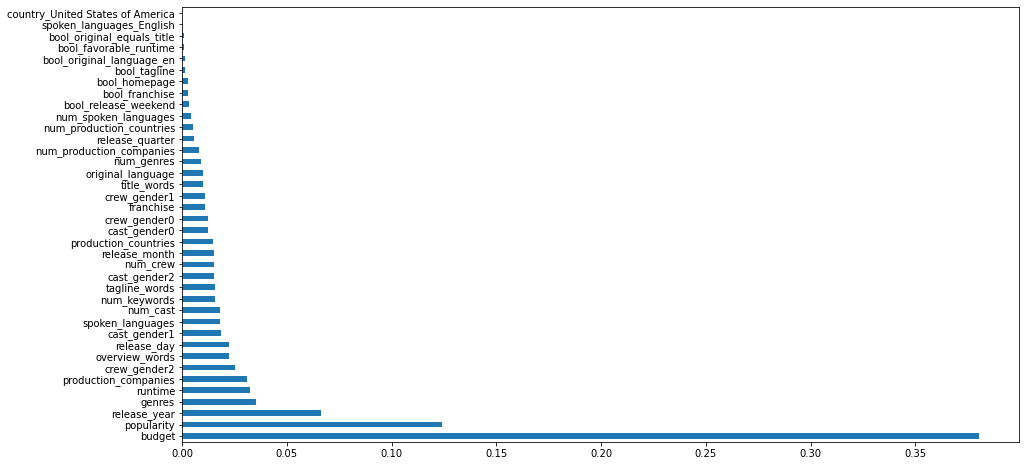

In [332]:
plt.figure(figsize=(15,8))
feat_importances = pd.Series(forestmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')

<code>Budget</code> is a key contributor to our model. Hence, since there are so many 0 budget values, we will try to compute the median budget in order to observe any improvement in the model score.

In [333]:
X["bool_budget"] = X['budget'].apply(lambda x: 1 if x==0 else 0) #Indicating that the budget was originally 0
X['median_yearly_budget'] = X.groupby("release_year")["budget"].transform('median') #Calculating median budget for each year
X.loc[X["budget"]==0,"budget"] = X.loc[X.budget==0,"median_yearly_budget"] #For budget values equal to 0, we calculate median budget for that particular year and set it equal to budget
X.loc[X.budget==0,'budget'] = X[X['budget'] > 0]['budget'].median()  #For budget values which are still 0, we fill it up with the median
X.loc[X.median_yearly_budget==0,"median_yearly_budget"] = X.loc[X.median_yearly_budget==0,"budget"] #For median_yearly_budget which are 0, we fill it up with the corresponding budget
X['inflation_budget'] = X['budget'] + X['budget']*1.8/100*(2018-X['release_year']) #Standard inflation formula 
X

,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,bool_franchise,franchise,overview_words,num_production_companies,num_production_countries,country_United States of America,bool_tagline,tagline_words,num_keywords,num_cast,cast_gender0,cast_gender1,cast_gender2,num_genres,bool_homepage,bool_original_language_en,bool_original_equals_title,release_year,release_month,release_day,bool_release_weekend,release_quarter,bool_favorable_runtime,num_spoken_languages,spoken_languages_English,num_crew,crew_gender0,crew_gender1,crew_gender2,title_words,bool_budget,median_yearly_budget,inflation_budget
0,14000000.0,305,7,6.575393,1939,277,93.0,91,1,152,29,3,1,0,1,11,4,24,6,8,10,1,0,1,1,2015,2,20,0,1,1,1,0,72,59,0,13,5,0,9800000.0,14756000.0
1,40000000.0,330,7,8.248895,2352,277,113.0,91,1,366,69,1,1,0,1,13,4,20,0,10,10,4,0,1,1,2004,8,6,0,2,1,1,0,9,1,4,4,6,0,17820000.0,50080000.0
2,3300000.0,435,7,64.299990,647,277,105.0,91,0,0,21,3,1,0,1,10,12,51,31,7,13,1,1,1,1,2014,10,10,0,4,1,1,0,64,49,4,11,1,0,6500000.0,3537600.0
3,1200000.0,486,13,3.174936,0,201,122.0,225,0,0,106,0,1,0,0,0,7,7,4,1,2,2,1,0,1,2012,3,9,0,3,1,2,0,3,3,0,0,1,0,9000000.0,1329600.0
4,13500000.0,194,18,1.148070,0,263,118.0,302,0,0,32,0,1,0,0,0,0,4,0,0,4,2,0,0,0,2009,2,5,1,2,1,1,0,2,2,0,0,2,1,13500000.0,15687000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10700000.0,385,7,9.853270,1992,277,102.0,91,0,0,42,2,1,0,1,15,19,15,1,3,11,2,0,1,1,1994,4,22,0,2,1,1,0,17,2,1,14,1,1,10700000.0,15322400.0
2996,11000000.0,471,29,3.727996,1410,118,102.0,281,0,0,26,2,2,0,0,0,6,11,9,1,1,2,0,0,0,2013,3,28,0,1,1,1,0,15,10,1,4,4,1,11000000.0,11990000.0
2997,65000000.0,136,7,14.482345,1459,277,120.0,91,0,0,58,3,1,0,1,6,14,15,2,4,9,4,0,1,1,1996,10,11,1,4,1,1,0,10,2,2,6,4,0,25000000.0,90740000.0
2998,42000000.0,385,7,15.725542,1753,277,90.0,91,0,0,55,2,1,0,1,13,22,26,1,9,16,2,1,1,1,2004,1,16,0,1,1,1,0,89,61,10,18,3,0,17820000.0,52584000.0


In [0]:
"""Implement same changes in test dataset"""
test["bool_budget"] = test['budget'].apply(lambda x: 1 if x==0 else 0) #Indicating that the budget was originally 0
test['median_yearly_budget'] = test.groupby("release_year")["budget"].transform('median') #Calculating median budget for each year
test.loc[test["budget"]==0,"budget"] = test.loc[test.budget==0,"median_yearly_budget"] #For budget values equal to 0, we calculate median budget for that particular year and set it equal to budget
test.loc[test.budget==0,'budget'] = test[test['budget'] > 0]['budget'].median()     #For budget values which are still 0, we fill it up with median
test.loc[test.median_yearly_budget==0,"median_yearly_budget"] = test.loc[test.median_yearly_budget==0,"budget"]     #For median_yearly_budget which are 0, we fill it with corresponding budget
test['inflation_budget'] = test['budget'] + test['budget']*1.8/100*(2018-test['release_year']) #Standard inflation formula 

The most significant contributor to our model are as follows:
<ul>
    <li>budget</li>
    <li>popularity</li>
    <li>release_year</li>
    <li>crew_gender2</li>
    <li>runtime</li>
</ul>

Let us try to create new features based on these parameters, and try to observe any new improvements in our model.

In [0]:
X['ratio_budget_runtime'] = X['budget']/X['runtime']   #Ratio of budget and runtime
X['ratio_budget_release_year'] = (X['budget']/X['release_year'])/X['release_year']    #Ratio of budget and release year
X['ratio_release_year_popularity'] = X['release_year']/X['popularity']            #Ratio of release_year and popularity
X['ratio_budget_popularity'] = X['budget'] / X['popularity']            #Ratio of budget and popularity
X['ratio_popularity_mean_yearly_popularity'] = X['popularity'] / X.groupby("release_year")["popularity"].transform('mean')      #Ratio of popularity and mean of popularity
X['ratio_budget_median_yearly_budget'] = X["budget"]/X['median_yearly_budget']        #Ratio of budget and median yearly budget

In [0]:
test['ratio_budget_runtime'] = test['budget']/test['runtime']
test['ratio_budget_release_year'] = (test['budget']/test['release_year'])/test['release_year']
test['ratio_release_year_popularity'] = test['release_year']/test['popularity']
test['ratio_budget_popularity'] = test['budget'] / test['popularity']
test['ratio_popularity_mean_yearly_popularity'] = test['popularity'] / test.groupby("release_year")["popularity"].transform('mean')
test['ratio_budget_median_yearly_budget'] = test["budget"]/test["median_yearly_budget"]

<h3>RandomizedSearchCV:</h3>

Randomized search on hyper parameters. The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings. In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [0]:
'''Randomized Search CV model parameters'''

n_estimators = [int(x) for x in range(1000,3001,500)] #Since we already tried 0 to 1000

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

min_samples_split = [2, 5, 10, 15]

min_samples_leaf = [1, 2, 4, 8, 16]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [341]:
'''Create Random Forest Regressor and run RandomizedSearchCV in order to find ideal model parameters'''
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 79.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 135.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Let us visualize the best params suggested by the RandomizedSearchCV model.

In [355]:
print("======BEST PARAMS======")
rf_random.best_params_

======BEST PARAMS======


{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2000}

Let us input the best params as suggested by the RandomizedSearchCV into our model and visualize the <code>RMSE</code>

In [356]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)
forestmodel = RandomForestRegressor(bootstrap=False,
                                    max_depth = 70,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    random_state=42,
                                    n_estimators = 2000)
forestmodel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [357]:
print("Train Accuracy (RMSE): " + str(np.sqrt(mean_squared_error(y_train, forestmodel.predict(x_train)))))
print("Validation Accuracy (RMSE): " + str(np.sqrt(mean_squared_error(y_val, forestmodel.predict(x_val)))))

Train Accuracy (RMSE): 1.172155530778503e-06
Validation Accuracy (RMSE): 1.9076170131824972


The Validation Accuracy is the lowest we have seen yet.

For curiosity, let us test our model with <code>n_estimators=800</code>, which we did not input in our RandomizedSearchCV model. It gaves us the lowest <code>RMSE</code> score during our base model training.

In [358]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)
forestmodel = RandomForestRegressor(bootstrap=False,
                                    max_depth = 70,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    random_state=42,
                                    n_estimators = 800)
forestmodel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [359]:
print("Train Accuracy (RMSE): " + str(np.sqrt(mean_squared_error(y_train, forestmodel.predict(x_train)))))
print("Validation Accuracy (RMSE): " + str(np.sqrt(mean_squared_error(y_val, forestmodel.predict(x_val)))))

Train Accuracy (RMSE): 1.2342996347894948e-06
Validation Accuracy (RMSE): 1.9036319031709572


Thanks to our initial visualization of the <code>RMSE</code> scores in our base model, we were able to identify 800 as a suitable choice for <code>n_estimators</code>, and hence, applying it gives us the lowest Validation Accuracy.

Let us visualize the feature importances to see how they have changed from the initial stage.

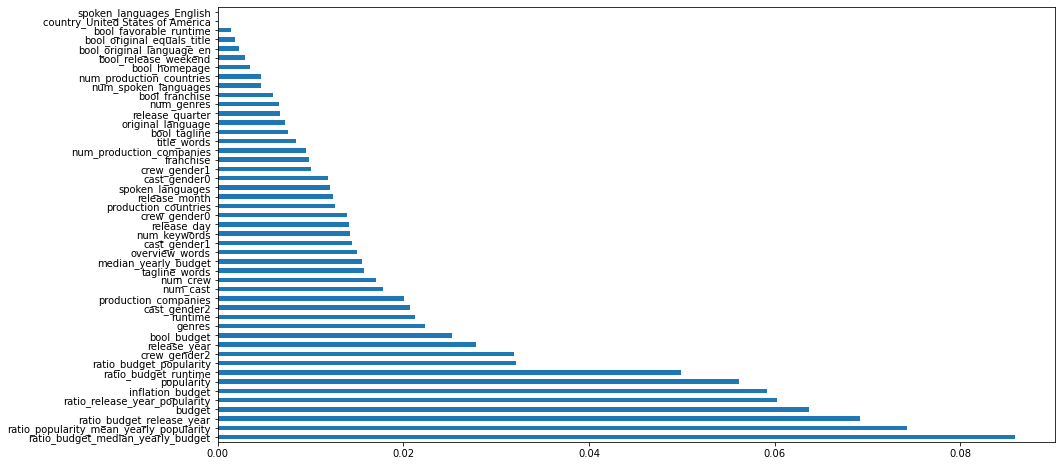

In [360]:
plt.figure(figsize=(15,8))
feat_importances = pd.Series(forestmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')

Let us predict our revenue scores, using the test dataset, and upload the score on Kaggle to receive our standing.

In [0]:
"""Predicting test dataset in order to submit on Kaggle and receive predictions """
TEST = test.drop(['id','imdb_id','poster_path',"budget_log"],axis=1) 

"""Creation of new panda dataframe"""
submission = pd.DataFrame()
submission['id'] = test['id']

"""Prediction"""
preds = forestmodel.predict(TEST)

"""Storing revenue and creating .csv file"""
submission["revenue"] = np.expm1(preds)
submission.to_csv("submission.csv",index=False)

# 5. Conclusion

Our score on Kaggle is quoted to be <code>2.05242</code>.

This is quite commendable as we did not utilize additional datasets and features externally (highlighted in limitations). Our score is around the top 42nd percentile.


Here comes the main reason we decided to incorporate random forest regressor. Among the public datasets on kaggle, there is no random forest model with a higher score than ours. Since there weren't satisfactory random forest models in public, we wanted to incorporate this model and make the best possible score.